<a href="https://colab.research.google.com/github/aidarsnotion/TheLittlePrince/blob/main/Habr_Lingtrain_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Делаем параллельную книгу "Кичинекей ханзада" Антуан де Сент-Экзюпери на кыргызском и английском

Сегодня мы сделаем параллельную книгу. Такие книги очень помогают лично мне и другим людям в изучении языков. Особенностью является то, что в этой книге текст выравнивается по предложениям, то есть вы сможете читать книгу и видеть соответствующее предложение на другом языке. Свои тексты вы можете задать в соответствующих полях. Более подробные комментарии вы можете найти в статье на Хабре.

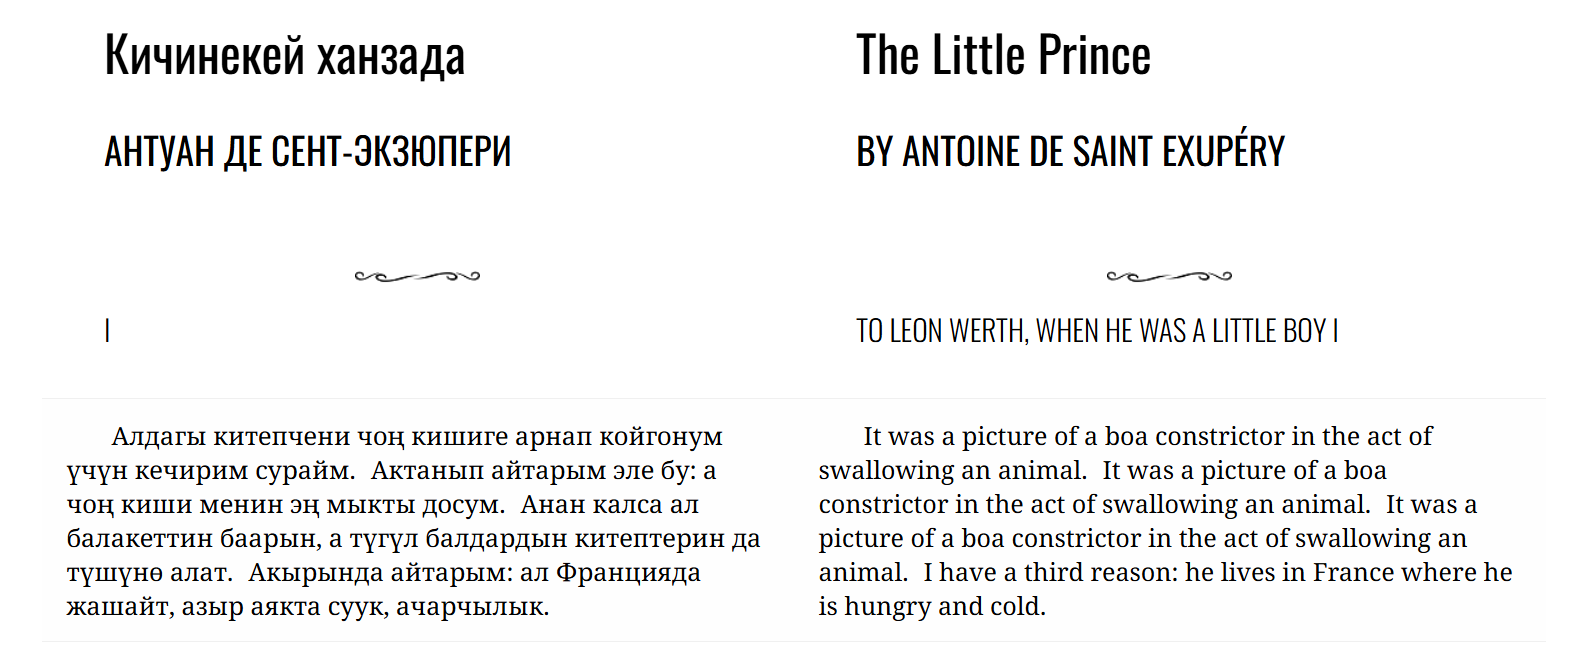

Помимо алгоритмической части выравнивание опирается на модели машинного обучения, которые реализованы по следующим статьям:

- [Making Monolingual Sentence Embeddings Multilingual using Knowledge Distillation](https://arxiv.org/abs/2004.09813)

- [Language-agnostic BERT Sentence Embedding](https://arxiv.org/abs/2007.01852)


# Ссылки на проект


- [Библиотека для выравнивания](https://github.com/averkij/lingtrain-aligner)

- [Редактор параллельных корпусов](https://github.com/averkij/lingtrain-aligner-editor)

- [Документация по редактору](https://aligner.readthedocs.io/ru/latest/)

## Подготовка

In [52]:
#@title Установим зависимости

!pip install -U lingtrain-aligner==0.4.3
!pip install razdel dateparser sentence_transformers

In [53]:
import os

from lingtrain_aligner import preprocessor, splitter, aligner, resolver, reader, helper, vis_helper

## Входные данные

Разверните ячейку, чтобы разместить свой текст.

In [54]:
#@title Первый текст

text1 = """Антуан де Сент-Экзюпери%%%%%author.
Кичинекей ханзада%%%%%title.

ЛЕОН ВЕРТКЕ%%%%%title.

Алдагы китепчени чоң кишиге арнап койгонум үчүн кечирим сурайм. Актанып айтарым эле бу: а чоң киши менин эң мыкты досум. Анан калса ал балакеттин баарын, а түгүл балдардын китептерин да түшүнө алат. Акырында айтарым: ал Францияда жашайт, азыр аякта суук, ачарчылык.
Демек, менин досум көңүл жубаткан жылуу сөзгө өтө муктаж. Эгер ушул айткандар да актай албаса, анда китепчени досум деген чоң кишинин бала чагына арнайм. Чоң кишилер баары адегенде бала болгон го, бирок аны эстеп жүргөндөр аябай аз эмеспи. Ошентип, мен арноомду кайра түзөтүп жазам:
БИР КЕЗДЕ БАЛА БОЛГОН ЛЕОН ВЕРТКЕ.%%%%%title.

I%%%%%h2.
Алты жашымда адам аралай элек чер токойлор жөнүндө сөз кылган «Болмуш окуялар» аттуу китептен бир сапар укмуш сурөт көрдүм. Сүрөттө удав деген килейген жылан бир жырткыч айбанды оп тартып жатыптыр. Мынакей ал сүрөт:

Китепте мындай деп жазылыптыр: «Удав өз олжосун чайнабай бүкүлү жутат. Анан тырп эте албай калат да, ошо бойдон алты ай бою уктап жата берет, жутканын аш кылмайынча ойгонбойт».
Шумдук-шумдук окуяларга бай жунглинин турмушу тууралуу көп-көп ой жүгүртүп, акыры түр калем менен биринчи мертебе сүрөт тарттым. Бу менин № 1-сүрөтүм эле. Мына, ал сүрөт:

Тарткан сүрөтүмдү чоң кишилерге көрсөтүп:
— Коркуп атасыңарбы? — деп сурадым.
— Шляпадан да коркчу беле? — дешти алар. А сүрөт дегеле шляпа эмес болчу. Ал пилди жутуп алган удав эле. Ошондо мен чоң кишилер аңдап алсын деп удавдын ичиндеги пилди айкын көрсөтүп тарттым. Билесиңер, аларга бардык нерсени түшүндүрүп бермейин болбойт. Мына, менин № 2-сүрөтүм:

Чөң кишилер мага жыланды ичинен тартканыңды да кой, тышынан тартканыңды да кой, андан көрө географияга, тарыхка, арифметикага, таза жазууга көбүрөөк көңүл бур деп кеңеш беришти. Жакшы художник болуудан алты жашымда ушинтип айныбадымбы.
№ 1-жана № 2-сүрөттөрүм эчтекеге арзыбай калган соң өзүмө өзүм дурус ишенбей калдым. Чоң кишилер өздөрү эчтемени аңдап түшүнө алышпайт, ал эми аларга көрүнгөндүн баарын улам-улам эзип түшүндүрүп отуруу балдарды аябай жадатып жиберет.
Ошентип, мага башка кесипти тандап алууга туура келип, учкучтукту үйрөнүп чыктым. Уча берип жер шарын бүт кыдырып койдум окшойт. Ырасын айтсам, географияны окуганым жакшы болгон экен.
Мен Аризонадан Кытайды бир караганда эле айрып таанычу элем. Түндөсү жолдон адашып кетсең мунун аябай кереги тиет.
Өмүрүмдө ар кыл олуттуу адамдарды арбын жолуктурдум. Көп убагымды ошолордун арасында өткөрдүм. Алар менен коюн-колтук да жүрүп көрдүм. Ошондо деле алар жөнүндөгү ой-пикирим оңолуп кеткен жок.
Башкалардан акылдуу жана парасаттуу көрүнгөн кандайдыр бир чоң кишиге туш келгенде, ага баягы №1-сүрөтүмдү көрсөтөр элем. А сүрөттү айрып-тыткан эмесмин, дайыма жаныма ала жүрчүмүн. Таанышкан адамым чын эле бирдеме түшүнөбү, — ошону билейин дечүмүн.
Бирок алардын баары: «Шляпа турбайбы,» — дей салышчу.
Ошондон кийин алар менен удавдар, жунглилер, жылдыздар жөнүндө сүйлөшчү эмесмин. Алар менен бриж жана гольф оюну, саясат менен галстуктар жөнүндө сүйлөшчү элем. Ошонума чоң кишилер да ыраазы болушуп, турмушту туура түшүнгөн адам менен тааныштык деп компоюп калышар эле.
II%%%%%h2.
Эзилишип сыр айтышар жан табылбай, ошентип эндекей жашап жүрдүм. Анан мындан алты жыл мурда айла жоктон Сахарага конууга мажбур болдум.
Самолетумдун моторунун бир тетиги сынып калды. Жанымда механик да, жүргүнчүлөр да жок эле, ошон үчүн канчалык кыйын болсо да, баарын өзүм оңдоп көрөйүн деп бел байладым.
Же моторду оңдошум керек эле, же өлүшүм керек эле. Бар болгону бир жумага араң жете турган суум калган.
Ошентпп, биринчи түнү адам турагынан миңдеген миль алыстагы чөлдүн кумуна жатып уктадым. Кемеси кыйрап, анан океандын чексиз кыйырында такта сал минип калган адам да менчелик жалгызсырабайт.
Таң эртеңде мени бүрөөнүн чыйылдаган үнү ойготту. Менин аң-таң калганымды айта көрбөгүлө. Дабыш:
— Мага… козунун сүрөтүн тартып берчи! — деди.
— Ыя?
— Мага… козу тартып берчи…
Так төбөмөн күтүүсүз күн күркүрөп ийгендей ыргып турдум. Көзүмдү ушалап жибердим. Жан-жагыма карандым. Ошондо мени дегеле олуттуу тиктеп турган кызыктай бир кипкичине адамды көрдүм.
Мен кийинчерээк тарткан анын эң дурус сүрөтү мынакей.

Менин сүрөтүмдө ал, чынын айтсам, куду өзүндөй жакшына болбой калды. Ошентип калышына мен күнөөлүү эмесмин. Чоң кишилер мага алты жашымда сенден художник чыкпайт деп кесе айтып коюшпады беле, ошонун айынан удавды ичи менен тышынан тарткандан башка эчтеме билбей калгамыи.
Ошентип, мен бу үч уктаса түшкө кирбеген кубулушка аңкайып карап турдум. Эсиңерде болсун, мен адам жашаган жерден миңдеген миль алыс элем. Бирок ал балада адашып, же эси чыгып, аябай арып-чарчагандай, же ачка калып, каны катып алсырап араң тургандай кыяпат түк жок.
Анын түрүнө карап, бу как эткен каргасы жок чөлдө жүргөн бала там-ташынан алыс калган дешке болбойт. Бир оокумда мага тил кирди:
— Бирок… сен мында эмне кылып жүрөсүң?
Ал дагы да акырын, бирок олуттуу өтүндү:
— Мага… козу тартып берчи..
Мунун баары ушунчалык табышмактуу жана акыл жеткис эле, ошол себептен терс жооп беришке чамам келбеди. Бу эрме чөлдө, өлүмдөн бир эле карыш алыс турганда, канчалык өөн учураганына карабастан чөнтөгүмдөн бир барак кагаз менен түгөнбөс калем учумду алып чыктым.
Бирок ошо замат кичинемде географияны, тарыхты, арифметиканы, таза жазууну көбүрөөк үйрөнгөнүм эсиме кылт дей түштү. Мен балага:— Сүрөт тарта албайм! — деп айттым. Кыязы, бир аз ороңдобураак айтып койдум окшойт.Ал көшөрүп туруп алды:
— Баары бир. Козу тартып бер.
Өмүрүмдө койдун сүрөтүн тарткан эмесмин, кутулайын деп баягы өзүм билген эки сүрөттүн бирин — пил жуткан удавды — тарта салдым.
— Жок, жок! Мага удав жуткан пил керек эмес! — деп кыйкырып ийди бала. — Удав өтө опурталдуу, пил опсуз чоң. Менин үйүмдө баары кипкичине. Мага козу керек.
Козу тартып бер.

Мен таң калганыман алдастай түшүп, сураганын чампалай салдым. Ал, тарткан сүрөткө ынтаа менен карап туруп:
— Жок, бу козунун араң эле жаны бар экен. Башкасын тартып бер, — деди.
Дагы тартып бердим.

Жаңы тааныш досум менин түшүнбөй жатканыма ырайымы келди белем, болорболбос жымыйып койду.
— Карабайсыңбы, — деди ал, — бу козу эмес да. Бу кочкор турбайбы. Мүйүзүн көрбөйсүңбү…
Мен дагы башкача тарттым.

Бу сапар да сүрөтүм анын купулуна толгон жок.
— Бул өтө эле картаң экен. Мага көпкө өлбөй турган козу керек.
Мен чыдабай кеттим. Тезинен моторду текшеришим керек эле. Кутулайын деп мына муну чиймелей салдым:

— Мына ящик, — дедим балага, — мунун ичинде сен каалагандай козу бар.
Көңүлүнө эчтеме толбогон сынчым жадырай түшүп:
— Жакшы болбодубу! Кандай дейсиң, бу козу чөптү көп жейби? — деди. Мен аң-таң калдым.
— Эмне экен?
— Менин үйүмдө баары кичине да…
— Ага жетет. Мен сага кичинекей козу берип жатам.
— Жок, анча деле кичине эмес… — деди ал, сүрөттү үңүлө карап жатып. — Карасаң эй! Уктап калды…
Кичинекей ханзада менен мен ушинтип тааныштым.
III%%%%%h2.

Анын кайдан келгенин көпкө биле албай жүрдүм. Кичинекей ханзада мага үстөккө-бөстөк суроо бере берет; а мен андан бирдеме сурасам, укмаксан болуп коёт.
Капыс оозунан чыккан, байкабай айтып ийген сөздөрүнөн улам аз-аздан мага баары дайын боло баштады. Мисалы, ал менин самолетумду (самолетту тартпай эле коёюн, баары бир колуман келбейт) адеп көртөндө:
— Бу эмне деген шумдук? — деп сурады.
— Бу «шумдук» эмес, самолёт. Менин самолётум. Асманда учат.
Анан ага уча аларымды мактаныч менен түшүндүрө баштадым. Ошондо ал кубана кыйкырып ийди:
— Кантип? Асмандан түштүңбү?
— Ооба, — дедим мен жай гана.
— Мына тамаша!..
Кичинекей ханзада кыткылыктап күлүп жиберди. Мен ага тырчый түштүм: иши кыйчалыштап турганда ыгы жок күлкүнү ким жакшы көрсүн. Анан ал:
— Демек, сен да асмандан келипсиң да, — деп койду. — Кайсы планетадан, ия?
«Бу чөлгө кайдан келгениң табышмак болуп жатты эле, көрсө, анын жандырмагы ушундай экен го!» деп ойлодум да, тап жылдырбай сурап жибердим:
— Аа, сен биерге башка планетадан келдим дечи?
Ал жооп кайтарбады. Менин самолётумду тиктеп туруп, акырын баш чайкады:
— Жок, сен муну менен алыстан келе албайт элең…
Ал көпкө мелтиреп ойлонуп калды. Анан чөнтөгүнөн мен берген козуну алып чыгып, ошол баа жеткис дасмиясын сонуркай баштады.
«Башка планеталар» жөнүндө бүдөмүктөтүп айткан сөздөрдөн ынтызарлыгым ашына түштү. Баланын сырын көбүрөөк тартып көрөйүн деп чегип сурадым:
— Бала, сен кайдан учуп келдиң? Үйүң кайда? Менин козумду кайда алып кеткени турасың, ия?
Ал ойго чөгүп унчукпай туруп, анан минтти:
— Ящикти мага ырас берипсиң, козуну түндөсү ичине камап коём.
— Ошент. Жакшы бала болуп турсаң, сага жип да тартып берем, күндүз аны аркандап коёсуң. Казык да берем.
Кичинекей ханзада кабак бүркөдү:
— Байлап эмне кереги бар?
— Байлап койбосоң, дайынсыз алыс-алыс кетип, жоголбойбу.
Тиги досум дагы кыткылыктап күлүп ийди:
— Кайда бармак эле?
— Кайда бармак эле! Башы ооган жакка бара берет да каңгып…

— Жоголот деп коркпойм, үйүмдө жер аябай аз эмеспи. —
Кичинекей ханзада бу сапар тамашасыз чын сөзүн айтып, кайра муңайыңкы мындай деди.
— Башың ооган жакка түз бараберсең, баары бир алыс кете албайсың…
IV%%%%%h2.
Дагы бир жаңылыкты мен ушинтип ачтым: көрсө, анын планетасы үйдөй эле бар экен!
Бу мени анча деле таң калтырган жок. Жер, Юпитер, Марс, Венера сыяктуу чоң планеталардан башка жүздөгөн планеталар бар экен, алардын эң кичинелери телескоптун көзунө да араң-зорго урунарын мен жакшы билчүмүн.
Ошондой бир кичинекей планета ачып калса, астроном ага ат эмес, жөн гана номер коёт. Маселен, «Астероид № 3251» — деп.
Мен Кичинекей ханзада «Астероид B-612» деген бөтөкөй планетадан учуп келди деп болжойм. Анткенимин жүйөөсү бар.

Ал астероидди 1909-жылы бир түрк астроном телескоптон бир эле жолу көрүп калган экен.

Астроном өзү ачкан жаңылык тууралуу Эл аралык астрономиялык конгрессте баян этет. Бирок ага эч ким ишенбейт, анткени астроном түркчө кийинип алган болот. Чоң кишилер дегениң ушундай го, чиркин!

В-612 астероидинин ыкыбалы тоодой экен, түрк султаны өзү сурап турган элге европача кийим кийгиле, кийбесеңер өлүмгө кириптер болосуңар деп буйрук кылат.
1920-жылы баягы эле астроном өзү ачкан жаңылык жөнүндө кайрадан билдирүү жасайт. Бу сапар уккандардын баары анын айтканын макул көрөт, анткени ал эң соңку модада жасанып алган эле.

Мен чоң кишилердин айынан гана В-612 астероидин ушунча көп сөз кылып, а тургай номерин да айтып ийдим.
Чоң кишилер цифра десе жантыгынан жата калат. Жаңы бир дос тапканыңды сүйүнчүлөсөң, алар эч качан алгылыктуу суроо бербейт. Алар эч качан: «Анын үнү кандай экен? Кандай оюнга ышкыбоз экен? Көпөлөк кармайт бекен? — деп сурабайт.
Алар: «Жашы канчада экен? Агаиниси канча экен? Салмагы канча экен? Атасы канча акча табат экен?» — деп сүрүштүрөт. Суроолоруна жооп алган соң алар адамды билип алдык деп компоюп калат.
Чоң кишилерге: «Мен кызыл кыштан салган кооз там көрдүм, терезесинде герань гүлү өсүп, чатырында кептерлер учуп жүрөт» — десең, алар өшол үйдү түк көз алдына келтире алышпайт. Аларга: «Жүз миң франктык там көрдүм» — деп айтышың керек, ошондо алар. «О, сонун экен!» — деп тамшанышат.
Анын сыңары аларга: «Кичинекей ханзада чын эле болгонуна далилдер мына: ал ашкан бир азамат бала эле, кыткылыктап күлчү эле, бир козум болсо дечү эле. Ал эми козум болсо деп тилеген жан кантип бу дүйнөдө жашап өтпөсүн» — десең алар ийнин куушуруп тим болот да, сага кирди-чыкты акылы бар балага карагандай карайт.
Эгер: «Ал астероид В-612 деген планетадан келиптир» — десең, алар дароо ишенет да, башка суроо бербейт. Чоң кишилер дегениң ушундай. Аларга таарынгандан эч пайда жок. Балдар жөн гана чоң кишилердин ошол кемчилигин көрсө да көрмөксөн, билсе да билмексен болуп коюшу керек.
Бирок турмуш деген эмне акенин жакшы билген биз, албетте, номерлер менен цифраларды шылдыңдап күлөбүз! Оюма койсо, бу повестти мен сыйкырдуу жомок сыңары баштайт элем. Мындай деп баштар элем:
«Бар экен, жок экен, бир Кичинекей ханзада болгон экен. Ал өзүнөн бир аз эле чоңураак планетада жашачу экен, анан ага бир жакшы дос табылбай жүрчү экен…» Турмуштун эмнелигин түшүнгөндөр бу айтканым бүтүндөй чын экенине дароо эле ишенишер эле.
Эл бу китебимди эрмек үчүн гана окусун деп тилебейм. Кичинекей досумду эстесем, жүрөгүм зырп дей түшөт, ошол себептен аны сөз кылганда мен кыйналыш тартам. Ал козусу экөө мени таштап кеткенден бери мына алты жыл өттү. А жөнүндө айтып берейин деп далбас урганым — аны унутпайын дегеним.
Досторду унуткандан кейиштүү эмне бар деги. Ар кимдин эле досу боло бербейт. Мен да цифрадан бөлөк эчтемеге кызыкпаган чоң кишилерге окшоп каламбы деп жүрөкзаада болом.
Бир ящик боёк менен түр карандаштар сатып алганымдын дагы бир себеби мына ушунда. Өмүрүңдө өмүрүң болгондо да алты жашыңда удавды гана ичинен-тышынан тартып көрүп, анан менин курагыма келгенде кайра сүрөт тарта башташ, калп айткан менен болобу, кыйын эле нерсе экен!
Ырас, мен дурус эле окшоштурушка тырышып көрөм. Бирок тартканым ойдогудай чыгарына шегим бар. Бир портрет дурус эле окшош болсо, бирөө таптакыр караандабайт.
Бир сүрөтүмдө ханзаданын бою ашкере чоң көрүнсө, экинчисинде — кичинекей. Кийиминин өңү-түсү да жадыман чыгып кетиптир. Мен аны жоромолдоп, эптеп-септеп, мындай да, андай да тартып көрөм.
Акыры, мен кээ бир урунттуу жерлерди жаңылыш тартып коюшум мүмкүн. Ал үчүн силер мени айыптабассыңар. Досум мага эч нерсе түшүндүрчү эмес. Сыягы, ал мени куду өзүндөй деп ойлосо керек. Тилекке каршы, мен ящиктин ичинде жаткан козуну тышынан көрө албайм. Кыязы, мен чоң кишилерге бир аз окшош болсом керек. Балким, картайып бараткандырмын.
V%%%%%h2.
Күн сайын мен анын планетасы жөнүндө, ал өзү планетасын кантип таштап, кантип саякаттап кеткени жөнүндө кандайдыр бир жаңылык билип турдум. Сөз ыңгайы келе калганда гана кичине бир жаңылыкты байкабай айтып ийчү. Мисалы, мен үчүнчү күнү гана баобабдардын кесепетинен келген кырсыкты билдим.
Буга да козу себеп болду. Капыстан Кичинекей ханзаданын көңүлүн оор шектенүү өйүй баштады белем, сурап калды:
— Айтчы, козулар бадалдарды чын эле жейби?
— Чын эле жейт.
— Жакшы экен!
Козулардын бадал жеген-жебегени ага эмне себептен мынча зарыл болгонун түшүнө бербедим. Аңгыча Кичинекей ханзада дагы сурады:
— Демек, алар баобабдарды да жейт турбайбы?
Жок, баобаб бадал эмес да, — деп мен ага каршы чыктым. Баобаб деген мунардай бийик опсуз чоң дарак болот, сен бир үйүр пилди айдап келсең да, баары биригип бир баобабды жеп түгөтө албайт.
Пилдерди айтканыма Кичинекей ханзада күлүп жиберди:
— Бир пилдин жонуна экинчисин тургузуп койбосоң, алар батмак эмес…

Анан ал каадалуу түр менен:
— Баобабдар адегенде, чоңойгуча, кипкичинекей эле болот, — деди.
— Ал чын дечи. Бирок сенин козуң кичинекей, баобабдарды кайдан жейт эле?
Сөз жөпжөнөкөй, айдан ачык чындыктар жөнүндө жүрүп жаткансып:
— Жебегендечи! — деп койду Кичинекей ханзада. Буга мен башымды аябай катырып, иштин жайы эмне экенин араң дегенде аңдан билдим.
Планеталардын баарында өскөн пайдалуу чөптөр Кичинекей ханзаданын планетасында да өсө турган. Андай болгон соң аерде жакшы, пайдалуу чөптөрдүн жакшы үрөндөрү, жаман отоо чөптөрдүн жаман үрөндөрү болору шексиз да.
Бирок үрөндөр көзгө көрүнбөйт эмеспи. Ичинен бирөө ойгоном деп умтулмайынча, алар терең топурактын астында уктап жата берет. Анан баягы ойгоном деп тырбалаңдаган үрөн өнүп чыгат; боюн түзөп, мойнун күнгө созот; дегеле татына, дегеле айыпсыз көрүнөт.
Эгер бу шалгам же розанын көчөтү болсо, мейли, беймарал өсө берсин. Эгер ал кандайдыр бир жаман чоп болсо, айрып тааныр замат тамыр-самыры менен жулуп ташташ керек.
Кичинекей ханзаданын планетасында аябай опурталдуу, өтө кыянаттуу үрөндөр… баобабдардын үрөндөрү бар эле. Планетанын топурагын бүтүндөй ошөл үрөндөр булгап таштаган эле.
Эгер баобабды чыгар замат айрып тааныбасаң, кийин шоруңдун катканы. Ал бут планетаны ээлеп алат. Тамырларын тереңге-тереңге сойлотот. Планета кичине болот, баобабдар көп болсо, алар аны барча-барча жарып иет.
— Бир катуу эреже бар, — деди мага Кичинекей ханзада кийинчерээк. — Эртең менен туруп, жуунуп, өзүңдү тартипке келтирер замат планетаңды да тартипке келтир. Баобаб менен роза өнүп чыкканда коёндон окшош болот. Алар бир аздан соң айырмалана баштайт, ошондо күн сайын баобабдарды сөзсүз отоп турушуң керек. Бу аябай кыбыр жумуш, жадатып иет, бирок анча деле оор эмес.


— Бу эрежени силердин балдар да жакшы түшүнүп алсын, сен мындай бир сүрөт тартып көр, — деди ал бир күнү мага. — Эгер алар бир кезде саякатка чыгып калышса мунун пайдасы тиет. Башка иш күтүп турса да зыяны жок. Бирок баобабдарды эркинче коё берсең, балээге калганың ошол. Мен жалкоо бирөө жашаган планетаны билчү элем. Ал үч көчөттү убагында жулбай койгон экен…
Кичинекей ханзада мага эчтемесин калтырбай баяндап берди, мен ал планетанын сүрөтүн тарттым. Мен адамдарга акыл-насаат айтканды жаман көрөм. Бирок баобабдардын кандай кырсык апкелерин билгендер аз, ал эми кимде ким астероидге барып, калса, аны көп коркунучтар курчап алары бештен белгилүү. Ошон үчүн бу сапар демейдеги адатыман айныгым келип жатат.
«Балдар! — дейм мен, — баобабдардан этият болгула!» Менин досторумду көптөн бери коркунуч күтүп турат, аны мен мурда сезбеген сыңары алар да сезишпей жүрөт. Мен муну досторумдун эсине алдын-ала салгым келет. Мына ошон үчүн бу сүрөттү тирмийип отуруп тарттым, кеткен мээнетиме кенедей ичим оорунбайт.

Балким, силер сурарсыңар: эмне үчүн бу китепте баобабдарды тарткан сүрөттөй барандуу сүрөттөр жок? Жообу өтө эле жөнөкөй: мен тырышсам да, алгылыктуу чыкпай койду. Ал эми баобабдарды тартып жатканда, тартып жатканым укмуштай маанилүү, эртеңкиге түртө салбай турган жумуш деген ой мага шык берди, күч берди.
VI%%%%%h2.
О, Кичинекей ханзада! Сенин өмүрүң кандай кейиштүү, кандай бирөңчөй өткөнүн бара-бара билдим. Көпкө чейин сенин көргөн-баккан тамашаң күндүн кызарып батканы болгон экен. Мен аныңы төртүнчү күнү эртең менен:
— Мен күндүн батып баратканын жакшы көрөм. Жүр, күн батканын карайбыз, — дегениңден аңдап калдым.
— Бир аз күтө туралы.
— Эмнени күтөбүз?
— Күндүн батканын.
Адегенде сен бир кур таң калып, анан өзүңө өзүң күлүп жибердин:
— Мен дайым эле үйдө жүргөнсүйм.
Айтса-айтпаса. Америкада чак түш турганда, Францияда күн батарын элдин баары билет. Эгер көз ирмемде Францияга учуп жетишке мүмкүн болсо, күн батканын көрүп, жыргар эле.
Бактыга каршы, Франция бизден алыс, аябай алыс. А сенин бөтөкөй планетаңда отургучту бир нече кадам жылдырсаң эле жете турган. Анан сен каалаган учурда батар күндүн асманын улам-улам көрө берчүсүң…
— Бир сапар бир эле күндүн батканын кырк үч ирет көргөмүн!
Бир аздан кийин сен:
— Билесиңби… капа болуп турганда, күндүн батканын карап турсаң жакшы да… — дедиң.
— Демек, күн батканын кырк үч жолу көргөн күнү аябай капаланып турдуң беле?
Бирок Кичинекей ханзада жооп кайтарбады.

VII%%%%%h2.
Бешинчи күнү Кичинекей ханзаданын ыймандай сырын билдим. Билишиме дагы да козу себеп болду. Ичинен көпкөп ойлонуп отуруп, бу бүтүмгө келген белем:
— Козу бадалдын көчөтүн жесе, гүл да жейт го? — деп капыстан сурап калды ал.
— Оозуна эмне урунса, жей берет.
— Тикенеги бар гүлдү делеби?
— Ии, тикенектүү гүлдү да жей берет.
— Анда тикенектин эмне кереги бар?
Муну мен билген эмесмин. Анын үстүнө бош эмес элем: мотордун бир болту жээлип кетип, ошону чыгара албай жаткамын. Абалым аябай оордошуп, суум азайып, д айлам түгөнүп турган. Бу аргасыз конуп калганым жаманчылык менен бүтпөсө экен деп корко баштагам.
— Тикенектин кандай кереги бар?
Бир суроо берип алса, Кичинекей ханзада жооп алмайынча такый берчү. Жөн гө көнбөгөн болт кыжырга тийип жатты эле, мен:
— Тикенектин эч кандай кереги жок, гүлдөр тикенекти ачуусуна чыдабай чыгарат, — деп оозума келгенди оттоп салдым.
— Мына кызык!
Бир саам жымжырт боло түштү. Анан ал бир аз кыжырланып:
— Ишенбейм сага! — деди. — Гүлдөр назик. Аларда куулук шумдук болбойт. Анан алар айбаттуу көрүнсөк деп тырышат. Тикенегибиз болсо эле баары коркот деп ойлошот…
Мен унчукканым жок. Ошол саамда: «Эгер бу болт азыр да чыкпай койсо, балка менен тарс бир уруп, сындырып салам» — деп жаткан элем ичимен. Кичинекей ханзада оюму бузду:
— Сен ойлойсуң го, гүлдөр…
— Койчу, айланайын! Эчтеме деп ойлогон жерим жок! Мен сага ойлонбой эле оозума келген сөздү айтып койдум. Көрүп турбайсыңбы мен олуттуу иш кылып жатканымды.
Ал мага таңыркап карап калды.
— Олуттуу иш дейсиңби?
Үстү-башымды карала-торала кылып, балканы колума алып, ага түрү суук, мага түшүнүксүз бир буюмга үңүлүп жаткан элем. Ал мага чекчейип тигиле карап турду да:
— Сен чоң кишилердей сүйлөйт экенсиң! — деди.
Бетим чымырай түштү. Бала ого бетер бетимди чымыратты:
— Сен баарын чаташтырып атасың… эчтеме түшүнбөй турбайсыңбы!
Анын ачуусу чындап келген экен. Башын чулгуп алды эле шамал алтын чачтарын үрпөйтө жулмалап жатты.
— Мен бир планетаны көргөм, анда бети чыйкандай кызыл бир төрө жашайт. Ал өмүр бою бир жолу гүл жыттап көрбөптүр. Бир жолу да жылдызга карабаптыр. Эч кимди сүйбөптүр. Эчтеме кылбаптыр. Анын асылганы эле: цифраларды кошуу. Керээли кечке сага окшоп: «Мен олуттуу кишимин! Мен олуттуу кишимин!» деп какшана берет. Текеберликтен жарылып кетчүдөй болуп турат. А чынында ал адам эмес. Ал айгыр тепек.
— Эмне?
— Айгыр тепек!
Кичинекей ханзада жаалы чыккандан кумсарып кетти.
— Миллион жылдан бери гүлдөргө тикенек чыгат. Ага карабай миллион жылдан бери козулар гүлдөрдү жеп келет. Тикенектен кенедей пайда болбосо, гүлдөр неге бар күчүн тикенекке чыгарат? Эмне, ушуну түшүнүү олуттуу иш эмеспи, ия? Козулар менен гүлдөр өз ара согушуп жүргөнү сага тамашабы? Бул, эмне, бети чыйкандай кызыл, семиз төрөнүн арифметикасына арзыбаган кайдыгер нерсеби?
Эгер мен дүйнөдөгү жападан жалгыз бир гүлдү билсем, а гүл менин планетамда өссө, андай гүл башка жакта такыр жок болсо, анан бир күнү кичинекей козу байкабай а гүлдү жалмап таштаса, жалмап таштап кандай иш кылганып да билбесе… сага эмне, ушунун бары оюндай көрүнөбү?

Ал кызарып-татарып кетти. Анан кайра сөзгө кпрдн:
— Миллион жылдыздын бирөөндө да өспөгөн жалгыз гүлдү сүйсөң арманың болбос; асманды карайсың да, өзүңдү бактылуу сезесиң. Анан өзүңө: «Ошо жакта менин гүлүм бар…» — дейсиң. Эгер козу аны жалмап койсо, жылдыздардын баары жапырт өчкөндөй болбос беле! Эмне, ушуга сен кайдыгер карайсыңбы?!
Ал туталанып сүйлөй албай калды. Капыстан буркурап ыйлап жиберди. Каш карайды. Мен ишимди таштадым. Кесирдүү болт менен балка, чаңкоо менен өлүм мага сокур тыйынча көрүнбөй калды. Бир жылдызда, бир планетада — Жер деген аты бар менин планетамда Кичинекей ханзада ыйлап жатты, эми аны сооротуш керек эле. Мен аны колума алып, алдейлей баштадым. Мен ага мындай дедим:
«Сен жакшы көргөн гүлгө эч кандай коркунуч туубайт… Козуңа ширге тартып берем — тумшугуна кептеп коёсуң… Гүлүңө темир калпакча тартып берем… Мен… Мен…»
Эмне деп кобурап жатканымды билген жокмун. Өзүмдү аябай ыңгайсыз, аябай эби жок сездим. Ал эмне деп чакырсам угарын, аны менден качып бараткан жанын канип кууп жетеримди биле албай турдум… Көз жаштын өлкөсү — ал табышмактуу, купуя сырдуу өлкө го, чиркин!
VIII%%%%%h2.
Көп өтпөй а гүлдүн жайын жакшы билип алдым. Кичинекей ханзаданын планетасында дайыма жөнөкөй, көзгө комсоо гүлдөр өсчү — алардын гүл желекчелери аз эле, алар биртике жер ээлеп, эч кимге жолтоо болчу эмес. Алар таңзаарда гүл ачып, кечке жуук солуп кала турган.
Бу гүл болсо, бир күнү белгисиз жактан шамал айдап келген үрөндөн өнүп чыкты. Кичинекей ханзада башка көчөттөргө жана чөп-чарларга окшошпогон бу көчөттөн көз айырбай жүрдү. Кокус баобабдын кандайдыр бир жаңы түрү болуп жүрбөсүн?
Бирок көчөт өскөнүн токтотту да, чанак байлады. Кичинекей ханзада мындай чоң чанакты эч качан көргөн эмес, ошон үчүн чанак ачылса бир укмуш көрөм деп ичинен кымылдады. Ал эми өзүнүн жашыл бөлмөсүндө жашынып жаткан купуя мейман болсо маалкатып сулуулана берди.
Ал боёктордун гүлгүнүн тандады. Ар бир желекчесин улам-улам тагып көрүп, камырабай жасанып жатты. Ал кайдагы бир кызгалдак баштанып бул дүйнөгө үрпөйүп көрүнгүсү келген жок. Ал бүт көркүм менен бир жарк этип жадырайын деди. А чиркиниң ченде жок ойсоке эле!
Табышмактуу камылгасы күндөн күнгө созула берди. Анан бир күнү, күндүн мурду эми чачыраганда, гүл желекчелери ачылып калды.

Ушу минута деп камынып, ушунча мээнет кылган сулуу эстене берип:
— Ах, араң эле ойгондум… Кечиресиз… Мен саксайып турам, тарана элекмин… — деди.
Кичинекей ханзада жетине албай, кубанып турганын жашыра алган жок:
— Сиз укмуш татынакайсыз!
— Коюңузчу? — деди назик үн, — байкадыңызбы, мен күн менен кошо төрөлдүм.
Албетте, Кичинекей ханзада ажайып меймандын аздыр-көптүр көтөрүлүп коймою бар экенин баамдап калды, бирок ал жүрөк аптыккандай татынакай эле!
Бир аздан соң гүл:— Эртемененки тамактын маалы болуп калды окшойт, — деп койду, — кичипейилдик үчүн… мага кам көрүп коёсузбу…
Кичинекей ханзада аябай уялып кетип, суу сепкичти таап, гүлгө булактын кашка суусун септи.

Көп өтпөй сулуунун кербез жана ызакор экени билинди. Кичинекей ханзада анын айынан далай абыгерчилик тартты. Гүлдүн төрт тикенеги бар эле, бир күнү ал ханзадага мындай деди:
— Жолборс келсе келе берсин, мен анын тырмагынан коркпойм!

— Менин планетамда жолборс жок, деди Кичинекей ханзада. — Анын үстүнө жолборс чөп жебейт да.
Гүл ызалана түштү:— Мен гүл эмесмин!
— Кечиресиз…
— Чын, мен жолборс дегенден коркпойм, бирок шамалдан жаман корком. Сизде шамал тосчу парда жок бекен?

«Өзү өсүмдүк, анан жел тиет деп коркот… кызык, капырай… — деп ой жүгүрттү Кичинекей ханзада. — Бу гүлдүн кыялы кырс экен!»
— Кеч киргенде, мени айнек калпакча менен жаап коюңуз. Аябай суук экен. Бу жер жашоого ыңгайсыз планета көрүнөт. Тиги мен келген жакта…

Ал сөзүн бүтүргөн жок. Бу жерге ал кичинекей дан кезниде келип түшкөн. Анан ал башка дүйнөлөрдүн кабарын кайдан билмек эле. Калпыңы оңой карматып коёр болсоң калп айтып не керек! Сулуу уяла түштү да, ханзада менин алдымда айыпкер экенин сезсин дегенчелик кылып бирэки жөтөлүп койду.
— Парданыз кана?
— Мен апкелейин деп турдум эле, бирок сиздин сөздү угуп бүтпөй кете алганым жок!
Ошондо гүл ханзаданын бетин аябай бир чымыратайын дегенчелик кылып ого бетер күчөнө жөтөлдү.
Кичинекей ханзада татынакай гүлдү жакшы көрүп калса да, ага кызмат кылышка азыр болсо да, көп өтпөй жүрөгүнө шек саноо төрөлдү. Беймаани сөздөргө итиркейи келип, өзүн бактысыз сезе баштады.
— Анын айтканына бекер кулак салыпмын, — деди ал бир күнү мага сырдаштык менен, — Гүлдөрдүн сөзүн элебей эле коюш керек. Аларга жөн гана сонуркап карап, жыпар жытын искеш керек. Менин гүлүм планетамды аңкытып турганда, мен ага кубана албапмын. Жолборстор, тырмактар жөнүндөгү сөздөр ай-я… А сөздөргө мен элжирешим керек экен, а мен ачууланыпмын…
Дагы мындай сырын айтты:
— Мен анда эчтемени түшүнбөпмүн! Сөзүнө эмес, ишине карап бааласам болмок экен. Ал мага жыпар жытын берип, омүрүмө жарык шоола төккөн тура. Бекер качыпмын! Ошо арсыз кытмырлык менен айлакерликтин артында назик мээрим жатканын туюшум керек экен. Гүлдөрдүн айтканы башка, кылганы башка болорун кайдан билдим! Анда мен өтө жаш экемин, сүйө билчү эмес экемин.
IX%%%%%h2.

Баамымда ал келгин куштар менен кошо саякаттамак болот. Кетер күнү таң заардан турду да, планетасын күндөгүдөн жакшыраак жыйыштырды. Ал өчпөй жанып турган вулкандарын жадабай жакшы тазалады. Жанып турган эки вулканы бар эле. Таң эртеден тамак койсоң, дароо ысытчу.
Анан тиги экөөнөн башка да бир өчкөн вулканы бар эле. Бирок кырсыкты кайдан деп болбойт! Ошон үчүн ал өчкөн вулканды да тазалап чыкты. Вулкандарды шашпай тазалап жатканда, алар оргуштап ысык жалын чачпай, бир калыпта текши күйөт. Вулкандын оргуп атылышы мештин морунда көө күйүп өрттөнүп жаткандай.
Биз, Жердин адамдары, өтө кичинебиз, вулкандарыбызды тазалаганга алыбыз келбейт. Мына ошон үчүн алар бизге көп бүлүк салат.

Баобабдардын бирин-серин көчөттөрүн жулуп жатканда да Кичинекей ханзаданын жүрөгү тыз дей түштү. Эми ал кайра келбейм деп ойлоду. Бирок, ошол таңда демейде кыла жүргөн иши ага башкача бир ыракат берди.
Ажайып гүлүнө соңку ирет суу чачып, айнек капкакча менен жабарда, ыйлагысы келди.
— Саламат калыңыз, — деди ал.
Сулуу жооп кайтарбады.
Кичинекей ханзада кайталап айтты:— Кош болуңуз.
Сулуу жөтөлуп койду. Бирок бу суукка урунгандагы жөтөл эмес эле.
Мен эселек элем, — деди ал акырын, — Мени кечир. Бактылуу боло көр.
Жемелеген бир сөз айтпады. Кичинекей ханзада аябай айраң калды. Ал уялгандан шаштысы кетип, айнек калпакчаны кармаган бойдон нес болуп турду. Бу муңайым назик мээрим каякта жашырылып жаткан?
— Жашырганда эмне, мен сени сүйөм, — деди сулуу. — Сен аны билген жоксуң, ал менин айбым. Эми айтып-айтпай пайда жок. Сен да мендей эселек элең. Бактылуу болушка тырыш. Калпакчаны ташта, эми анын мага кереги жок.
— А шамалчы?..
— Мен анча деле суукка урунган эмесмин… Түнкү салкын мага жагат. Мен гүл эмесминби.
— А жырткыч айбандар, курт-кумурскаларчы…
— Эгер көпөлөк менен таанышкым келип жатса, эки-үч көпөлөк куртуна кайыл болом да. Көпөлөктөр татына болсо керек. Алар келбесе, мага ким келет эле? Сен алыс-алыс болосуң да. Камсанабай эле кой, чоң жырткычтардан дегеле коркпойм. Менде да тырмак бар.
Сулуу гүл бала кыялы менен төрт тикенегин көрсөтүп койду. Анан кыжырлана түштү:
— Маалкатпачы, бай болгур, кыйнабачы! Кетер болсоң жөнөбөйсүңбү эми.
Ал өзүнүн ыйлаганын Кичинекей ханзадага көрсөткүсү келбеди. Ашкан намыскөй жан эле а гүл…
X%%%%%h2.
325-, 326-, 327-, 328-, 329-, жана 330-астероиддер Кичинекей ханзаданын планетасына башкалардан жакын турчу. Ошон үчүн ал адегенде ошолорго багыт алды: кантсе да өзүңө бир иш таап, бирдеме үйрөнүшүң керек го.
Биринчи астероидде король жашайт экен. Арс чычкандын терисинен жакасы бар кызыл кымкапка оронуп, жөнөкөй, бирок дегеле сөөлөттүү тактысында отуруптур.

Кичинекей ханзаданы көрөр замат:— А, мына менин букарам! — деп кыйкырды король.
«Мени кайдан тааныды? — деп ойлоду Кичинекей ханзада. — Мени биринчи көрүп жётпайбы!»
Королдор дүйнөгө аябай үстүрт караарын, алар элдин баарын баш ийген букарам деп эсептээрин ал билчү эмес.
Король бирөөлөргө королдук кыла аларына жетине албай:— Келчи бери, сени бир жакшылап карап багайын, — деди.
Кичинекей ханзада көчүк басар жер табылар бекен деп эки жагын каранса, көлкөйгөн санжыргалуу арс чычкандын мантиясы планетаны бүт бойдон жаап калыптыр. Тике туруп турушка аргасыз болду. Ал аябай чарчаган эле… анап капыстан оозун араандай ачып эстенип жиберди.
— Королдун көзүнчө эстегенге салт уруксат кылбайт, — деди король, — Сен эстенбе, тыюу салам.
— Мен байкабай эле… — деди осолдой түшкөн ханзада. — Мен жол азабын көп тартып, такыр уктай элекмин.
— Мейли, анда эстене бер, уруксат, — деди король. — Эстенген адамды көрбөгөнүмө көп жыл болду. Бу мага аябай кызык. Кана, эетен! Буйругум ушул.
— Мен ийменип атам… Эми эстене албайм… — Кичинекей ханзада мукактанып, кызара түштү.
— Мм, мм… анда эмесе буйрук кылам: бирде эстенип, бирде…
Король чаташып калды, сыйкы ачуусу да кармай түштү окшойт.
Королго кыңк этпей баш ийип турган жагат эмеспи. Каяша айтып кыр көрсөткөндү ал көтөрө алмак эмес. Бу король болсо бийлиги чексиз монарх. Бирок ал ак көңүл адам, ошондуктан дайыма акылга сыйган буйруктарды бере турган.
«Эгер мен генералыма деңиздин ак чардагы болуп кубул деп буюрсам, анан генерал буйругумду аткара албай койсо, анын күнөөсү эмес, менин күнөөм», — дечү король.
— Отурсам болобу? — деди Кичинекей ханзада батына бербей.
Король:— Буйрук кылам: отур! — деди да, арс чычкан жакалуу мантиясынын бир этегин өзгөчө бир сөөлөттүү шаани менен жыйрып койду.
Кичинекей ханзада дагы эле түкшүмөлдөп жатты. Планета кепкенедей экен. Бу король деги эмнени башкарат?
— Таксыр, — деди ал, — сизге бир суроо берсем болобу?
Король шашып кетти:— Буйрук кылам: сура!
— Таксыр… Сиз эмнени башкарасыз?
— Баарын, — деп койду король тек гана.
— Баарын дейсизби?
Король өз планетасына, ошондой эле башка планеталарга да, жылдыздарга да жай гана колун нускады.
— Ушулардын баары баш иеби? — деп Кичинекей ханзада кайра сурады.
— Баш иет, — деди король.
Анткени ал ченемсиз бийлик берилген монарх эле, кандайдыр бир чек дегенди билчү эмес.
— Жылдыздар да сизге баш иеби? — деп такыды Кичинекей ханзада.
— Ананчы, — деди король. — Жылдыздар көз ирмемде баш ийип калат. Каяшаны көтөрө албайм.
Кичинекей ханзада жетине албай катуу сүйүндү, Анын да ушундай кудурети болсочу! Анда ал күндүн батканын бир күндө кырк үч эмес, жетимиш эки, жүз, эки жүз жолу көрүп, моокумун кандырар эле! Ан үчүн ага отургучту улам жылдырып тургандын да кажаты болмок эмес.
Ошондо ал өзү таштап кеткен планетасын эстеп, кайра кусалана баштады да, анан кайраттанып королдон суранды:
— Күндүн батканын көргүм келет… Ыракым этиңизчи, күнгө бат деп буйрук кылыңызчы…
Эгер мен кайсы бир генералга көпөлөк болуп гүлдөн гүлгө учуп кон деп, же трагедия жаз деп, же деңиздеги ак чардакка айлан деп буйрук кылсам, анан генерал буйругумду аткара албаса, анда ким күнөөлү болот? Менби же генералбы?
Кичинекей ханзада буйдалбай шар жооп берди:— Сиз, таксыр.
— Ап-балли, — деп кубаттады король. — Ар ким алына жараша. Бийлик биринчи иретте акылга таяныш керек. Эгер сен элиңе сууга чөк деп буйрук кылсаң, элиң революңия чыгарат. Мен баш ийүүнү талап кыла алам, ага акым бар, анткени мен, буйруктарымды акыл менен берем.
— А күндүн батканы кантет? — деп эстетти Кичинекей ханзада. Ал бирдеме сурадыбы, жооп алмайын тынч албай турган.
— Күн батканын да көрөсүң. Мен күнгө «бат» деп айтам Бирок, ылайыктуу шарт келишин күтө турам, королдун акылмандыгы мына ушунда, эгер билсең.
— А ылайыктуу шарт качан болот? — деп каңкуулады Кичинекей ханзада.
— Мм, мм, — деп койду король календарын барактап жатып. — Болот, болот… мм, мм… бүгүн кечки саат жетиден кырк мүнөт өткөндө болот. Ошондо сен менин буйругум кандай так орундаларын көрөсүң.
Кичинекей ханзада оозун ачып эстеди. Бу жерде күндүн батканын каалаганда көрө албайт экенсиң эмне! Ырасын айтканда, ал зериге баштады.
— Мен кеттим, — деди королго. — Биерде мен эми эмне кылат элем.
— Кете көрбө! — деди король, ал өзүнө баш ийген адам табылганына корсоюп отурган эле, эми андан айрылгысы келген жок. — Сен кал, министр кылып дайындайын.
— Эмненин министри?
— Тиги… Юстициянын.
— А биерде кимди соттомок элем!
— Аны дагы көрө жатабыз, — деди король, — мен өз мамлекетимди алигиче баштан-аяк карап чыга элекмин. Карып да калдым, карета кармаар орун жок, жөө басканда бат чарчап калам.
Кичинекей ханзада кыйшая эңкейип, планетанын аркы жагын дагы бир ирет карады.— Мен карап көрдүм! — деп кыйкырды ал. — Аякта деле эчтеме жок экен.
— Анда өзүңдү-өзүң сотто! — деди король. — Бу баарынан кыйын. Бирөөлөрдү соттогондон өзүңдү соттогон алда канча оор. Эгер өзүңдү калыс соттой алсаң, анда сен чын эле акылмансың.
— Мен өзүмдү каерде болсо да соттой алам, — деди Кичинекей ханзада, — Ан үчүн сиздин жаныңызда калгандын кажаты жок…
— Мм, мм… деди король. — Менин планетамда бир карыган момолой чычкан жашаса керек. Түндөсү кытыратканын угуп калам. Сен ошо карт момолойду соттошуң керек. Аны кезек-кезек өлүм жазасына өкүм кылып тур. Анын өмүрү сенин колуңда болот. Бирок аны улам-улам кайра актап тур. Карыган момолойду сактоо керек, ал биздин жалгыз момолой да.
— Мен өлүм жазасына өкүм кылганды жаман көрөм, — деди Кичинекей ханзада. — Мага эчтеменин кереги жок, мен кетем.
— Жок, кетпейсиң, — деди король.
Кичинекей ханзада жөнөй берейин деп өзүнчө бүтүм чыгарды, бирок картаң монархты капа кылып кеткиси келбеди.
— Эгертаксырылайыктапса, эгер өзүңүздүн айтканыңыз эки болбосун десеңиз, мага акылга сыяр буйрук берсеңиз жакшы болор эле, — деди ал. — Мисалы, мага азыр бир мүнөт кармалбай жолго чык деп буйрук бере аласыз. Менимче, азыр ушундай буйруктун жагдайы келип турат.
Король жооп кайтарбады. Кичинекей ханзада эмне кыларын билбей бир аз аялдап турду да, анан бир күрсүнүп алып, жөнөй берди.
Король артынан:— Сени элчи кылып дайындадым! — деп шашыла кыйкырып калды.
Анын кебетесинде каяша айтканды көтөрө албас кыяз бар эле.
Кичинекей ханзада сапар тартып баратып: «Чоң кишилер деги кызык калк», — деп ойлоду.
XI%%%%%h2.
Экинчи планетада атак сүйөр жашайт экен.

Ал Кичинекей ханзаданы алыстан көрөр замат кыйкырып жиберди:— О, мына, урматтоочу да келип калды!
Кекирейген куу чиренге элдин баары жалгыз ошону көрүп, жалгыз ошого суктанып жаткандай көрүнөт.
— Арбаңыз! — деп салам айтты Кичинекей ханзада. — Шляпаңыз кызык экен.
— Мага таазим кылгандарга алик алыш үчүн ушинтип алгам, — деп түшүндүрдү атак сүйөр. — Куттуктап мага салам беришкенде таазим кылышым керек. Бирок Кудай уруп, биерге эч ким келбейт.
— Ошондойбу? — деп койду Кичинекей ханзада калп эле: ал эчтемени түшүнө албай турган.
— Кол чаап койчу, — деди атак сүйөр.
Кичинекей ханзада алакан шапалактады. Атак сүйөр шляпасын алып, сылык таазим кылып койду.
«Картаң королдукуна караганда биерде көңүлдүүрөөк экен», — деп ойлоду Кичинекей ханзада. Ал дагы алакан шапалактай баштады. Атак сүйөр болсо шляпасын алып, таазим кыла берди.
Бул тамаша беш мүнөтчө улам-улам кайталанган соң Кичннекей ханзада жадап кетти.
— Эмне кылганда шляпаң учуп түшөт? — деп сурады ал.
Бирок, атак сүйөр укмаксан болуп койду. Куу чирен адамдардын кулагына мактоодон башка сөз кирбейт эмеспи.
— Сен чын эле мени жан-дилиң менен урматтайсыңбы? — деп сурады ал Кичинекей ханзададан.
— Урматтайт деген эмне?
— Эгер ушул планетада менден сулуу, менден көрктүү, менден бай, менден акылдуу башка адам жок деп эсептесең — урматтаганың ошол.
— Сенин иланетаңда сенден башка эч ким жок болсо эмне кылам?
— Баары бир мага суктана бер. Кана, мени бир жыргатчы!
— Мен сени көрүп таң калып, сонуркап, кубанып турам, — деди Кичинекей ханзада бир аз ийнин куушуруп, — бирок сен ошого да кубанасыңбы?
Анан ал атак сүйөрдөн качып жөнөдү.
Жөнөп баратып ал: «Чын эле чоң кишилер аябаган кызык калк», — деди баёо кыялында.
XII%%%%%h2.
Андан соңку планетада аракеч жашайт экен. Кичинекей ханзада аерде аз эле турду, бирок ошондон кийин анын маанайы пастабыраак калды.

Ал ошо планетага келгенде, аракеч алдына тизилген арактуу жана бош бөтөлкөлөргө карап үңкүйүп отурган экен.— Эмне кылып атасың? — деди Кичинекей ханзада.
— Ичип атам, — деди аракеч дулдуюп.
— Эмне үчүн ичип атасың? — деди.
— Унутайын деп.
— Эмнени унутайын деп?Кичинекей ханзада аракечти аяп кетти.
— Уятымды унутайын деп. — Аракеч чынын айтып, башын шылкыйтты.
— Эмнеден уялып жүрөсүң? — деди Кичинекей ханзада тиги бечарага жардам кылгысы келип.
— Ичкенимден уялам! — деди аракеч. Сабасаң да мындан башка сөз андан чыкчудай эмес.
Эчтеме түшүнбөй делдейген Кичинекей ханзада андан ары жөнөй берди.
«Шек жок, чоң кишилер өтө кызык калк», — деп ойлоду ал сапар тартып баратып.
XIII%%%%%h2.
Төртүнчү планета иш билги камбыл адамдыкы экен. Кичинекей ханзада келгенде, ал башын көтөрүи карап койбой иштей берди.

— Арбаңыз! — деп салам айтты Кичинекей ханзада. — Чылымыңыз өчүп калыптыр.
— Үчкө экини кошсо — беш. Бешке жетини кошсо — он эки. Он экиге үчтү кошсо — он беш. Саламатсызбы. Он бешке жетини кошсо — жыйырма эки. Жыйырма экиге алтыны кошсо — жыйырма сегиз. Ширенке чакканга чоло жок. Жыйырма алтыга бешти кошсо — отуз бир. Уф! Демек, баары биригип беш жүз бир миллион алты жүз жыйырма эки миң жети жүз отуз бир.
— Беш жүз миллион эмне?
— Ия? Дагы эле кете элексиңби? Беш жүз миллион… Билбейм, эмне экенин… Ишим чачыман көп! Меи олуттуу адаммын, бекер калжырап олтура албайм! Экиге бешти кошсө — жети…
— Беш жүз миллион эмне? — деп Кичинекей ханзада кайра сурады: ал бирдеме сураса, жооп алмайын тынчу эмес.
Камбыл адам башын көтөрдү.
— Бу планетада жашаганыма элүү төрт жыл болду, ошондон бери мага үч эле жолу жолтоо кылышты. Биринчи жолу мындан жыйырма эки жыл мурун бир тампыс коңуз келип калыптыр. Ал аябай шоокум салып, мен кошуудан төрт ката кетирип койгом.
Экинчи жолу мындан он бир жыл мурда, кызыл жүгүрүгүм кармап калды. Дайым отуруп иштегенимен. Сейилдикке убактым жок. Мен олуттуу адаммын. Үчүнчү жолу… Мына азыр! Ошентип, беш жүз миллион…
— Беш жүз миллион эмне?
Камбыл адам жооп бериши керек экендигин, антпесе кутулбасын түшүндү.
— Беш жүз миллион тиги немелер… кээде абада көрүнө калган немелерчи…
— Эмне, чымындарбы?
— Жо-ок, Кичинекей, жылтыраган немелер.
— Аарыларбы?
— Жо-оок. Кичинекей, күмүштөнгөн немелер, ар бир жалкоо көрөр замат кыялданып кетет. Мен олуттуу адаммын. Кыялданышка чолом тийбейт.
— А, жылдыздарбы?
— Таптың, таптың. Жылдыздар.
— Беш жүз миллион жылдызбы? Сен аларды эмне кыласың?
— Беш жүз бир миллион алты жүз жыйырма эки миң жети жүз отуз бир. Мен олуттуу адаммын, тактыкты жакшы көрөм.
— Беш жүз миллион жылдызды эмне кыласың деп жатам?
— Эмне кылам?
— Ии?
— Эчтеме кылбайм. Мен алардын ээсимин.
— Жылдыздардын ээси болосуңбу?
— Ооба.
— Бирок мен бир королду көрдүм эле, ал…
— Королдор эчтеменин ээси эмес. Алар жөн гана башкарат. Ал такыр башка маселе.
— Сен эмне үчүн жылдыздарды ээлеп жүрөсүң?
— Бай болуш үчүн.
— Эмне үчүн бай болушуң керек?
— Эгер кимдир бирөө жаңы жылдыздарды ачса, сатып алыш үчүн.
«Бу баягы аракечтей сүйлөйт экен», — деп ойлоду Кичинекей ханзада.
Анан дагы кайра такып кирди:
— Жылдыздарды кантип ээлеп алса болот?
— Жылдыздар кимдики? — деди камбыл күңк этип.
— Билбейм. Эч кимдики эмес.
— Демек, меники, анткени, муну биринчи ойлогон мен болдум.
— Сен ошого эле ыраазысыңбы?
— Ананчы. Эгер сен алмаз тапсаң, эгер анын ээси чыкпаса, ал сеники. Эгер сен ээси жок арал тапсаң, а да сеники. Эгер сенин башыңа кандайдыр бир идея баарынан мурда түшсө, сен ага патент аласың: ал сеники болот. Мен жылдыздардын ээсимин, анткени жылдыздарды ээлеп алганды мага чейин эч ким ойлогон эмес.
— Мунуң чын экен, — деди Кичинекей ханзада. — Деги жылдыздарды эмне кыласың?
— Аларды ээлеп турам, — деди камбыл. — Эсептеп чыгам, кайра эсептейм. Бу абдан кыйын. Бирок мен олуттуу кишимин.
Мындай жооп Кичинекей ханзаданы алымсындыра албады.
— Эгер менин жибек кол жоолугум болсо, аны мен мойнума орой алам, жаныма алып жүрө алам, — деди ал. — Эгер менин гүлүм болсо, аны үзө алам, жаныма алып кете алам. А сен жылдыздарды ала албайсың да!
— Жок, мен аларды банкка салып коё алам.
— Кантип?
— Мына минтип: канча жылдызым болсо, ошонун баарын кагазга жазам. Анан а кагазды ящикке салып, кулпулап коём.
— Болдубу анан?
— Ошо мага жетет.
«Кызык экен! — деп ойлоду Кичинекей ханзада. — А тургай кандайдыр бир сонундугу да бар. Бирок анча деле олуттуу иш көрүнбөйт».
Эмне олуттуу, эмне олутсуз — аны Кнчинекей ханзада өзүнчө түшүнө турган, анын түшүнүгү чоң кишилердикине дал келчү эмес.
— Менин бир гүлүм бар, — деди ал, — күн сайын эртең менен ага суу себем. Үч вулканым бар, жума сайын аларды тазалап турам. Үчөөнү тең тазалайм, өчүп калганын да. Кырсыкты кайдан деп болбойт. Мен ээси болгонум вулкандарыма да, гүлүмө да пайдалуу. Ал эми жылдыздарга сенин эч кандай пайдаң тийбейт…
Камбыл адам бирдеме дейин деп оозун ачты, бирок эмне деп айтарын билбеди. Кичинекей ханзада жолуна түштү.
Сапар тартып баратып: «Жок, чоң кишилер чынында да таң каларлык калк», — деди ал баёо кыялында.
XIV%%%%%h2.
Аябай кызык планета бешинчи планета экен. Баарынан кичине. Анда бир фонарь, бир фонарчы бар экен. Көк асмандан көзгө илешпеген, тамсыз жана адамсыз бу кепкенедей планетага фонарь менен фонарчынын каңдай зарылы бардыгын
Кичинекей ханзада эч бир түшүнө албады. Бирок ал мындай ой жоруду:
«Балким, бу адам теңирден тетири көрүнөр, бирок ал королдой, атак сүйөрдөй, камбылдай, аракечтей тетири эмес. Анын кылганында бир маани бар. Ал фонарын жакканда, дагы бир жылдыз же гүл жаралгандай боло түшөт. Ал фонарын өчүргөндө, жылдыз же гүл уктап кеткендей боло түшөт. Бу ашкан татына, ашкан кооз жумуш, ошон үчүн пайдалуу».

Ошо кичинекей планетага оропара келгенде, ал фонарчыга ызат менен таазим кылды.
— Арбаң, — деди ал. — Фонарыңды азыр эмнеге өчүрүп койдуң?!
— Шерт ушул, — деди фонарчы. — Бар бол.
— Эмне деген шерт ал?
— Фонарды өчүрөм деген шерт. Кечиң кут болсун.
Ал фонарды кайра жакты.
— Эмнеге фонарды кайра жактың?
— Шерт ушул — деди фонарчы.
Кичинекей ханзада чынын айтты:— Түшүнбөй турам.
— Түшүнбөгөндөй эчтемеси жок, — деди фонарчы, Шерт деген шерт. Күнүң кут болсун.
Фонарды дагы очүрүп койду.
Анан чакмак кызыл кол жоолугу менен терин аарчып, мындай деди:
— Өмүрүм өтө мээнеттүү. Бир кезде мунун мааниси бар эле. Мен фонарды таң атканда өчүрүп, кеч киргенде кайра жакчумун. Күндүз эс алчу элем, түндөсү уктачу элем…
— Эмне, кийин шерт бузулдубу?
— Шерт эч бузулган жок, — деди фонарчы. — Балекеттин баары ошондо турбайбы! Планетам жыл өткөн сайын катуураак айланып баратат, а шерт болсо мурункудан өзгөрбөй келатат.
— Эмне эмне болот? — деди Кичинекей ханзада.
— Эчтеме болбойт. Планета мүнөт сайын чарк айланып турат, а мен көз ирмемге да тыным албайм. Мүнөт сайын фонарды өчүрүп, өчүрөр замат кайра жагып турам.
— Мына тамаша! Демек, сенин күнүң бир мүнөттө эле өтүп кетет экен да!
— Эч кандай тамашасы жок, — деди фонарчы. — Сен экөөбүз сүйлөшүп тургандан бери бир ай болду.
— Бир ай?!
— Ооба. Отуз мүнөт. Отуз күн. Түнүң кут болсун!
Ал фонарын дагы жакты.
Кичинекей ханзада фонарчыга карап туруп, ушу өз сөзүнө айныбай бек турган адамды ичинен аябай жактырып калды.
Кичинекей ханзада өзү баягыда күндүн батканын кайта-кайта көрөм деп отургучту улам алдыга жылдыра бергенин эстеди. Ал тиги досуна жардам кылгысы келди.
— Кулак салчы, — деди ал фонарчыга, — Мен бир айла таптым: сен качан кааласаң, ошондо эс ала бересиң…
— Менин эс алгым дайыма эле келип турат, — деди фонарчы.
Сөзгө бек турган, бирок жалкоолугун койбогон адамдар да бар эмеспи.
— Сенин планетаң аябай кичине экен, — деди ханзада сөзүн улап, — сен аны үч арымдасаң чарк айланып чыккыдайсың, Эгер ылдамыраак баса берсең — күн төбөңдө батпай тура берет. Эс алгың келгенде сен баса бер, баса бер… ошентсең такыр түн кирбейт, күн сен каалаганча созула берет.
— Кой, анткенден мага эч пайда жок, — деди фонарчы. — Мен баарынан уктаганды жакшы көрөм.
— Анда алың кыйын экен, — деп көңүл улады Кичинекей ханзада.
— Алым кыйын, — деп кубаттады фонарчы. Күнүң кут болсун!
Ал фонарын кайра очүрдү.
«Баягы король, атак сүйөр, камбыл, аракеч — айтор элдин баары кокус бу адамды көрүп калса, аябай жектешер эле, — деп ойлоду Кичинекей ханзада сапар тартып баратып. — Бирок, менимче, ошолордун ичинен жалгыз ушуга гана күлкүң келбейт. Буга, балким, жалгыз өзүиүи камын гана жебегени себептир».
Кичинекей ханзада улутунуп койду.
«Мен дос болчу киши ушу экен, — деди ал ичинде. — Бирок анын планетасы өтө бөтөкөй экен. Эки киши баткыдай эмес…»
Ушу татынакай планетанын ага жагып калганынын дагы бир купуя себеби: анда күндүн батканын суткасына бир миң төрт жүз кырк мертебе көрүүгө мүмкүн эле. Бирок ханзада бу себепти калп эле капарына албамыш болду.
XV%%%%%h2.
Алтынчы планета бешинчи планетадан он эсе чоң эле. Анда калың-калың китептер жазган чал жашайт экен.

Ал Кичинекей ханзаданы көрөр замат кубанып кетти:— Мына, мына! Саякатчы да келип калды!
Кичинекей ханзада дем алайын деп столго отурду. Ал узак жол баспадыбы!
— Жол болсун? — дедн чал ага.
— Бу эмне деген калың китеп? — деди Кичинекей ханзада. — Биерде эмне кылып отурасыз?
— Географмын, — деди чал.
— Географ деген эмне?
— Географ деген деңиздер, дарыялар, шаарлар, тоолор, чөлдөр кайда турганын билүүчү окумуштуу.
— Кызык экен! — деди Кичинекей ханзада. — Чыныгы жумуш деи ушуну айт!
Анан ал географтын планетасына көз чаптырды. Мындай шаңкайган сөөлөттүү планетаны ал эч качан көргөн эмес.
— Сиздин планетаңыз кооз экен, — деди ал. — Мында океан барбы?
— Аны билбейт экемин, — деди географ.
— О-о, — деди Кичинекей ханзада иренжий түшкөндөй үнүн созуп. — А тоолор барбы?
— Билбейм, — деп кайталады географ.
— Шаарлар, дарыялар, чөлдөрчү?
— Аны да билбейм.
— Сиз географ эмессизби!
— Кеп ошондо, — деди чал. — Мен географмын, саякатчы эмесмин. Саякатчыларымын жоктугунан кыйналып жүрөм. Шаарлардын, дарыялардын, тоолордун, деңиздердин, океандардын, чөлдөрдүн эсебин географтар албайт.
Географ — өтө иши көп адам, анын сейилдешке чолосу жок. Ал кабинетинен чыкпайт. Бирок ал саякатчыларды кабыл алат, алардын айтып бергендерин жазат. Эгер алардын бирөө кандайдыр бир кызык нерсени айтып берсе, географ сурамжылап, сүрүштүрүп отуруп, ал саякатчы ишенчиликтүү кишиби — ошону текшерет.
— Эмне үчүн?
— Эгер саякатчы калп айтып койсо, география китебинде баары чаташып кетет. Эгер саякатчынын ичип коймою болсо, андан бетер жаман.
— Эмне үчүн?
— Себеби, мастын көзүнө бардык нерсе кош көрүнөт. Мас саякатчынын куру сөзүнө ишенген географ бир тоонун ордуна эки тоо жазып коёт.
— Мен бир адамды көргөмүн… Андан начар саякатчы чыкмак экен, — деп койду Кичинекей ханзада.
— Толук мүмкүн. Ошентип, эгер саякатчы ишенчиликтүү киши болуп чыкса, анан анын ачканын текшеришет.
— Кантип текшеришет? Барып карап келишеби?
— Жок, кокуй. Антиш өтө кыйын да. Жөн гана саякатчыдан далилдерди талап кылышат. Мисалы, эгер ал бир чоң тоону ачтыбы, анда ошо тоодон чоң-чоң таштар алып келсин.
Географ капыстан шашкалактап калды:
— Сен өзүң да саякатчы эмессиңби? Алыстан келбедиңби? Өз планетаңын жайын айтып берчи.
Анан географ калың китебин ачып, калемин учтады. Саякатчылардын айткандары адегенде калем менен жазылат. Саякатчы далилдерди алып келгенде гана анын айтканын сыя менен жазышка уруксат экен.
— Кулагым сенде, — деди географ.
— Менин планетамда кызык эчтеме деле жок, — Кичинекей ханзада бош айтты. — Анда баары кипкичине. Үч вулкан бар. Экөө күйүп турат, бирөө өчүп калган. Бирок, кырсыкты кайдан деп болбойт.
— Айтканың ырас, — деп кубаттады географ.
— Анан бир гүлүм бар.
— Биз гүлдөрдү белгилебейбиз, — деди географ.
— Эмнеге? Ал ажайып сулуу да!
— Себеби, гүлдөр опосуз.
— Опосуз деген эмне?
— География боюнча китептер — дүйнөдөгү ашкан баалуу китептер, — деп түшүндүрдү географ, — Алар эч качан эскирбейт. Тоонун ордунан козголуп кетиши сейрек болчу окуя го. Океандын какшып калышы да ошондой. Биз түбөлүк өзгөрбөгөн нерселер жөнүндө гана жазабыз.
— Бирок өчкөн вулкандын кайра ойгонушу мүмкүн да, — деп сөздү иле койду Кичинекей ханзада. — «Опосуз» деген эмне?
— Вулкан өчтүбү же жандыбы — анын биз үчүн, географтар үчүн анча мааниси жок, — деди географ. — Маанилүү нерсе: тоо. Ал өзгөрбөйт.
— «Опосуз» деген эмне? — деп сурады Кичинекей ханзада. Ал суроо берсе, жооп алмайын такый берчү.
— Бат жок болчу нерсе опосуз деп аталат.
— Менин гүлүм да бат эле жок болуп калабы?
— Албетте.
«Менин кубанчым, шаң — көркүмүн өмүрү кыска экен да, — деди Кичинекей ханзада өзүнө, — анын дүйнөдөн сактана турган эчтемеси жок, төрт эле тикенеги бар. Мен аны таштап кеттим, ал планетамда жападан-жалгыз калды!»
Өзү таштап кеткен гүлгө анын ичи биринчи жолу ачышты. Бирок ошо замат ага кайрат кайрылып келди.
— Мен кайда жөнөйүн, кандай кеңеш бересиз? — деп сурады ал географтан.
— Жер планетасына бар, — деди географ, — анын кадырбаркы жаман эмес.
Кичинекей ханзада жолго чыкты, бирок анын ою өзү таштап кеткен гүлдө болду.
XVI%%%%%h2.
Ошентип, ал кайрылган жетинчи планета Жер эле.
Жер жөн планета эмес! Анда жүз он бир король (буга, албетте, негрлердики да кошулат), жети миң географ, тогуз жүз миң иш билги камбыл адам, жети жарым миң аракеч, үч жүз он бир миң атак сүйөр куу чирен баары биригип эки миллиардга жакын чоң кишилер бар.
Жердин чоңдугу силерге ачык болсун үчүн мындай бир мисал келтирейин: электр жарыгы табыла электе алты континент фонарчылардын зор армиясын — төрт жүз алтымыш эки миң беш жүз он бир адамды кармап турчу экен.
Эгер сырттан караганда, бул ажайып шаңдуу көрүнүш болгон. Бул армиянын кыймыл-аракеттери куду балеттегидей эң так ритмге багынып турчу.
Биринчи болуп Жаңы Зеландия менен Австралиянын фонарчылары чыгар эле. Алар чырактарын жандырып коюп, уктаганы кеткенде кезек Кытайдын фонарчыларына тийчү. Бийди аткарып коюп, алар да көшөгөнүн артына жашынар эле.
Анан кезек Россия менен Индиянын фонарчыларына келе турган. Анан Африка менен Европада фонарлар жапырт жанчу. Анан Түштүк Америкада. Андан кийин Түндүк Америкада.
Алар эч качан жаңылчу эмес, эч ким сценага беймаал чыкчу эмес. Чынын айтыш керек, бу ажайып сонун көрүнүш болгон.
Бир гана түндүк уюл менен түштүк уюлда жалгыздан фонар жакчу эки фонарчы беймарал, кыйналбай жашачу: алар ал жумушту жылына эки сапар гана аткарыша турган.
XVII%%%%%h2.
Аябай куудулдангың келгенде кээде эрксизден апыртып коёсуң. Фонарчыларды айтып жатып, мен бир аз чындыктан тайып кеттим. Биздин планетаны жакшы билбеген киши а жөнүндө тескери түшүнүк алып калабы деп чочулайм. Адамдар Жерде аз эле орунду ээлеп турушат.
Эгерде эки миллпард адам жыйылып келип, жыйындагыдай бир жерге быкылдап чогулса, баары биригип узун-туурасы жыйырма милден ашпаган мейкинге опоңой сыят. Бүт адамзатты Тынч океандын бир кипкичинекей аралына тыгып салса болот.
Чоң кишилер, албетте, буга ишене бербейт. Алар кыялында көп жер ээлеп турабыз дешет. Өздөрүн баобабдай опсуз чоң сезишет. Силер аларга айткыла: так эсептеп көрүшсүн. Ошентсеңер, алар жыргай түшөт, анткени цифра дегенде жантыгынан жата калышат эмеспи. Силер андай арифметикага убактыңарды кетирбегиле. Анын пайдасы деле жок. Силер ансыз деле мага ишенесиңер.
Ошентип, Жерге келерин келип алып, Кичинекей ханзада кыбыр эткен жанды көрө албай айраң болду. Ал жаңылып башка бир планетага түшуп калдымбы деп да ойлоп кетти. Бирок жанындагы кумдан өңү ай шооласындай бир шакекче кылаң этти.

— Кечиң кут болсун, — деп салам айтып койду Кичинекей ханзада.
— Болсун, — деп алик алды жылан.
— Кайсы планетага туш келип калдым?
— Жерге, — деди жылан, — Африкага.
— Ошондойбу. Эмне, Жерде адамдар жокпу?
— Бу чөл. Чөлдө эч ким жашабайт. Бирок Жер өзү абдан чоң.
Кичинекей ханзада ташка көчүк басып, асманга көз жиберди.
— Жылдыздар эмне үчүн жылт-жылт этерин билсем го, — деди ал кыялданып. — Балким, алар эртедир-кечтир ар ким өз жылдызын таап алсын деп жарык чачып тургандыр. Карачы, менин планетам! Так үстүбүздө баратат… Бирок ал аябай алыс, алыс!
— Кооз планета экен, — деди жылан, — Сен мында, Жерде эмне кылганы жүрөсүң?
Кичинекей ханзада чынын айтты:— Мен гүлүм менен араздашып калдым.
— А, ошондой де…
Экөө тең тим боло калды.
— Кишилер кайда деги? — Кичинекей ханзада кайра сөз баштады. — Канткен менен чөлдө жалгызсырайт экенсиң…
— Элдин ичинде деле жалгызсырайсың, — деди жылан.
Кичинекей ханзада ага тигиле тиктеп койду.

— Абдан кызык макулук экенсиң, — деди ал. — Бармактан жоон эмессиң го…
— Бирок менде королдун бармагынан көбүрөөк кудурет бар, — деп каршыкты жылан.
Кичинекей ханзада жымыйып койду.
— Койчу, сен ушунча эле кудуреттүүсүңбү? Бутуң да жок экен. Сен саякаттай албайсың го…
— Мен сени ар кандай корабль жеткире албас жерге жеткире алам, — деди жылан.
Анан ал Кичинекей ханзаданын кызыл ашыгына алтын билерик сыңары оролуп алды.
— Мен тийип эле койсом, ким болсо да чыккан жерине кайра кирет, — деди ал, — Бирок сен жылдыздан келдиң, аруусуң…
Кичинекей ханзада жооп бербеди.
— Сага боорум ооруйт, — деди жылан сөзүн улап. — Сен бу таштай катуу Жерде мажестик кыласың. Планетаңды таштап кеткениңе арман кылып өкүнгөн күнү мен сага — жардам бере алам. Мен сени…
— Түшүндүм, жакшы түшүндүм, — деди Кичинекей ханзада. — Бирок сен эмне эле табышмактатып сүйлөйсүң, ия?
— Мен табышмактардын баарын табам, — деди жылан.
Анан экөө тең унчукпай калды.
XVIII%%%%%h2.
Кичинекей ханзада эрме чөлдү аралап өтүп, эч кимди учурата албады. Жолунан бар болгону бир гул чыкты, үч желекчеси бар сербейген көрксүз бир гүл…
— Салам, — деди Кичинекей ханзада.
— Салам, — деп гүл алик алды.
— Адамдар кайда, ия? — деп сурады Кичинекей ханзада сыпаалык менен.
Гүл бир жолу жанынан өтүп бараткан кербендерди көрүп калган эле.

— Адамдар дейсиңби? Ах, ырас эле… Алар баары биригип бешөө же алтоо болсо керек. Көрбөгөнүмө көп жыл болду. Ал эми аларды кайдан издеп, кайдан табарды эч ким билбейт. Адамдарды шамал айдап жүрөт. Алардын тамыры жок, ошонусу өтө жаман.
— Жакшы кал, — деди Кичинекей ханзада.
— Жакшы бар, — деди гүл.
XIX%%%%%h2.
Кичинекей ханзада бийик тоонун чокусуна чыкты. Ал мурда бою тизесинен келген үч вулканынан башка тоо аттууну көрүп-баккан эмес. Ал өчкөн вулканын отургуч кылып алуучу эле. Эми ал: «Бул бийик тоодон бүт планетаны, адамдардын баарын текши көрөм го» — деп ойлоду. Бирок ал ийнедей нчке шуштуйган аскаларды гана көрдү.
Ал жөн эле ой келди салам айтты:— Салам!
— Салам… Салам… Салам… — деп туурады жаңырык.
— Силер кимсиңер? — деди ал.
— Силер кимсиңер… кимсиңер… — деп туурады жаңырык.
— Дос бололу, мен жалгызмын, — деди ал.
— Жалгызмын… Жалгызмын… жалгызмын… — деп туурады жаңырык.
«Кандай кызык планета» — деди Кичинекей ханзада оюнда. — Үстү какыраган каксоо, ийнедей шуштугуй, шор экен,

Адамдарынын акыл-эси деле ченелүү окшойт. Алар эмнени айтсаң кайра ошону айтат… Үйүмдө гүлүм бар эле, ал менин санжыргам, кубанчым эле, ал суратпай өзү сөз баштоочу эле…
XX%%%%%h2.
Кичинекей ханзада чөлдөн өтүп, аскаларды ашып, кар малтап жүрүп отурду да, акыры жолго чыкты. Ал эми жолдун баары адамдарга алып барат.
— Салам, — деп айтты ал.
Анын бет алдында розалар жыш өскөн бак турду.
— Салам, — деп алик алды розалар.
Кичинекей ханзада розалардын баары баягы өзүнүн гүлүнө окшош экенин көрдү.

— Кимсиңер? — деди ал аң-таң калып.
— Розабыз, — дешти розалар.
Кичинекей ханзада араң эле унчукту:— Ошондой дечи…
Ал өзүн аябай бечара сезди: «Ааламда дегеле мендей гүл жок» — дечү сулуусу. Эми ал бир эле бактан андай гүлдүн беш миңин көрүп турду!
«Муну көрүп калса, ал кандай гана ызаланар эле, — деп ойлоду Кичинекей ханзада. — Ал каракүчкө күрсө-күрс жөтөлүп, күлкүгө калбас үчүн гана мүрт үзүлүп бараткандай пеш кылар эле. А мен болсом аны карайм деп кеселман баккандай абыгер чекмекмин, антпесем ал мени дагы өзүнүкүндөй абалга калтырам деп чыны менен эле өлүп калышы мүмкүн болчу…»
Анан ал минтип ойлоду: «Мен бу дүйнөдө жалгыз бир гүлгө ээмин, андай гүл эч жерде өспөйт, эч кимде жок деп керсейип жүрүпмүн, а көрсө, аным карапайым эле роза экен. Карманганым бир жөнөкөй гүл, бою тиземен келген үч вулкан болсо, анысы аз келгенсип вулкандарымын бирөө биротоло өчүп калса… анан мен эмнеме ханзадамын деги…»
Ал чөпкө жата калып ыйлап жиберди.

XXI%%%%%h2.
Так ошондо Түлкү пайда болду.
— Салоомалейкум, — деди ал.
Кичинекей ханзада илбериңки алик алып, эки жагын каранды эле, эч ким көрүнгөн жок.

— Мындамын, — деди дабыш, — Алманын түбүндөмүн…
— Сен кимсиң? — деди Кичинекей ханзада. — Укмуш сулуу экенсиң го!
— Түлкүмүн, — деди Түлкү.
— Мени менен ойносоң, — деп суранды Кичинекей ханзада. — Мен капаланып турам…
— Ойной албайм, — деди Түлкү. — Мен али байыр боло элекмин.
— Ах, кечирип кой, деди Кичинекей ханзада.
Анан саал ойлонуп турду да:
— «Байыр» деген змне? — деп сурады.
— Чоочун жерлик көрүнөсүң, — деди Түлкү, — Биерден издегениң эмне?
— Издегеним адамдар, — деди Кичннекей ханзада. — «Байыр» деген эмне?
— Адамдардын мылтыгы бар, алар аң уулашат. Мунусу өтө жаман! Бирок алар тоок да багышат. Мунусу абдан жакшы! Сен тоок издеп жүрөсүң го?

— Жок, — деди Кичинекей ханзада. — Дос издеп жүрөм. Айтсаң, «байыр» деген эмне, ыя?
— Бу эчак унутулуп калган түшүнүк, — деди Түлкү. — Ал «Жүрөккө жүрөктү байландыруу» дегенге барабар.
— Байландыруу дедиңби?
— Ооба, — деди Түлкү, — Азырынча сен мага түмөн-түмөн балдардан эч айырмаң жок кичинекей бир баласың. Мага керегиң жок. Менин да сага керегим жок. Мен да сага түмөн-түмөн түлкүлөргө окшогон бир түлкү элемин. Эгер сен мени байыр кылып алсаң, экөөбүз бири-бирибизге керек болуп калабыз. Сен мен үчүн бу дүйнөдө жалгыз болосуң. Мен да сен үчүн дүйнөдө жападан жалгыз болом…
— Мен аңдай баштадым, — деди Кичинекей ханзада, — Бир роза бар эле… Сыягы, ал мени байыр кылып алган го…
— Ошентсе ошенткендир, — деп макулдады Түлкү, Жер үстүндө эмнелер болбойт.
— Ал Жер үстүндө болгон эмес, — деди Кичинекей ханзада.
Түлкү аябай таң калды.
— Башка планетадабы?
— Ии.
— Ал планетада мергенчилер барбы?
— Жок.
— Сонун экен. Тооктор барбы?
— Жок.
Түлкү күрсүнүп койду:— Телегейи текши дүйнө жок экен го!..
Ал кайра баягы сөзүнө ооду:
— Көргөн күнүм куруп калсын. Мен тоокторду тооруйм, адамдар мени тооруйт. Тооктор бири-биринен айырмаланбайт, адамдар да баары окшош келет. Эмнесин айтасың эптеп күн көрүп жүрөм. Эгерде сен мени байыр кылып алсаң, менин өмүрүм күн тийгендей жаркырай түшөр эле. Дүңгүрөгөн дүбүрттөрдүн арасынан сенин басканыңды дароо айрып тааныр элем. Адамдардын баскан дабышын эшитер замат мен жылт берип, жашынып калам. Бирок сенин басканың мага музыкадай мукам угулат, анан мен чакыртпай ийинимен чыга келер элем.
Баса, карап бакчы! Тиги талаадагы кыярып бышкан буудайды көрдүңбү? Мен аштык жебейм. Мага буудайдын кереги жок. Эгин мени кызыктырбайт. Бирок сенин чачтарың алтындай сапсары экен. Мени байыр кылып алсаң кандай сонун болор эле. Алтын буудай көрсөм дайыма сени эсиме салар эле. Буудайдын шамалга шуудураганын жаным жыргап тыңшаар элем…
Түлкү жаагын басты да, Кичинекей ханзадага телмире тиктеп турду.
— Мени байыр кылып алчы! — деп ийди ал бир оокумда.
— Ошентсе, ошентер элем, — деди Кичинекей ханзада, — бирок убактым тар. Көп-көп дос табышым керек, дагы көптү билишим керек.
— Эмнени байыр кылсаң, ошону гана чындап биле аласың, — деди Түлкү. — Бирдеме билгенге эми адамдардыи чолосу тийбей калды. Алар буюмдарды магазинден даяр бойдон сатып алат. Бирок, дос саткан магазин жок да, ошон үчүн эми адамдардын досу болбойт. Досум болсун десең, мени байыр кылып ал!
— Ан үчүн эмне кылам? — деди Кичинекей ханзада.
— Сабыр кыл, — деди Түлкү. — Сен алгач тиги чөпкө моминтип отур, тигиндей алысыраак отур. Мен сага көз кыйыгым менен астыртан карай берем, сен түк ооз ача көрбө. Сөз мамилени бузат. Анан сен күн сайын кичинеден берилеп жылып отура башта…
Эртеси Кичинекей ханзада баягы жерге дагы келди.

Дайыма белгилүү бир саатта келчи, — деп суранды Түлкү, — Сен, мисалы, туура саат төрттө келчү болсоң, мен саат үчтөн баштап жыргай берем. Болжогон саат жакындаган сайын бактым артат. Саат төрттө делебем козголуп, тынчым кетет. Мен бакыттын даамын моокум канганча татам! Эгер сен эрте-кеч келе берсең, мен жүрөгүмдү кайсы саатка күүлөп турарымды билбей калам… Кааданы кармаш керек.
— Каадаң эмне? — деди Кичинекей ханзада.
— А да эчак эстен чыккан нерсе, — деп түшүндүрдү Түлкү. — Кээде кандайдыр бир саат башка сааттарга окшобой калат. Мунун баары ошо кааданын шарапатынан. Мисалга алсак, менин аңчыларымда мындай каада бар: алар ар бир бейшембиде кыштактын кыздары менен бийлешет. Айта көрбө, бейшемби бир укмуш күн да! А күнү мен сейилге чыгам, жүзүмзарга чейин коркпой барам. Эгер мергенчилер оюна келген күнү бийлей беришсе, мен үчүн күндөрдүн баары бирдей болуп, эс алат дегенди түк билмек эмесмин.
Ошеитип Кичинекей ханзада Түлкүнү байыр кылып алды. Аңгыча коштошор маалы да кыйгачтап келди.
— Мен сени сагынып ыйлайм, — деп улутунду Түлкү.
— Айып өзүңдө, — деди Кичинекей ханзада. — Мен сени сыздатып кетейин деген эмес элем, сен өзүң байыр кылып ал деп туруп албадыңбы…
— Анткеним ырас, — деди Түлкү.
— Бирок сен ыйлайт турбайсыңбы!
— Ыйларым ырас.
— Демек, сен жаман алда калат экенсиң го.
— Жок, — деди Түлкү, — алым жаман болбойт. Алтын буудай жөнүндө айтпадым беле, ошону эсиңен чыгарба.
Ал тып басылды. Бир маалда мындай деди:
— Бар, розаларды карап кел. Сен эми өзүңдүн розаң дүйнөдө жалгыз бирөө гана экенин билесиң. Анан коштошкону мага келгенде, бир сыр айтам. Сага берген белегим ошол болот.
Кичинекей ханзада розаларды көргөнү барды.
— Силер менин розама түк окшошпойсуңар, — деди ал гүлдөргө, — Силер эчтемеге арзыбайсыңар. Силерди эч ким байыр кылган жок, силер да эч кимди байыр кыла элексиңер. Менин Түлкүм башта ошондой эле. Түмөнтүмөн түлкүлөрдөн анын эч айырмасы жок болчу. Экөөбүз достошуп алдык эле, эми ал мага мүлдө дүйнөдө жалгыз болуп калды.
Розалар аябай осолдой түштү.
— Силер сулуусуңар, бирок беймаанисиңер, — деп сөзүн улады Кичинекей ханзада. — Силер үчүн өлгүң келбейт. Ырас, өтүп баратып менин розамды көрсө, кайдыгер жолоочу аны силерден эч артыкчылыгы жок бир гүл экен деп айтышы мүмкүн. Бирок ал мага силердин баарыңардан кымбат. Мен силерге эмес, жалгыз ага суу сепкемин. Силерди эмес, айнек калпакча менен аны жапкамын. Шамал тийбесин деп анын тушуна парда тарткамын. Ошол розам үчүн көпөлөк курттарын кырып, көпөлөк чыксын деп бирэки гана курт калтырып койгомун. Анын муңканганын да, мактанганын да укчу элем, а түгүл ал унчукпай калганда да мен кулак түрүп турчу элем. Ал роза — менин розам.
Айтаарын айтты да, Кичинекей ханзада кайра Түлкүгө келди.
— Жакшы кал… деди ал.
— Жакшы бар, — деди Түлкү, — Мына менин сырым, ал жөнөкөй эле сыр: жүрөк гана көрөгөч. Эң түпкү касиетти көз менен көрө албайсың.
Унутуп калбайын деп Кичинекей ханзада кайталап айтты:— Эң түпкү касиетти көз менен көрө албайсың.
— Розаң сага кымбат, анткени сен ага бүт дилиңди бергенсиң.


Унутуп калбайын деп Кичинекей ханзада кайталап айтты:— Мен розам үчүн жоопкермин…
XXII%%%%%h2.
— Салам, — деди Кичинекей хаңзада.
— Салам, — деп алик алды стрелочник.
— Эмне кылып атасың? — деди Кичинекей ханзада.
— Жүргүнчүлөрдү сорттоп атам, — деди стрелочник. Бир түшүргөндө эки поездге миң жүргүнчү түшүрөм да, бирин оңго, бирин солго жөнөтүп турам.
Аңгыча жарык терезелерин жалтыратып, калдырт-шалдырт этип, стрелочниктин будкасын титиретип ылдам поезд өтө берди.
— Булар кайда ашыгат? — деди Кичинекей ханзада таңырканып, — Деги издегендери эмне?
— Аны машинист да билбейт, — деди стрелочник.
Аңгыча отторун жаркыратып, калдырт-шалдырт күү менен дагы бир ылдам поезд башка жакка карай өтө берди.
— Баягылар кайтып калыштыбы? — деди Кичинекей ханзада.
— Жок, булар башкалар, — деди стрелочник. — Бу каршылаш келаткан поезд.
— Алар башта жашап турган жер, эмне, жаман беле?
— Биз жок жердин баары жакшы, — деди стрелочник.
Аңгыча калдырт-шалдырт күү менен жарк-журк этип үчүнчү поезд өтө бөрди.
— Булар баягы биринчи өткөндөрдү кубалап баратабы? — деди Кичинекей ханзада.
— Алардын кубалай турган эчтемеси жок, — деди стрелочник. — Алар вагон — вагондо уктап жатат, же оозун араандай ачып эстенишип бекер отурат. Балдар гана мурундарын айнекке такап, кең дүйнөгө сугалак карайт.
— Эмне издегенин балдар гана билет, — деп айтты Кичинекей ханзада. — Алар чүпүрөк куурчакка бүт жан-дилин бере алат, ошол себептен куурчак аларга жанындай кымбат болуп калат, эгер аны колунан алып койсо, балдар ыйлайт…
— Алардын бактысы ошол, — деди стрелочник.
XXIII%%%%%h2.
— Салам, — деди Кичинекей ханзада.
— Салам, — деп алик алды соодагер.
Ал суусун басуучу жакшыртылган пилюлялар сатчу эле. Ошондой пилюлянын бирин жутуп алсаң бир жума суусабайт экенсиң.
— Буларды эмне үчүн сатып атасың? — деди Кичинекей ханзада.
— Булар убактыны көп үнөм кылат, — деди соодагер. — Адистердин эсебине караганда, бир жумада элүү үч мүнөт үнөмдөөгө мүмкүн экен.
— Ал элүү үч мүнөттө эмне кылса болот?
— Эмне кылсаң ошо кыласың да.
«Эгер элүү үч мүнөттүк бош убактым болсо, — деп ойлоду Кичинекей ханзада, — эч токтолбой булакка жөнөр элем…»

XXIV%%%%%h2.
Мен өзүм аварияга учураганыман бери бир жума өтүп кетти. Кичинекей ханзада, пилюля саткан соодагердин баянын айтып жатканда, мен калган-каткан сууну шыпкап ичип жаткан элем.
— Ырас, — дедим Кичинекей ханзадага, — айткандарыңдын баары кызык, бирок мен алигиче самолётумду оңдой элекмин, бир тамчы суу да калган жок, эгер эч токтолбой булакка жөнөй алсам, мен деле бактылуу болбос белем.
— Мен достошкон Тулкү…
— Садагасы, ушу тапта Түлкүңүн сөзүн уккудай алым жок!
— Эмне үчүн?
— Каным катып өлөт көрүнөм, мына ошон үчүн…
Суусоо менен өлүмдүн кандай байланышы бар экенин ал түшүнө бербеди. Макул болгон жок:
— Өлө турган болсоң да досуңдун болгону жакшы. Мен Түлкү менен достошконума аябай кубанып жүрөм…
«Ал кандай кырсык күтүп турганын түшүнбөй жатат. Өзү ачкалык менен чаңкоо дегенди башынан эч өткөрүп көргөн эмес. Ага күн шооласы болсо эле жетет…»
Мен муну жарыя айтпастан, купуя ойлодум. Бирок Кичинекей ханзада мага жалт карай салды да:
— Мен да суусап турам… Жүр, кудук издейбиз, — деп жиберди.
Кыйырсыз чөлдөн тобокелге салып кудук издегенден не пайда дегенчелик кылып колдорумду эки жакка кайдыгер кере жайдым. Бирок баары бир жолго чыктык.
Көпкө дейре сөз катышпай жүрүп отурдук; бир оокумда караңгы түшүп, асманга жылдыздар чыга баштады. Суусаганыман башым каңгырап, бир аз калч-калч этип, жылдыздарды түшүмдө көргөнсүп бараттым. Кичинекей ханзаданын алиги сөзү улам эсиме түшө берип, акыры сурадым:
— Демек, сен да суусайт экенсиң го?
Бирок ал жооп кайтарбады. Ал кайдыгер гана мындай деди:
— Суу жүрөккө да керек…
Мен түшүнө албай калсам да, унчукканым жок. Такып сураган менен андан сөз чыкпасын билчү элем.
Ал чарчады. Кумга отура кетти. Мен жанына көчүк бастым. Үн катканыбыз жок. Бир кезде ал мындай деди:
— Жылдыздар укмуш кооз, анткени алардын бир көмүскө жеринде гүл өсөт, дал ошо гүл жылдыздарга көрк берип турат…
Ай нуруна бөлөнгөн толкун-толкун кум айдыңын карап турган элем:— Айтканың ырас, — деп тим болдум.
— Чөл дагы кооз… — деди Кичинекей ханзада.
Чын айтат. Чөл мага дайыма жага турган. Кум дөбөчөдө отурасың. Эчтеме көзгө урунбайт. Эчтеме кулакка чалынбайт. Бирок жымжырттан бирдеме шоолаланып турат…
— Билесиңби, чөлдү жакшы кылган эмне? — деди ал. — Анын бир жеринде булактар жашырынып жатат…
Мен аң-таң калдым, кумдардан жыбылжып чыгып турган сырдуу шооланын эмне экени дароо баамыма жетти. Баягы бала чагымда мен бир чалдыбары чыккан эски тамда жашаган элем. Ошол тамда катылган кенч бар деп айтчу калайык. Албетте, аны эч ким таба алган жок, а балким аны дегеле эч ким издеген эместир. Бирок кенч бар дегенден ал там сыйкырланып калгандай туюлар эле, неге десең ал өз жүрөгүндө жашырын сырды тымпыйып катып тура турган…
— Чын, — дедим мен. — Үйбү, жылдызбы, чөлбү — деги баарынын эң татынакай касиети көмүскөдө калып көзгө көрүнбөйт.
— Түлкү досумдун айтканын айтып атканыңа кубанып турам, — деди Кичинекей ханзада.
Анан ал уктап калды, мен аны колума көтөрүп алып жолду улай бердим. Мен өрөпкүп алган элем. Үлбүрөгөн назик бир асыл буюмду көтөрүп бараткансыдым. Биздин жерде морттугу жагынан мындан назик эчтеме жок сыяктанды.
Айдын жарыгында купкуу маңдайына, жупташкан кирпиктерине, желге желбиреген алтын көкүлүнө карап баратып, мен өзүмө: мунун баары тышкы гана кабыгы деп айттым. Тереңдеги касиети көзгө көрүнбөйт…
Ал түрпүлөндү эле болор-бөлбос ачылган эриндери дилдирей түштү ошондо мен өзүмө кайра мындай дедим: бу уйкудагы Кичинекей ханзада гүлүн эч качан чанбайт, жүрөгүндө гүлдүн элеси куду шамчырактын жалынындай жанып турат, уктап жатса да жанып турат мунун ич элжиретип, мээрим туудурган касиети дал ушунда… Ошондо мен түшүндүм: ал көзгө көрүнүп турганда да назик экен. Шамчырактарды абайлаш керек — шамалдын эпкини өчүрүп кетиши мүмкүн…
Ошентип бара берип, таң кылайганда кудукка жеттим.
XXV%%%%%h2.
— Адамдар ылдам поезддерге минип жүрүшөт, бирок эмне издеп жүрүшкөнүн азыр өздөрү да билишпей калыптыр, — деди Кичинекей ханзада. — Ошон үчүн алардын жаны жай албайт, аягы сай таппайт…
Анан ал мындай деп кошумчалады:
— Бекер эле дарбышат алар…
Биз дуушар келген кудук Сахарадагы кудуктардан башкача экен. Демейде аердин кудугу аңгектин эле өзү болот. А биз тапкан кадыресе эле кыштактын кудугу экен. Бирок жакын арада дегеле кыштак аттуу жок болучу, ошол себептен бул түшүм го деп ой жорудум.
— Таң калып турам, — дедим Кичинекей ханзадага, — биерде бүт баары даяр экен — чыгырыгы да, чакасы да, арканы да…
Ал күлүп жиберди, арканды кармалап көрдү, чыгырыкты бошото баштады. Чыгырык куду шамалсыз буйткада көп жатып дат баскан эски флюгер сыңары кычырап коё берди.

— Уктуңбу? — деди Кичинекей ханзада. — Биз кудукту ойготтук эле, ал ырдап кирди…
Эми ал чарчап калат экен деп чочулап турдум.
— Сууну өзүм тартып чыгарам, — дедим ага, — сенин күчүң жетпейт.
Мен мелт-калт чаканы абайлап акырын тартып чыгарДым да, кудуктун таш кыргагына оодарылбас кылып коюп койдум. Кулагыма чыгырыктын кыйчылдаган обону дале жаңырып, чакадагы суу дале басылбай чайпалып, суу бетинде болсо күн нуру чагылышып ойноп турду.
— Ушу суудан жуткум келип атат, — деди Кичинекей ханзада, — Берчи ичейин…
Анын эмне издеп жүргөнүн мен ошондо аңдадым!
Чаканы анын оозуна апардым. Ал көзүн жуумп алып ичип жатты. Бу мүнөттөр бир шаанилүү тойдой бек абзел эле. Суу да жөн суу эмес эле. Ал суу жылдыздар алдынан узак-узак жол жүрүп, анан чыгырыктын кыйчылдашынан жана менин колдорумдун кыймыл-аракетинен пайда болгон. Ал жүрөккө арналган белектей ыйык эле.
Кичине чагымда мага рождество майрамындагы белек-бечкектер так ушундай жаркырап көрүнөр эле: ёлкада шамдар балбылдап турар эле, жарым түндөгү месса убагында жыбылжып орган күүсү чалынар эле, мээримдүү жылмаюулар жадырап-жайнаар эле.
— Сенин планетаңда, — деди Кичинекей ханзада, — адамдар бир эле бактын ичине беш миң роза өстүрөт экен да… арзып издегенин эч таппайт экен…
— Таппайт, — деп мен ырастап койдум.
— Ал эми алардын издеп жүргөнүн жалгыз бир розадан, бир ууртам суудан табууга мүмкүн да…
— Албетте, мүмкүн, — деп мен ырастап койдум.
Кичинекей ханзада кайра мындай деди:
— Бирок көз сокур. Жүрөк менен издеш керек.
Мен суу ичтим. Сергий түштүм. Таң атарда кум бал сыңары алтын түстөнүп калды. Ошого да жетине албай кубанып турдум. Баса, капаланышка кандай жөнүм бар эле?..
Кичинекей ханзада жаныма кайра отуруп жатып:— Убадага туруш керек, — деп койду акырын.
— Кайсы убада?
— Унутуп калдыңбы, баягыда менин козума ширге берем дебедиң беле… Билесиң, алиги гүлгө жооптуу эмесминби.
Чөнтөгүмөн тарткан сүрөттөрүмдү алып чыктым, Кичинекей ханзада аларды карап жатып күлүп жиберди:
— Баобабдарың капустага эле окшоп калыптыр…
А мен баобабдарыма дагы мактанып жүрүпмүн!
— Түлкүңдүн кулактары… мүйүздөн айрылбайт го! Узундугун кара!
Ал дагы күлүп жиберди.
— Сен калыстык кылбай атасың, досум. Баягы ичи менен тышынан тарткан удавды эле айтпасаң, мен эч качан сүрөт тартып көргөн эмесмин.
— Эчтеме эмес, — деди ал көңүлүмдү улап. — Балдар ушунуңан деле түшүнүп алат.
Анан мен козуга ширге тартып бердим. Сүрөттү Кичинекей ханзадага берерин берип алып, кайра жүрөгүм шуу дей түштү.
— Сен бирдемени оюңа түйүп коюп, бирок мага айтпай жүрөсүң…
Ал жооп кайтарбады.
Билесиңби, — деди ал, — эртең силердин Жерге келип түшкөнүмө туура бир жыл толот…
Дагы тып басылды. Анан мындай деди:
— Мен кулап түшкөн жер ушу тегеректе эле…
Айтарын айтып алып кызарып кетти.
Менин көңүлүм эмне үчүндүр кайрадан түнөрүп, чөгөттөп калды.
Ошентсе да ага суроо бердим:— Демек, бир жума мурун бая экөөбүз таанышкан таңда сен бу адам турагынан миңдеген миль алыс жерде бекеринен жалгыз каңгып жүрбөпсүң го? Сен өзүң кулап түшкөн жерге кайрылып келаттың беле?
Кичинекей ханзада ого бетер кызарды.
Мен даап-даабай дагы минтип айттым:
— Балким, бир жыл толгондон улам кайрылып келатсаң керек?
Ал дагы кызарып кетти. Менин суроолорумдун бирөөнө да жооп берген жок, бирок кызарганың демейде макул болгонуң эмеспи.
— Коркуп атам, — деп мен улутуна сөз баштаганда,
ал сөздүн алдын торой койду:
— Ишке киришер маалың болуп калды. Машинаңа бар. Мен сени ушул жерден күтөм. Эртең кечкурун кел…
Бирок менин санаам тынчыбай койду. Баягы Түлкү эсиме түштү. Өзүңү бирөө байыр кылып алса, кийин ыйлап да каласың.
XXVI%%%%%h2.
Кудуктан нарагыракта байыркы таш коргондун урандылары бар экен. Эртеси кечинде жумушумду бүтөр замат баягы жерге жетип келдим да, алыстан эле коргондун кырында бутун салаңдатып отурган Кичинекей ханзаданы көрдүм. Көрө замат табышын да эшиттим.
— Унутуп калдыңбы, — деди ал. — Жок, дегеле биерде болгон эмес.
Ага кимдир бирөө жооп берди көрүнөт, анткени ал:
— Ооба, туура бир жыл мурда болгон куду ушу күнү, бирок башка жерде… — деди.
Мен кере-кере адымдадым. Бирок коргондун жака-белинен эч кимди көрө да, уга да алганым жок. Аңгыча болбой Кичинекей ханзада бирөөгө дагы жооп кайтарды:
— Албетте, ошондой. Сен изимди кумдан табасың. Тапкан соң күтө тур. Бүгүн түнү аерге барам.
Коргонго жыйырма эле метрче калса да, эчтеме көзүмө чалынбады.
Бир азга үн-сөз угулбай калгандан соң:
— Ууң күчтүүбү? Мени кыйнабайсыңбы? — деди Кичинекей ханзада.
Мен тык токтой калдым, жүрөгүм шуу дей түштү, бирок дале эчтеме түшүнө албай турдум.
— Бар, бара бер эми, — деди Кичинекей ханзада. — Мен секирип түшөйүн.

Ошондо төмөн жакка карай салып, селт чочуп ойт берип кеткенимчи! Коргондун түбүндө Кичинекей ханзадага башын соймоңдото созуп бир саргыч жылан токочтонуп жатыптыр. Андай жыландардын уусу ар кандай жанды аш-пыш дегиче күмжам кылат!
Чөнтөгүмдөгү револьверди сыйпалап издеген бойдон жыланга тап бердим, бирок ал шыбыртымды угар замат сиңип бараткан суу сыңары акырын кумга сойлоп кирди да, билинер-билинбес шытыраган шоокум чыгарып беймарал гана таштардын арасына житип кетти.
Кичинекей ханзаданы түшүрүп алайын деп коргонго дароо жетип келдим. Анын өңү самандан да сапсары экен.
— Кайдагы жаман жорону баштап алдың, бала! — деп мен кыйкырып ийдим, — Жыландар менен сүйлөшкөнүңө жол болсун?
Мен анын мойнунан түшүрбөгөн алтын шарфын чечтим. Маңдайын суулап, суу ичирдим. Бирок башка суроолор бергенге батына албадым. Ал мага олуттуу карап койду да, мойнуман кучактады. Анын жүрөгү куду ок тийген чымчыктыкындай дүкүлдөп кагып жатканы мага угулуп турду.
— Машинаңдын кырсыктаган жерин тапканың ырас болуптур, — деди ал. — Эми үйүңө кайта аласың.
— Сен аны кайдан билесиң?!
Дегеле оңолчудай түрү жок самолётумду бүгүн кокустан оңдоп алып, азыр ага ошону сүйүнчүлөйүн деп жаткан элем!
Ал жооп айтпай, жөн гана:
— Мен да бүгүн кайтам, —
деди да, анан муңайган түр менен мындай деп кошумчалады:
— Менин жолум сеникинен көп-көп узак да… кыйын да…
Баарына акылым жете бербей жатты. Мен аны кичинекей бөбөктөй бек кучактап турдум, бирок ал колуман жылмышып бараткансыды, түпкүргө түшүп бараткансыды, аны кармап калганга кудуретим калбай бараткансыды…
Ал кайдадыр алыска тунжурап карап турду.
— Менде сенин козуң калат. Козуга берген ящигиң калат. Ширгең да калат…
Ал муңайым күлүмсүрөп койду.
Мен көпкө күттүм. Ал эс-учун жыйып келаткандай болду.
— Эсиң чыгып, коркуп калыпсың, бала…
Эс чыкпай турган окуябы анан! Бирок ал аста-секин күлүп койду:
— Бүгүн түнү мага мындан да коркунучтуу болот…
Жүрөгүм дагы бир балакет башталарын сезип, бүткөн боюм муздай түштү. Атаганат, анын күлкүсүн мен эми укпай каламбы? А күлкү мага чөлдөгү булак мисал кымбат эле го.
— Бала, сенин күлкүңдү дагы бир уккум келип атат…
Бирок ал:
— Бүгүн түнү бир жыл болот. Менин жылдызым бир жыл мурда мен түшкөн жердин так үстүнө тушма-туш келет… — деди.
— Бери карачы, бала, алиги жыланың да, жылдыз менен жолугарың да тек гана жаман түш го. Чын айтып атамбы?
Ал жооп кайтарган жок.
— Эң түпкү касиет көзгө көрүнбөйт… — деди ал.
— Айтканың ырас дечи…
— Бу гүлгө окшош. Эгер алыскы бир жылдызда өскөн гүлдү сүйсөң, алтүндө асман караган сонун. Жылдыздардын баары жадырай түшөт.
— Айтканың ырас дечи…
— Бу сууга окшош. Сен суу бергениңде, а суу мага музыкадай туюлуп кеткен, ошенткени чыгырык менен аркандын шарапатынан болсо керек… Эсиңде бардыр, ал суу абдан жакшы суу эмес беле.
— Айтканың ырас дечи…
— Түндөсү сен жылдыздарга карап-багасың. Менин жылдызым өтө эле кичинекей, аны сага көрсөтө албайм. Бир жагынан ошонусу да жакшы. Ал сен үчүн топ жылдыздын бирөө гана болот. Анан сен жылдыздарга караганды жакшы көрүп каласың. Жылдыздардын баарын дос кылып аласың. Анан сага мен бирдеме белек кылам…
Ушундай деди да, күлүп жиберди.
— Ах, бала, бала, мен сенин күлгөнүңө аябай кумармын да!
— Мен дал ошо күлкүмү белек кылам… Ал суудай эле болот…
— Суудайың кандай?
— Ар кимдин өз жылдыздары бар. Саякаттап жүргөндөргө алар багыт көрсөтөт. Кээ бирөөлөргө жылдыз бүл-бүл жанган оттордон айырмасыз. Илимпоздорго алар чыгарууну талап кылган эсеп-маселе. Баягы камбыл кишиме алар алтын көрүнөт. Бирок а кишилердин баары үчүн жылдыздар тилсиз. Ал эми сеники башкача жылдыздар болот.
— Башкачаң кандай?
— Түн киргенде көккө көз чаптырсаң анан жылдыздардын күлгөнүн угасың, анткени асманда мен жашап, мен күлүп турган жылдыз бар эмеспи. Сенин жылдыздарың күлө ала турган жылдыздар болот!
Ушундай деди да, өзү күлүп жиберди.
— Жубанып калганыңда (акыры жубанбай кайда барат элең) сен мени билгениңе кубанасың. Сен дайыма досум бойдон каласың. Мага кошулуп күлгүң келет. Кээде сен терезеңди моминтип ача салсаң, дароо жаның жыргай түшөт…
Анан асманга карап алып күлүп жатканыңды көргөн досторуң аң-таң калышат. Аларга сен: «Ырас, мен жылдыздарга карап алып дайыма күлө берем!» деп айтасың. Анан алар сени акылдан тайган экен деп ойлошот. Көрдүңбү, мен сени кандай жаман кылам…
Ал дагы күлүп жиберди.
— Сага жылдыз эмес эле, бир короо күлкүчү жылаажын бергенсидим окшойт…
Ал дагы күлүп жиберди. Анан кайра олуттуу боло калды:
— Билесиңби… бүгүн түнү… келбей эле кой.
— Мен сени жалгыз таштай албайм.
— Мен сага азап чегип жаткандай… атүгүл өлүп бара жаткандай көрүнөрмүн. Дайыма ошондой көрүнөт. Келбей эле кой, келгениңин кереги жок.
— Мен сени жалгыз таштай албайм.
Бирок ал бирдемеден кабатыр болуп турду.
— Анткен себебим… баягы жыландан улам айтып жатам. Кокус ал сени чагып алса… жыландардын жини чукул да. Бирөөлөрдү чакса жыргап калат.
— Мен сени жалгыз таштай албайм.
Кайра ток пейил боло түштү:
— Баса, анын уусу экөөбүзгө жетпейт го…
Ошо түнү анын кантип туруп кеткенин туйбай калыпмын. Шырп алдырбай жылып жөнөгөн экен. Артынан жеткенимде, ал эчтемеден кайтпачу түр менен бат-бат арымдап баратыптыр.
— А-а, сен белең… — деп койду.
Дароо мени колтуктап алды. Бирок бирдемеден кооптонуп баратты.
Бекер эле мага кошулуп алдың. Сен мага дит багып карап тура албайсың. Сага мен өлүп бараткандай көрүнүшүм мүмкүн, а чынында эч өлбөйм…
Унчукканым жок.
— Билесиңби… Сапарым чексиз узак. Денем өтө оор, аны өзүм көтөрүп кете албайм.
Унчукканым жок.
— Бирок бу эскирген чел кабыкты сыйрып таштагандай эле кеп. Ал үчүн кейий турган эчтеме деле жок…
Унчукканым жок.
Анын көңүлү бир аз чөгө түштү. Ошентсе да кайратын жыйнап, дагы жооткотуп көрдү:
— Билесиңби, бу абдан сонун болот. Мен да жылдыздарга карап-багамын. Анан бүт жылдыздар куду чыгырыгы кыйчылдаган эски кудуктар сыңар мага кымбат сезилет. Ар бир жылдыз мага суусунан берет…
Унчукканым жок.
— Кандай кызык болорун ойлоп көрчү! Сенин беш миллпон жылаажының, менин беш миллион кудугум болот…
Ушундай деген соң ал өзү да унчукпай калды, анткени жашып кеткен эле… Бир аздан кийин:
— Мына келип калдык, — деди ал. — Уруксат кыл, эми жеке өзүм бир кадам шилтейин.

Ал кумга отура кетти, анткени чочулап-корко баштаган эле.

Анан мындай деди:
— Билесиңби… розам… мен ага жоопкермин. А роза аябай маес! Куулук-шумдукту да түк билбейт! Анын төрт эле бечара тикенеги бар, дүйнөдөн калкаланар андан башка эчтемеси жок…
Мен да көчүк бастым, анткени буттарым аябай талып калган эле.
— Мына… болгону ушул… — деди ал.
Бир мүнөтчө аярлай калып, ордунан турду. Анан бир гана кадам шилтеди. А менин кыймылдаарга бурчам келбеди.
Бут алдынан сары чагылган кылак эте түшкөнсүдү. Көз ирмемге кыймылсыз турду. Кың деп үн бербеди. Анан кыйган дарактай каалгый барып кулап түштү. Кум шоокумдун баарын жутуп алат эмеспи, ошон үчүн каалгып табыш чыгарбай кулады.

XXVII%%%%%h2.
Андан бери, мына, алты жыл өттү. Анын жөн-жайын мен эмгиче эч кимге айта элекмин. Кайтып келгенимде жоро-жолдошторум мени аман-соо кайра көргөндөрүнө кубанышты. Жүрөгүм мыкчылып санааркап жүрдүм, бирок аларга сыр алдырбай:— Бу тек гана чарчаганым… — деп коёр элем.
Көңүл дартым бара-бара билинбей жазылып кетти. Жаңылышам… таптаза жазылган жок. Бирок мен Кичинекей ханзада өз планетасына аман эсен жетти деп ишенемин, анткени таң атканда баягы кумдан анын денесин таппай калдым. Денеси анча деле оор эмес эле. А мен болсом түн киргенде жылдыздарды тыңшаганга ышкыдармын. Куду беш миллион жылаажын сыяктанышат…
Бирок момундай бирдеме баш катырат. Мен козуга ширге тартып жатканда, кара басып, боосун кошо тартпай калыпмын! Кичинекей ханзада эми аны козунун оозуна кептеп токтото албайт. Анан өзүмө өзүм суроо берем: анын планетасында эмнелер болуп жатты экен? Кокус козу розаны жеп алды бекен?
Кээде мен өзүмө: «Жо-ок, эч андай болбойт! Кичинекей ханзада түндөсүн дайыма розасына айнек калпакчаны кийгизип коёт, козусун да тирмие көзөмөлдөп турат…» — деп айтам. Ошондо бактыга балкыйм. Жылдыздар да баары шыңгырап күлүп жиберет.
А кээде мен өзүмө: «Кээде эсер болуп да каласың… ошондо кырсыктын ар кандайын күтсө болот! Кокус ал кечинде айнек калпакчаны эсинен чыгарып коёбу, же козусу түндөсү тымызын бошонуп кетеби…» — деп айтам. Ошондо жылаажындардын баары ыйлап жиберет..
Мунун баары табышмактуу да, акылга да токтобойт. Кичинекей ханзаданы жакшы көрүп калгандар, силер да менчилеп эч качан, эч качан кайдыгер боло албайсыңар, анткени ааламдын кайсы бир бурчунда, балким, биз дегеле көрбөгөн бир козу бизге бейтааныш бир гүлдү жалмап салганын ойлосоң бүт дүйнө башкача боло түшөт.
Көк асманга көз чаптыргыла. Өзүңөрдөн: «Баягы роза аман-эсен бекен, же тыйпыл болду бекен? Кокус аны козу жалмап койду бекен?» — деп сурап көргүлө. Ошондо силер көрөсүңөр: дүйнө такыр башкача боло түшөт…
Мыңда кандай улуу маани бар экенин чоң кишилердин бирөө да эч качан түшүнө албайт!
Бу жер, менимче, дүйнө жүзүндөгү ашкан калктуу жана ашкан муңдуу жер. Чөлдүн ушу бурчу мындан алдыңкы эле баракта тартылган, бирок силер жакшылап карап алсын деп дагы бир жолу тартып салдым. Кичинекей ханзада биздин планетанын дал ошол жеринде адеп пайда болуп, кийин ошол жерден кайра көздөн кайым болгон.

Эгер качандыр бир Африкага, эрме чөлгө барып калсаңар, а жерди сөзсүз тааный коюш үчүн ыклас кылып карагыла. Силерден жалбарып суранарым: эгер ошо жерден кокус өтүп калсаңар, ашыкпагыла, алиги мен айткан жылдыздын астына бир аз аярлай тургула.
Эгер жаныңарга алтын көкүлчөн бир кичинекей бала басып келсе, эгер ал кыткыт күлүп, сурооңорго жооп бербесе, силер, албетте, анын ким экенин дароо баамдай коёсуңар. Силерден көптөнкөп суранарым: өшөндой болуп калса, менин убайымдуу көңүлүмдү жубатуу жагын эсиңерден чыгарбагыла, анын келгенин билдирип мага тезинен жазып жибергиле.
1943
"""


text1 = text1.split("\n")
print("Первые 10 строк:")
for x in text1[:10]:
  print(x)

Первые 10 строк:
Антуан де Сент-Экзюпери%%%%%author.
Кичинекей ханзада%%%%%title.

ЛЕОН ВЕРТКЕ%%%%%title.

Алдагы китепчени чоң кишиге арнап койгонум үчүн кечирим сурайм. Актанып айтарым эле бу: а чоң киши менин эң мыкты досум. Анан калса ал балакеттин баарын, а түгүл балдардын китептерин да түшүнө алат. Акырында айтарым: ал Францияда жашайт, азыр аякта суук, ачарчылык.
Демек, менин досум көңүл жубаткан жылуу сөзгө өтө муктаж. Эгер ушул айткандар да актай албаса, анда китепчени досум деген чоң кишинин бала чагына арнайм. Чоң кишилер баары адегенде бала болгон го, бирок аны эстеп жүргөндөр аябай аз эмеспи. Ошентип, мен арноомду кайра түзөтүп жазам:
БИР КЕЗДЕ БАЛА БОЛГОН ЛЕОН ВЕРТКЕ.%%%%%title.

I%%%%%h2.


In [55]:
#@title Второй текст

text2 = """The Little Prince%%%%%title.

by Antoine de Saint Exupéry%%%%%author.
TO LEON WERTH%%%%%title

I ask the indulgence of the children who may read this book for dedicating it to a grown-
up. I have a serious reason: he is the best friend I have in the world. I have another
reason: this grown-up understands everything, even books about children. I have a third
reason: he lives in France where he is hungry and cold. He needs cheering up. If all these
reasons are not enough, I will dedicate the book to the child from whom this grown-up
grew. All grown-ups were once children--although few of them remember it. And so I
correct my dedication:
TO LEON WERTH, WHEN HE WAS A LITTLE BOY%%%%%title.

I%%%%%h2.
Once when I was six years old I saw a magnificent picture in a book, called True Stories from Nature,
about the primeval forest. It was a picture of a boa constrictor in the act of swallowing an animal. Here is a
copy of the drawing.

In the book it said: "Boa constrictors swallow their prey whole, without chewing it. After that they are not
able to move, and they sleep through the six months that they need for digestion."
I pondered deeply, then, over the adventures of the jungle. And after some work with a colored pencil I
succeeded in making my first drawing. My Drawing Number One. It looked something like this:

I showed my masterpiece to the grown-ups, and asked them whether the drawing frightened them.
But they answered: "Frighten? Why should any one be frightened by a hat?"
My drawing was not a picture of a hat. It was a picture of a boa constrictor digesting an elephant. But since
the grown-ups were not able to understand it, I made another drawing: I drew the inside of a boa
constrictor, so that the grown-ups could see it clearly. They always need to have things explained. My
Drawing Number Two looked like this:

The grown-ups' response, this time, was to advise me to lay aside my drawings of boa constrictors, whether
from the inside or the outside, and devote myself instead to geography, history, arithmetic, and grammar.
That is why, at the age of six, I gave up what might have been a magnificent career as a painter. I had been
disheartened by the failure of my Drawing Number One and my Drawing Number Two. Grown-ups never
understand anything by themselves, and it is tiresome for children to be always and forever explaining
things to them.
So then I chose another profession, and learned to pilot airplanes. I have flown a little over all parts of the
world; and it is true that geography has been very useful to me. At a glance I can distinguish China from
Arizona. If one gets lost in the night, such knowledge is valuable.
In the course of this life I have had a great many encounters with a great many people who have been
concerned with matters of consequence. I have lived a great deal among grown-ups. I have seen them
intimately, close at hand. And that hasn't much improved my opinion of them.
Whenever I met one of them who seemed to me at all clear-sighted, I tried the experiment of showing him
my Drawing Number One, which I have always kept. I would try to find out, so, if this was a person of true
understanding. But, whoever it was, he, or she, would always say:
"That is a hat."
Then I would never talk to that person about boa constrictors, or primeval forests, or stars. I would bring
myself down to his level. I would talk to him about bridge, and golf, and politics, and neckties. And the
grown-up would be greatly pleased to have met such a sensible man.
II%%%%%h2.
So I lived my life alone, without anyone that I could really talk to, until I had an accident with my plane in
the Desert of Sahara, six years ago. Something was broken in my engine. And as I had with me neither a
mechanic nor any passengers, I set myself to attempt the difficult repairs all alone. It was a question of life
or death for me: I had scarcely enough drinking water to last a week.
The first night, then, I went to sleep on the sand, a thousand miles from any human habitation. I was more
isolated than a shipwrecked sailor on a raft in the middle of the ocean. Thus you can imagine my
amazement, at sunrise, when I was awakened by an odd little voice. It said:
"If you please--draw me a sheep!"
"What!"
"Draw me a sheep!"
I jumped to my feet, completely thunderstruck. I blinked my eyes hard. I looked carefully all around me.
And I saw a most extraordinary small person, who stood there examining me with great seriousness. Here
you may see the best portrait that, later, I was able to make of him. But my drawing is certainly very much
less charming than its model.

That, however, is not my fault. The grown-ups discouraged me in my painter's career when I was six years
old, and I never learned to draw anything, except boas from the outside and boas from the inside.
Now I stared at this sudden apparition with my eyes fairly starting out of my head in astonishment.
Remember, I had crashed in the desert a thousand miles from any inhabited region. And yet my little man
seemed neither to be straying uncertainly among the sands, nor to be fainting from fatigue or hunger or
thirst or fear. Nothing about him gave any suggestion of a child lost in the middle of the desert, a thousand
miles from any human habitation. When at last I was able to speak, I said to him:
"But--what are you doing here?"

And in answer he repeated, very slowly, as if he were speaking of a matter of great consequence:
"If you please--draw me a sheep . . ."
When a mystery is too overpowering, one dare not disobey. Absurd as it might seem to me, a thousand
miles from any human habitation and in danger of death, I took out of my pocket a sheet of paper and my
fountain-pen. But then I remembered how my studies had been concentrated on geography, history,
arithmetic and grammar, and I told the little chap (a little crossly, too) that I did not know how to draw. He
answered me:
"That doesn't matter. Draw me a sheep . . ."
But I had never drawn a sheep. So I drew for him one of the two pictures I had drawn so often. It was that
of the boa constrictor from the outside. And I was astounded to hear the little fellow greet it with,
"No, no, no! I do not want an elephant inside a boa constrictor. A boa constrictor is a very dangerous
creature, and an elephant is very cumbersome. Where I live, everything is very small. What I need is a
sheep. Draw me a sheep."
So then I made a drawing.

He looked at it carefully, then he said:
"No. This sheep is already very sickly. Make me another."
So I made another drawing.

My friend smiled gently and indulgently.
"You see yourself," he said, "that this is not a sheep. This is a ram. It has horns."
So then I did my drawing over once more.

But it was rejected too, just like the others.
"This one is too old. I want a sheep that will live a long time."
By this time my patience was exhausted, because I was in a hurry to start taking my engine apart. So I
tossed off this drawing.

And I threw out an explanation with it.
"This is only his box. The sheep you asked for is inside."
I was very surprised to see a light break over the face of my young judge:
"That is exactly the way I wanted it! Do you think that this sheep will have to have a great deal of grass?"
"Why?"
"Because where I live everything is very small . . ."
"There will surely be enough grass for him," I said. "It is a very small sheep that I have given you."
He bent his head over the drawing.
"Not so small that--Look! He has gone to sleep . . ."
And that is how I made the acquaintance of the little prince.

III%%%%%h2.
It took me a long time to learn where he came from. The little prince, who asked me so many questions,
never seemed to hear the ones I asked him. It was from words dropped by chance that, little by little,
everything was revealed to me.
The first time he saw my airplane, for instance (I shall not draw my airplane; that would be much too
complicated for me), he asked me:
"What is that object?"
"That is not an object. It flies. It is an airplane. It is my airplane."
And I was proud to have him learn that I could fly.
He cried out, then:
"What! You dropped down from the sky?"
"Yes," I answered, modestly.
"Oh! That is funny!"
And the little prince broke into a lovely peal of laughter, which irritated me very much. I like my
misfortunes to be taken seriously.
Then he added:
"So you, too, come from the sky! Which is your planet?"
At that moment I caught a gleam of light in the impenetrable mystery of his presence; and I demanded,
abruptly:
"Do you come from another planet?"
But he did not reply. He tossed his head gently, without taking his eyes from my plane:
"It is true that on that you can't have come from very far away . . ."
And he sank into a reverie, which lasted a long time. Then, taking my sheep out of his pocket, he buried
himself in the contemplation of his treasure.
You can imagine how my curiosity was aroused by this half-confidence about the "other planets." I made a
great effort, therefore, to find out more on this subject.
"My little man, where do you come from? What is this 'where I live,' of which you speak? Where do you
want to take your sheep?"
After a reflective silence he answered:

"The thing that is so good about the box you have given me is that at night he can use it as his house."
"That is so. And if you are good I will give you a string, too, so that you can tie him during the day, and a
post to tie him to."
But the little prince seemed shocked by this offer:
"Tie him! What a queer idea!"
"But if you don't tie him," I said, "he will wander off somewhere, and get lost."
My friend broke into another peal of laughter:
"But where do you think he would go?"
"Anywhere. Straight ahead of him."
Then the little prince said, earnestly:
"That doesn't matter. Where I live, everything is so small!"
And, with perhaps a hint of sadness, he added:
"Straight ahead of him, nobody can go very far . . ."
IV%%%%%h2.
I had thus learned a second fact of great importance: this was that the planet the little prince came from was
scarcely any larger than a house!
But that did not really surprise me much. I knew very well that in addition to the great planets--such as the
Earth, Jupiter, Mars, Venus--to which we have given names, there are also hundreds of others, some of
which are so small that one has a hard time seeing them through the telescope. When an astronomer
discovers one of these he does not give it a name, but only a number. He might call it, for example,
"Asteroid 325."
I have serious reason to believe that the planet from which the little prince came is the asteroid known as B-
612.
This asteroid has only once been seen through the telescope. That was by a Turkish astronomer, in 1909.

On making his discovery, the astronomer had presented it to the International Astronomical Congress, in a
great demonstration. But he was in Turkish costume, and so nobody would believe what he said.
Grown-ups are like that . . .
Fortunately, however, for the reputation of Asteroid B-612, a Turkish dictator made a law that his subjects,
under pain of death, should change to European costume. So in 1920 the astronomer gave his
demonstration all over again, dressed with impressive style and elegance. And this time everybody
accepted his report.

If I have told you these details about the asteroid, and made a note of its number for you, it is on account of
the grown-ups and their ways. When you tell them that you have made a new friend, they never ask you
any questions about essential matters. They never say to you, "What does his voice sound like? What
games does he love best? Does he collect butterflies?" Instead, they demand: "How old is he? How many
brothers has he? How much does he weigh? How much money does his father make?" Only from these
figures do they think they have learned anything about him.

If you were to say to the grown-ups: "I saw a beautiful house made of rosy brick, with geraniums in the
windows and doves on the roof," they would not be able to get any idea of that house at all. You would
have to say to them: "I saw a house that cost $20,000." Then they would exclaim: "Oh, what a pretty house
that is!"
Just so, you might say to them: "The proof that the little prince existed is that he was charming, that he
laughed, and that he was looking for a sheep. If anybody wants a sheep, that is a proof that he exists." And
what good would it do to tell them that? They would shrug their shoulders, and treat you like a child. But if
you said to them: "The planet he came from is Asteroid B-612," then they would be convinced, and leave
you in peace from their questions.
They are like that. One must not hold it against them. Children should always show great forbearance
toward grown-up people.
But certainly, for us who understand life, figures are a matter of indifference. I should have liked to begin
this story in the fashion of the fairy-tales. I should have like to say: "Once upon a time there was a little
prince who lived on a planet that was scarcely any bigger than himself, and who had need of a sheep . . ."
To those who understand life, that would have given a much greater air of truth to my story.
For I do not want any one to read my book carelessly. I have suffered too much grief in setting down these
memories. Six years have already passed since my friend went away from me, with his sheep. If I try to
describe him here, it is to make sure that I shall not forget him. To forget a friend is sad. Not every one has
had a friend. And if I forget him, I may become like the grown-ups who are no longer interested in
anything but figures . . .
It is for that purpose, again, that I have bought a box of paints and some pencils. It is hard to take up
drawing again at my age, when I have never made any pictures except those of the boa constrictor from the
outside and the boa constrictor from the inside, since I was six. I shall certainly try to make my portraits as
true to life as possible. But I am not at all sure of success. One drawing goes along all right, and another has
no resemblance to its subject. I make some errors, too, in the little prince's height: in one place he is too tall
and in another too short. And I feel some doubts about the color of his costume. So I fumble along as best I
can, now good, now bad, and I hope generally fair-to-middling.
In certain more important details I shall make mistakes, also. But that is something that will not be my
fault. My friend never explained anything to me. He thought, perhaps, that I was like himself. But I, alas,
do not know how to see sheep through the walls of boxes. Perhaps I am a little like the grown-ups. I have
had to grow old.

V%%%%%h2.
As each day passed I would learn, in our talk, something about the little prince's planet, his departure from
it, his journey. The information would come very slowly, as it might chance to fall from his thoughts. It
was in this way that I heard, on the third day, about the catastrophe of the baobabs.
This time, once more, I had the sheep to thank for it. For the little prince asked me abruptly--as if seized by
a grave doubt--"It is true, isn't it, that sheep eat little bushes?"
"Yes, that is true."
"Ah! I am glad!"
I did not understand why it was so important that sheep should eat little bushes. But the little prince added:
"Then it follows that they also eat baobabs?"
I pointed out to the little prince that baobabs were not little bushes, but, on the contrary, trees as big as
castles; and that even if he took a whole herd of elephants away with him, the herd would not eat up one
single baobab.
The idea of the herd of elephants made the little prince laugh.
"We would have to put them one on top of the other," he said.

But he made a wise comment:
"Before they grow so big, the baobabs start out by being little."
"That is strictly correct," I said. "But why do you want the sheep to eat the little baobabs?"
He answered me at once, "Oh, come, come!", as if he were speaking of something that was self-evident.
And I was obliged to make a great mental effort to solve this problem, without any assistance.
Indeed, as I learned, there were on the planet where the little prince lived--as on all planets--good plants
and bad plants. In consequence, there were good seeds from good plants, and bad seeds from bad plants.
But seeds are invisible. They sleep deep in the heart of the earth's darkness, until some one among them is
seized with the desire to awaken. Then this little seed will stretch itself and begin--timidly at first--to push a
charming little sprig inoffensively upward toward the sun. If it is only a sprout of radish or the sprig of a
rose-bush, one would let it grow wherever it might wish. But when it is a bad plant, one must destroy it as
soon as possible, the very first instant that one recognizes it.

Now there were some terrible seeds on the planet that was the home of the little prince; and these were the
seeds of the baobab. The soil of that planet was infested with them. A baobab is something you will never,
never be able to get rid of if you attend to it too late. It spreads over the entire planet. It bores clear through
it with its roots. And if the planet is too small, and the baobabs are too many, they split it in pieces . . .

"It is a question of discipline," the little prince said to me later on. "When you've finished your own toilet in
the morning, then it is time to attend to the toilet of your planet, just so, with the greatest care. You must
see to it that you pull up regularly all the baobabs, at the very first moment when they can be distinguished
from the rosebushes which they resemble so closely in their earliest youth. It is very tedious work," the
little prince added, "but very easy."
And one day he said to me: "You ought to make a beautiful drawing, so that the children where you live
can see exactly how all this is. That would be very useful to them if they were to travel some day.
Sometimes," he added, "there is no harm in putting off a piece of work until another day. But when it is a
matter of baobabs, that always means a catastrophe. I knew a planet that was inhabited by a lazy man. He
neglected three little bushes . . ."
So, as the little prince described it to me, I have made a drawing of that planet. I do not much like to take
the tone of a moralist. But the danger of the baobabs is so little understood, and such considerable risks
would be run by anyone who might get lost on an asteroid, that for once I am breaking through my reserve.
"Children," I say plainly, "watch out for the baobabs!"
My friends, like myself, have been skirting this danger for a long time, without ever knowing it; and so it is
for them that I have worked so hard over this drawing. The lesson which I pass on by this means is worth
all the trouble it has cost me.

Perhaps you will ask me, "Why are there no other drawing in this book as magnificent and impressive as
this drawing of the baobabs?"

The reply is simple. I have tried. But with the others I have not been successful. When I made the drawing
of the baobabs I was carried beyond myself by the inspiring force of urgent necessity.

VI%%%%%h2.
Oh, little prince! Bit by bit I came to understand the secrets of your sad little life . . . For a long time you
had found your only entertainment in the quiet pleasure of looking at the sunset. I learned that new detail
on the morning of the fourth day, when you said to me:
"I am very fond of sunsets. Come, let us go look at a sunset now."
"But we must wait," I said.
"Wait? For what?"
"For the sunset. We must wait until it is time."
At first you seemed to be very much surprised. And then you laughed to yourself. You said to me:
"I am always thinking that I am at home!"
Just so. Everybody knows that when it is noon in the United States the sun is setting over France.
If you could fly to France in one minute, you could go straight into the sunset, right from noon.
Unfortunately, France is too far away for that. But on your tiny planet, my little prince, all you need do is
move your chair a few steps. You can see the day end and the twilight falling whenever you like . . .
"One day," you said to me, "I saw the sunset forty-four times!"
And a little later you added:
"You know--one loves the sunset, when one is so sad . . ."
"Were you so sad, then?" I asked, "on the day of the forty-four sunsets?"
But the little prince made no reply.

VII%%%%%h2.
On the fifth day--again, as always, it was thanks to the sheep--the secret of the little prince's life was
revealed to me. Abruptly, without anything to lead up to it, and as if the question had been born of long and
silent meditation on his problem, he demanded:
"A sheep--if it eats little bushes, does it eat flowers, too?"
"A sheep," I answered, "eats anything it finds in its reach."
"Even flowers that have thorns?"
"Yes, even flowers that have thorns."
"Then the thorns--what use are they?"
I did not know. At that moment I was very busy trying to unscrew a bolt that had got stuck in my engine. I
was very much worried, for it was becoming clear to me that the breakdown of my plane was extremely
serious. And I had so little drinking-water left that I had to fear for the worst.
"The thorns--what use are they?"
The little prince never let go of a question, once he had asked it. As for me, I was upset over that bolt. And
I answered with the first thing that came into my head:
"The thorns are of no use at all. Flowers have thorns just for spite!"
"Oh!"
There was a moment of complete silence. Then the little prince flashed back at me, with a kind of
resentfulness:
"I don't believe you! Flowers are weak creatures. They are naïve. They reassure themselves as best they
can. They believe that their thorns are terrible weapons . . ."
I did not answer. At that instant I was saying to myself: "If this bolt still won't turn, I am going to knock it
out with the hammer." Again the little prince disturbed my thoughts:
"And you actually believe that the flowers--"
"Oh, no!" I cried. "No, no, no! I don't believe anything. I answered you with the first thing that came into
my head. Don't you see--I am very busy with matters of consequence!"
He stared at me, thunderstruck.
"Matters of consequence!"
He looked at me there, with my hammer in my hand, my fingers black with engine-grease, bending down
over an object which seemed to him extremely ugly . . .

"You talk just like the grown-ups!"
That made me a little ashamed. But he went on, relentlessly:
"You mix everything up together . . . You confuse everything . . ."
He was really very angry. He tossed his golden curls in the breeze.
"I know a planet where there is a certain red-faced gentleman. He has never smelled a flower. He has never
looked at a star. He has never loved any one. He has never done anything in his life but add up figures. And
all day he says over and over, just like you: 'I am busy with matters of consequence!' And that makes him
swell up with pride. But he is not a man--he is a mushroom!"
"A what?"
"A mushroom!"
The little prince was now white with rage.
"The flowers have been growing thorns for millions of years. For millions of years the sheep have been
eating them just the same. And is it not a matter of consequence to try to understand why the flowers go to
so much trouble to grow thorns which are never of any use to them? Is the warfare between the sheep and
the flowers not important? Is this not of more consequence than a fat red-faced gentleman's sums? And if I
know--I, myself--one flower which is unique in the world, which grows nowhere but on my planet, but
which one little sheep can destroy in a single bite some morning, without even noticing what he is doing--
Oh! You think that is not important!"
His face turned from white to red as he continued:
"If some one loves a flower, of which just one single blossom grows in all the millions and millions of
stars, it is enough to make him happy just to look at the stars. He can say to himself, 'Somewhere, my
flower is there . . .' But if the sheep eats the flower, in one moment all his stars will be darkened . . . And
you think that is not important!"
He could not say anything more. His words were choked by sobbing.
The night had fallen. I had let my tools drop from my hands. Of what moment now was my hammer, my
bolt, or thirst, or death? On one star, one planet, my planet, the Earth, there was a little prince to be
comforted. I took him in my arms, and rocked him. I said to him:
"The flower that you love is not in danger. I will draw you a muzzle for your sheep. I will draw you a
railing to put around your flower. I will--"
I did not know what to say to him. I felt awkward and blundering. I did not know how I could reach him,
where I could overtake him and go on hand in hand with him once more.
It is such a secret place, the land of tears.

VIII%%%%%h2.
I soon learned to know this flower better. On the little prince's planet the flowers had always been very
simple. They had only one ring of petals; they took up no room at all; they were a trouble to nobody. One
morning they would appear in the grass, and by night they would have faded peacefully away. But one day,
from a seed blown from no one knew where, a new flower had come up; and the little prince had watched
very closely over this small sprout which was not like any other small sprouts on his planet. It might, you
see, have been a new kind of baobab.
The shrub soon stopped growing, and began to get ready to produce a flower. The little prince, who was
present at the first appearance of a huge bud, felt at once that some sort of miraculous apparition must
emerge from it. But the flower was not satisfied to complete the preparations for her beauty in the shelter of
her green chamber. She chose her colors with the greatest care. She dressed herself slowly. She adjusted
her petals one by one. She did not wish to go out into the world all rumpled, like the field poppies. It was
only in the full radiance of her beauty that she wished to appear. Oh, yes! She was a coquettish creature!
And her mysterious adornment lasted for days and days.
Then one morning, exactly at sunrise, she suddenly showed herself.

And, after working with all this painstaking precision, she yawned and said:
"Ah! I am scarcely awake. I beg that you will excuse me. My petals are still all disarranged . . ."
But the little prince could not restrain his admiration:
"Oh! How beautiful you are!"
"Am I not?" the flower responded, sweetly. "And I was born at the same moment as the sun . . ."
The little prince could guess easily enough that she was not any too modest--but how moving--and
exciting--she was!

"I think it is time for breakfast," she added an instant later. "If you would have the kindness to think of my
needs--"
And the little prince, completely abashed, went to look for a sprinkling-can of fresh water. So, he tended
the flower.

So, too, she began very quickly to torment him with her vanity--which was, if the truth be known, a little
difficult to deal with. One day, for instance, when she was speaking of her four thorns, she said to the little
prince:
"Let the tigers come with their claws!"
"There are no tigers on my planet," the little prince objected. "And, anyway, tigers do not eat weeds."
"I am not a weed," the flower replied, sweetly.
"Please excuse me . . ."
"I am not at all afraid of tigers," she went on, "but I have a horror of drafts. I suppose you wouldn't have a
screen for me?"
"A horror of drafts--that is bad luck, for a plant," remarked the little prince, and added to himself, "This
flower is a very complex creature . . ."
"At night I want you to put me under a glass globe. It is very cold where you live. In the place I came from-
-"
But she interrupted herself at that point. She had come in the form of a seed. She could not have known
anything of any other worlds. Embarrassed over having let herself be caught on the verge of such a naïve
untruth, she coughed two or three times, in order to put the little prince in the wrong.
"The screen?"
"I was just going to look for it when you spoke to me . . ."
Then she forced her cough a little more so that he should suffer from remorse just the same.

So the little prince, in spite of all the good will that was inseparable from his love, had soon come to doubt
her. He had taken seriously words which were without importance, and it made him very unhappy.
"I ought not to have listened to her," he confided to me one day. "One never ought to listen to the flowers.
One should simply look at them and breathe their fragrance. Mine perfumed all my planet. But I did not
know how to take pleasure in all her grace. This tale of claws, which disturbed me so much, should only
have filled my heart with tenderness and pity."
And he continued his confidences:
"The fact is that I did not know how to understand anything! I ought to have judged by deeds and not by
words. She cast her fragrance and her radiance over me. I ought never to have run away from her . . . I
ought to have guessed all the affection that lay behind her poor little stratagems. Flowers are so
inconsistent! But I was too young to know how to love her . . ."

IX%%%%%h2.
I believe that for his escape he took advantage of the migration of a flock of wild birds. On the morning of
his departure he put his planet in perfect order. He carefully cleaned out his active volcanoes. He possessed
two active volcanoes; and they were very convenient for heating his breakfast in the morning. He also had
one volcano that was extinct. But, as he said, "One never knows!" So he cleaned out the extinct volcano,
too. If they are well cleaned out, volcanoes burn slowly and steadily, without any eruptions. Volcanic
eruptions are like fires in a chimney.
On our earth we are obviously much too small to clean out our volcanoes. That is why they bring no end of
trouble upon us.
The little prince also pulled up, with a certain sense of dejection, the last little shoots of the baobabs. He
believed that he would never want to return. But on this last morning all these familiar tasks seemed very
precious to him. And when he watered the flower for the last time, and prepared to place her under the
shelter of her glass globe, he realized that he was very close to tears.
"Goodbye," he said to the flower.
But she made no answer.
"Goodbye," he said again.
The flower coughed. But it was not because she had a cold.
"I have been silly," she said to him, at last. "I ask your forgiveness. Try to be happy . . ."
He was surprised by this absence of reproaches. He stood there all bewildered, the glass globe held arrested
in mid-air. He did not understand this quiet sweetness.
"Of course I love you," the flower said to him. "It is my fault that you have not known it all the while. That
is of no importance. But you--you have been just as foolish as I. Try to be happy . . . Let the glass globe be.
I don't want it any more."
"But the wind--"
"My cold is not so bad as all that . . . The cool night air will do me good. I am a flower."
"But the animals--"
"Well, I must endure the presence of two or three caterpillars if I wish to become acquainted with the
butterflies. It seems that they are very beautiful. And if not the butterflies--and the caterpillars--who will
call upon me? You will be far away . . . As for the large animals--I am not at all afraid of any of them. I
have my claws."
And, naïvely, she showed her four thorns. Then she added:
"Don't linger like this. You have decided to go away. Now go!"
For she did not want him to see her crying. She was such a proud flower . . .

X%%%%%h2.
He found himself in the neighborhood of the asteroids 325, 326, 327, 328, 329, and 330. He began,
therefore, by visiting them, in order to add to his knowledge.
The first of them was inhabited by a king. Clad in royal purple and ermine, he was seated upon a throne
which was at the same time both simple and majestic.

"Ah! Here is a subject," exclaimed the king, when he saw the little prince coming.
And the little prince asked himself:
"How could he recognize me when he had never seen me before?"
He did not know how the world is simplified for kings. To them, all men are subjects.
"Approach, so that I may see you better," said the king, who felt consumingly proud of being at last a king
over somebody.
The little prince looked everywhere to find a place to sit down; but the entire planet was crammed and
obstructed by the king's magnificent ermine robe. So he remained standing upright, and, since he was tired,
he yawned.
"It is contrary to etiquette to yawn in the presence of a king," the monarch said to him. "I forbid you to do
so."

"I can't help it. I can't stop myself," replied the little prince, thoroughly embarrassed. "I have come on a
long journey, and I have had no sleep . . ."
"Ah, then," the king said. "I order you to yawn. It is years since I have seen anyone yawning. Yawns, to
me, are objects of curiosity. Come, now! Yawn again! It is an order."
"That frightens me . . . I cannot, any more . . ." murmured the little prince, now completely abashed.
"Hum! Hum!" replied the king. "Then I--I order you sometimes to yawn and sometimes to--"
He sputtered a little, and seemed vexed.
For what the king fundamentally insisted upon was that his authority should be respected. He tolerated no
disobedience. He was an absolute monarch. But, because he was a very good man, he made his orders
reasonable.
"If I ordered a general," he would say, by way of example, "if I ordered a general to change himself into a
sea bird, and if the general did not obey me, that would not be the fault of the general. It would be my
fault."
"May I sit down?" came now a timid inquiry from the little prince.
"I order you to do so," the king answered him, and majestically gathered in a fold of his ermine mantle.
But the little prince was wondering . . . The planet was tiny. Over what could this king really rule?
"Sire," he said to him, "I beg that you will excuse my asking you a question--"
"I order you to ask me a question," the king hastened to assure him.
"Sire--over what do you rule?"
"Over everything," said the king, with magnificent simplicity.
"Over everything?"
The king made a gesture, which took in his planet, the other planets, and all the stars.
"Over all that?" asked the little prince.
"Over all that," the king answered.
For his rule was not only absolute: it was also universal.
"And the stars obey you?"
"Certainly they do," the king said. "They obey instantly. I do not permit insubordination."
Such power was a thing for the little prince to marvel at. If he had been master of such complete authority,
he would have been able to watch the sunset, not forty-four times in one day, but seventy-two, or even a

hundred, or even two hundred times, without ever having to move his chair. And because he felt a bit sad as
he remembered his little planet which he had forsaken, he plucked up his courage to ask the king a favor:
"I should like to see a sunset . . . Do me that kindness . . . Order the sun to set . . ."
"If I ordered a general to fly from one flower to another like a butterfly, or to write a tragic drama, or to
change himself into a sea bird, and if the general did not carry out the order that he had received, which one
of us would be in the wrong?" the king demanded. "The general, or myself?"
"You," said the little prince firmly.
"Exactly. One must require from each one the duty which each one can perform," the king went on.
"Accepted authority rests first of all on reason. If you ordered your people to go and throw themselves into
the sea, they would rise up in revolution. I have the right to require obedience because my orders are
reasonable."
"Then my sunset?" the little prince reminded him: for he never forgot a question once he had asked it.
"You shall have your sunset. I shall command it. But, according to my science of government, I shall wait
until conditions are favorable."
"When will that be?" inquired the little prince.
"Hum! Hum!" replied the king; and before saying anything else he consulted a bulky almanac. "Hum!
Hum! That will be about--about--that will be this evening about twenty minutes to eight. And you will see
how well I am obeyed!"
The little prince yawned. He was regretting his lost sunset. And then, too, he was already beginning to be a
little bored.
"I have nothing more to do here," he said to the king. "So I shall set out on my way again."
"Do not go," said the king, who was very proud of having a subject. "Do not go. I will make you a
Minister!"
"Minister of what?"
"Minster of--of Justice!"
"But there is nobody here to judge!"
"We do not know that," the king said to him. "I have not yet made a complete tour of my kingdom. I am
very old. There is no room here for a carriage. And it tires me to walk."
"Oh, but I have looked already!" said the little prince, turning around to give one more glance to the other
side of the planet. On that side, as on this, there was nobody at all . . .
"Then you shall judge yourself," the king answered. "that is the most difficult thing of all. It is much more
difficult to judge oneself than to judge others. If you succeed in judging yourself rightly, then you are
indeed a man of true wisdom."
"Yes," said the little prince, "but I can judge myself anywhere. I do not need to live on this planet.

"Hum! Hum!" said the king. "I have good reason to believe that somewhere on my planet there is an old
rat. I hear him at night. You can judge this old rat. From time to time you will condemn him to death. Thus
his life will depend on your justice. But you will pardon him on each occasion; for he must be treated
thriftily. He is the only one we have."
"I," replied the little prince, "do not like to condemn anyone to death. And now I think I will go on my
way."
"No," said the king.
But the little prince, having now completed his preparations for departure, had no wish to grieve the old
monarch.
"If Your Majesty wishes to be promptly obeyed," he said, "he should be able to give me a reasonable order.
He should be able, for example, to order me to be gone by the end of one minute. It seems to me that
conditions are favorable . . ."
As the king made no answer, the little prince hesitated a moment. Then, with a sigh, he took his leave.
"I make you my Ambassador," the king called out, hastily.
He had a magnificent air of authority.
"The grown-ups are very strange," the little prince said to himself, as he continued on his journey.

XI%%%%%h2.
The second planet was inhabited by a conceited man.

"Ah! Ah! I am about to receive a visit from an admirer!" he exclaimed from afar, when he first saw the
little prince coming.
For, to conceited men, all other men are admirers.
"Good morning," said the little prince. "That is a queer hat you are wearing."
"It is a hat for salutes," the conceited man replied. "It is to raise in salute when people acclaim me.
Unfortunately, nobody at all ever passes this way."
"Yes?" said the little prince, who did not understand what the conceited man was talking about.
"Clap your hands, one against the other," the conceited man now directed him.
The little prince clapped his hands. The conceited man raised his hat in a modest salute.

"This is more entertaining than the visit to the king," the little prince said to himself. And he began again to
clap his hands, one against the other. The conceited man again raised his hat in salute.
After five minutes of this exercise the little prince grew tired of the game's monotony.
"And what should one do to make the hat come down?" he asked.
But the conceited man did not hear him. Conceited people never hear anything but praise.
"Do you really admire me very much?" he demanded of the little prince.
"What does that mean--'admire'?"
"To admire means that you regard me as the handsomest, the best-dressed, the richest, and the most
intelligent man on this planet."
"But you are the only man on your planet!"
"Do me this kindness. Admire me just the same."
"I admire you," said the little prince, shrugging his shoulders slightly, "but what is there in that to interest
you so much?"
And the little prince went away.
"The grown-ups are certainly very odd," he said to himself, as he continued on his journey.

XII%%%%%h2.
The next planet was inhabited by a tippler. This was a very short visit, but it plunged the little prince into
deep dejection.
"What are you doing there?" he said to the tippler, whom he found settled down in silence before a
collection of empty bottles and also a collection of full bottles.

"I am drinking," replied the tippler, with a lugubrious air.
"Why are you drinking?" demanded the little prince.
"So that I may forget," replied the tippler.
"Forget what?" inquired the little prince, who already was sorry for him.
"Forget that I am ashamed," the tippler confessed, hanging his head.
"Ashamed of what?" insisted the little prince, who wanted to help him.
"Ashamed of drinking!" The tippler brought his speech to an end, and shut himself up in an impregnable
silence.
And the little prince went away, puzzled.
"The grown-ups are certainly very, very odd," he said to himself, as he continued on his journey.

XIII%%%%%h2.
The fourth planet belonged to a businessman. This man was so much occupied that he did not even raise his
head at the little prince's arrival.

"Good morning," the little prince said to him. "Your cigarette has gone out."
"Three and two make five. Five and seven make twelve. Twelve and three make fifteen. Good morning.
FIfteen and seven make twenty-two. Twenty-two and six make twenty-eight. I haven't time to light it again.
Twenty-six and five make thirty-one. Phew! Then that makes five-hundred-and-one million, six-hundred-
twenty-two-thousand, seven-hundred-thirty-one."
"Five hundred million what?" asked the little prince.
"Eh? Are you still there? Five-hundred-and-one million--I can't stop . . . I have so much to do! I am
concerned with matters of consequence. I don't amuse myself with balderdash. Two and five make seven . .
."
"Five-hundred-and-one million what?" repeated the little prince, who never in his life had let go of a
question once he had asked it.
The businessman raised his head.
"During the fifty-four years that I have inhabited this planet, I have been disturbed only three times. The
first time was twenty-two years ago, when some giddy goose fell from goodness knows where. He made
the most frightful noise that resounded all over the place, and I made four mistakes in my addition. The
second time, eleven years ago, I was disturbed by an attack of rheumatism. I don't get enough exercise. I
have no time for loafing. The third time--well, this is it! I was saying, then, five-hundred-and-one millions--
"

"Millions of what?"
The businessman suddenly realized that there was no hope of being left in peace until he answered this
question.
"Millions of those little objects," he said, "which one sometimes sees in the sky."
"Flies?"
"Oh, no. Little glittering objects."
"Bees?"
"Oh, no. Little golden objects that set lazy men to idle dreaming. As for me, I am concerned with matters of
consequence. There is no time for idle dreaming in my life."
"Ah! You mean the stars?"
"Yes, that's it. The stars."
"And what do you do with five-hundred millions of stars?"
"Five-hundred-and-one million, six-hundred-twenty-two thousand, seven-hundred-thirty-one. I am
concerned with matters of consequence: I am accurate."
"And what do you do with these stars?"
"What do I do with them?"
"Yes."
"Nothing. I own them."
"You own the stars?"
"Yes."
"But I have already seen a king who--"
"Kings do not own, they reign over. It is a very different matter."
"And what good does it do you to own the stars?"
"It does me the good of making me rich."
"And what good does it do you to be rich?"
"It makes it possible for me to buy more stars, if any are discovered."
"This man," the little prince said to himself, "reasons a little like my poor tippler . . ."

Nevertheless, he still had some more questions.
"How is it possible for one to own the stars?"
"To whom do they belong?" the businessman retorted, peevishly.
"I don't know. To nobody."
"Then they belong to me, because I was the first person to think of it."
"Is that all that is necessary?"
"Certainly. When you find a diamond that belongs to nobody, it is yours. When you discover an island that
belongs to nobody, it is yours. When you get an idea before any one else, you take out a patent on it: it is
yours. So with me: I own the stars, because nobody else before me ever thought of owning them."
"Yes, that is true," said the little prince. "And what do you do with them?"
"I administer them," replied the businessman. "I count them and recount them. It is difficult. But I am a
man who is naturally interested in matters of consequence."
The little prince was still not satisfied.
"If I owned a silk scarf," he said, "I could put it around my neck and take it away with me. If I owned a
flower, I could pluck that flower and take it away with me. But you cannot pluck the stars from heaven . . ."
"No. But I can put them in the bank."
"Whatever does that mean?"
"That means that I write the number of my stars on a little paper. And then I put this paper in a drawer and
lock it with a key."
"And that is all?"
"That is enough," said the businessman.
"It is entertaining," thought the little prince. "It is rather poetic. But it is of no great consequence."
On matters of consequence, the little prince had ideas which were very different from those of the grown-
ups.
"I myself own a flower," he continued his conversation with the businessman, "which I water every day. I
own three volcanoes, which I clean out every week (for I also clean out the one that is extinct; one never
knows). It is of some use to my volcanoes, and it is of some use to my flower, that I own them. But you are
of no use to the stars . . ."
The businessman opened his mouth, but he found nothing to say in answer. And the little prince went away.
"The grown-ups are certainly altogether extraordinary," he said simply, talking to himself as he continued
on his journey.

XIV%%%%%h2.
The fifth planet was very strange. It was the smallest of all. There was just enough room on it for a street
lamp and a lamplighter. The little prince was not able to reach any explanation of the use of a street lamp
and a lamplighter, somewhere in the heavens, on a planet which had no people, and not one house. But he
said to himself, nevertheless:
"It may well be that this man is absurd. But he is not so absurd as the king, the conceited man, the
businessman, and the tippler. For at least his work has some meaning. When he lights his street lamp, it is
as if he brought one more star to life, or one flower. When he puts out his lamp, he sends the flower, or the
star, to sleep. That is a beautiful occupation. And since it is beautiful, it is truly useful."
When he arrived on the planet he respectfully saluted the lamplighter.
"Good morning. Why have you just put out your lamp?"
"Those are the orders," replied the lamplighter. "Good morning."
"What are the orders?"
"The orders are that I put out my lamp. Good evening."
And he lighted his lamp again.
"But why have you just lighted it again?"
"Those are the orders," replied the lamplighter.
"I do not understand," said the little prince.
"There is nothing to understand," said the lamplighter. "Orders are orders. Good morning."
And he put out his lamp.
Then he mopped his forehead with a handkerchief decorated with red squares.
"I follow a terrible profession. In the old days it was reasonable. I put the lamp out in the morning, and in
the evening I lighted it again. I had the rest of the day for relaxation and the rest of the night for sleep."
"And the orders have been changed since that time?"
"The orders have not been changed," said the lamplighter. "That is the tragedy! From year to year the
planet has turned more rapidly and the orders have not been changed!"
"Then what?" asked the little prince.
"Then--the planet now makes a complete turn every minute, and I no longer have a single second for
repose. Once every minute I have to light my lamp and put it out!"
"That is very funny! A day lasts only one minute, here where you live!"

"It is not funny at all!" said the lamplighter. "While we have been talking together a month has gone by."
"A month?"
"Yes, a month. Thirty minutes. Thirty days. Good evening."
And he lighted his lamp again.
As the little prince watched him, he felt that he loved this lamplighter who was so faithful to his orders. He
remembered the sunsets which he himself had gone to seek, in other days, merely by pulling up his chair;
and he wanted to help his friend.
"You know," he said, "I can tell you a way you can rest whenever you want to. . ."
"I always want to rest," said the lamplighter.
For it is possible for a man to be faithful and lazy at the same time.
The little prince went on with his explanation:
"Your planet is so small that three strides will take you all the way around it. To be always in the sunshine,
you need only walk along rather slowly. When you want to rest, you will walk--and the day will last as
long as you like."
"That doesn't do me much good," said the lamplighter. "The one thing I love in life is to sleep."
"Then you're unlucky," said the little prince.
"I am unlucky," said the lamplighter. "Good morning."
And he put out his lamp.
"That man," said the little prince to himself, as he continued farther on his journey, "that man would be
scorned by all the others: by the king, by the conceited man, by the tippler, by the businessman.
Nevertheless he is the only one of them all who does not seem to me ridiculous. Perhaps that is because he
is thinking of something else besides himself."
He breathed a sigh of regret, and said to himself, again:
"That man is the only one of them all whom I could have made my friend. But his planet is indeed too
small. There is no room on it for two people. . ."
What the little prince did not dare confess was that he was sorry most of all to leave this planet, because it
was blest every day with 1440 sunsets!

XV%%%%%h2.
The sixth planet was ten times larger than the last one. It was inhabited by an old gentleman who wrote
voluminous books.

"Oh, look! Here is an explorer!" he exclaimed to himself when he saw the little prince coming.
The little prince sat down on the table and panted a little. He had already traveled so much and so far!
"Where do you come from?" the old gentleman said to him.
"What is that big book?" said the little prince. "What are you doing?"
"I am a geographer," said the old gentleman.
"What is a geographer?" asked the little prince.
"A geographer is a scholar who knows the location of all the seas, rivers, towns, mountains, and deserts."
"That is very interesting," said the little prince. "Here at last is a man who has a real profession!" And he
cast a look around him at the planet of the geographer. It was the most magnificent and stately planet that
he had ever seen.
"Your planet is very beautiful," he said. "Has it any oceans?"
"I couldn't tell you," said the geographer.
"Ah!" The little prince was disappointed. "Has it any mountains?"
"I couldn't tell you," said the geographer.
"And towns, and rivers, and deserts?"

"I couldn't tell you that, either."
"But you are a geographer!"
"Exactly," the geographer said. "But I am not an explorer. I haven't a single explorer on my planet. It is not
the geographer who goes out to count the towns, the rivers, the mountains, the seas, the oceans, and the
deserts. The geographer is much too important to go loafing about. He does not leave his desk. But he
receives the explorers in his study. He asks them questions, and he notes down what they recall of their
travels. And if the recollections of any one among them seem interesting to him, the geographer orders an
inquiry into that explorer's moral character."
"Why is that?"
"Because an explorer who told lies would bring disaster on the books of the geographer. So would an
explorer who drank too much."
"Why is that?" asked the little prince.
"Because intoxicated men see double. Then the geographer would note down two mountains in a place
where there was only one."
"I know some one," said the little prince, "who would make a bad explorer."
"That is possible. Then, when the moral character of the explorer is shown to be good, an inquiry is ordered
into his discovery."
"One goes to see it?"
"No. That would be too complicated. But one requires the explorer to furnish proofs. For example, if the
discovery in question is that of a large mountain, one requires that large stones be brought back from it."
The geographer was suddenly stirred to excitement.
"But you--you come from far away! You are an explorer! You shall describe your planet to me!"
And, having opened his big register, the geographer sharpened his pencil. The recitals of explorers are put
down first in pencil. One waits until the explorer has furnished proofs, before putting them down in ink.
"Well?" said the geographer expectantly.
"Oh, where I live," said the little prince, "it is not very interesting. It is all so small. I have three volcanoes.
Two volcanoes are active and the other is extinct. But one never knows."
"One never knows," said the geographer.
"I have also a flower."
"We do not record flowers," said the geographer.
"Why is that? The flower is the most beautiful thing on my planet!"
"We do not record them," said the geographer, "because they are ephemeral."

"What does that mean--'ephemeral'?"
"Geographies," said the geographer, "are the books which, of all books, are most concerned with matters of
consequence. They never become old-fashioned. It is very rarely that a mountain changes its position. It is
very rarely that an ocean empties itself of its waters. We write of eternal things."
"But extinct volcanoes may come to life again," the little prince interrupted. "What does that mean--
'ephemeral'?"
"Whether volcanoes are extinct or alive, it comes to the same thing for us," said the geographer. "The thing
that matters to us is the mountain. It does not change."
"But what does that mean--'ephemeral'?" repeated the little prince, who never in his life had let go of a
question, once he had asked it.
"It means, 'which is in danger of speedy disappearance.'"
"Is my flower in danger of speedy disappearance?"
"Certainly it is."
"My flower is ephemeral," the little prince said to himself, "and she has only four thorns to defend herself
against the world. And I have left her on my planet, all alone!"
That was his first moment of regret. But he took courage once more.
"What place would you advise me to visit now?" he asked.
"The planet Earth," replied the geographer. "It has a good reputation."
And the little prince went away, thinking of his flower.

XVI%%%%%h2.
So then the seventh planet was the Earth.
The Earth is not just an ordinary planet! One can count, there, 111 kings (not forgetting, to be sure, the
Negro kings among them), 7000 geographers, 900,000 businessmen, 7,500,000 tipplers, 311,000,000
conceited men--that is to say, about 2,000,000,000 grown-ups.
To give you an idea of the size of the Earth, I will tell you that before the invention of electricity it was
necessary to maintain, over the whole of the six continents, a veritable army of 462,511 lamplighters for the
street lamps.
Seen from a slight distance, that would make a splendid spectacle. The movements of this army would be
regulated like those of the ballet in the opera. First would come the turn of the lamplighters of New Zealand
and Australia. Having set their lamps alight, these would go off to sleep. Next, the lamplighters of China
and Siberia would enter for their steps in the dance, and then they too would be waved back into the wings.
After that would come the turn of the lamplighters of Russia and the Indies; then those of Africa and
Europe; then those of South America; then those of South America; then those of North America. And
never would they make a mistake in the order of their entry upon the stage. It would be magnificent.
Only the man who was in charge of the single lamp at the North Pole, and his colleague who was
responsible for the single lamp at the South Pole--only these two would live free from toil and care: they
would be busy twice a year.

XVII%%%%%h2.
When one wishes to play the wit, he sometimes wanders a little from the truth. I have not been altogether
honest in what I have told you about the lamplighters. And I realize that I run the risk of giving a false idea
of our planet to those who do not know it. Men occupy a very small place upon the Earth. If the two billion
inhabitants who people its surface were all to stand upright and somewhat crowded together, as they do for
some big public assembly, they could easily be put into one public square twenty miles long and twenty
miles wide. All humanity could be piled up on a small Pacific islet.
The grown-ups, to be sure, will not believe you when you tell them that. They imagine that they fill a great
deal of space. They fancy themselves as important as the baobabs. You should advise them, then, to make
their own calculations. They adore figures, and that will please them. But do not waste your time on this
extra task. It is unnecessary. You have, I know, confidence in me.
When the little prince arrived on the Earth, he was very much surprised not to see any people. He was
beginning to be afraid he had come to the wrong planet, when a coil of gold, the color of the moonlight,
flashed across the sand.

"Good evening," said the little prince courteously.

"Good evening," said the snake.
"What planet is this on which I have come down?" asked the little prince.
"This is the Earth; this is Africa," the snake answered.
"Ah! Then there are no people on the Earth?"
"This is the desert. There are no people in the desert. The Earth is large," said the snake.
The little prince sat down on a stone, and raised his eyes toward the sky.
"I wonder," he said, "whether the stars are set alight in heaven so that one day each one of us may find his
own again . . . Look at my planet. It is right there above us. But how far away it is!"
"It is beautiful," the snake said. "What has brought you here?"
"I have been having some trouble with a flower," said the little prince.
"Ah!" said the snake.
And they were both silent.
"Where are the men?" the little prince at last took up the conversation again. "It is a little lonely in the
desert . . ."
"It is also lonely among men," the snake said.
The little prince gazed at him for a long time.
"You are a funny animal," he said at last. "You are no thicker than a finger . . ."
"But I am more powerful than the finger of a king," said the snake.
The little prince smiled.
"You are not very powerful. You haven't even any feet. You cannot even travel . . ."
"I can carry you farther than any ship could take you," said the snake.
He twined himself around the little prince's ankle, like a golden bracelet.
"Whomever I touch, I send back to the earth from whence he came," the snake spoke again. "But you are
innocent and true, and you come from a star . . ."
The little prince made no reply.
"You move me to pity--you are so weak on this Earth made of granite," the snake said. "I can help you,
some day, if you grow too homesick for your own planet. I can--"
"Oh! I understand you very well," said the little prince. "But why do you always speak in riddles?"

"I solve them all," said the snake.
And they were both silent.

XVIII%%%%%h2.
The little prince crossed the desert and met with only one flower. It was a flower with three petals, a flower
of no account at all.

"Good morning," said the little prince.
"Good morning," said the flower.
"Where are the men?" the little prince asked, politely.
The flower had once seen a caravan passing.
"Men?" she echoed. "I think there are six or seven of them in existence. I saw them, several years ago. But
one never knows where to find them. The wind blows them away. They have no roots, and that makes their
life very difficult."
"Goodbye," said the little prince.
"Goodbye," said the flower.

XIX%%%%%h2.
After that, the little prince climbed a high mountain. The only mountains he had ever known were the three
volcanoes, which came up to his knees. And he used the extinct volcano as a footstool. "From a mountain
as high as this one," he said to himself, "I shall be able to see the whole planet at one glance, and all the
people . . ."
But he saw nothing, save peaks of rock that were sharpened like needles.
"Good morning," he said courteously.
"Good morning--Good morning--Good morning," answered the echo.
"Who are you?" said the little prince.
"Who are you--Who are you--Who are you?" answered the echo.
"Be my friends. I am all alone," he said.
"I am all alone--all alone--all alone," answered the echo.
"What a queer planet!" he thought. "It is altogether dry, and altogether pointed, and altogether harsh and
forbidding. And the people have no imagination. They repeat whatever one says to them . . . On my planet I
had a flower; she always was the first to speak . . ."

XX%%%%%h2.
But it happened that after walking for a long time through sand, and rocks, and snow, the little prince at last
came upon a road. And all roads lead to the abodes of men.
"Good morning," he said.
He was standing before a garden, all a-bloom with roses.

"Good morning," said the roses.
The little prince gazed at them. They all looked like his flower.
"Who are you?" he demanded, thunderstruck.
"We are roses," the roses said.
And he was overcome with sadness. His flower had told him that she was the only one of her kind in all the
universe. And here were five thousand of them, all alike, in one single garden!
"She would be very much annoyed," he said to himself, "if she should see that . . . She would cough most
dreadfully, and she would pretend that she was dying, to avoid being laughed at. And I should be obliged to
pretend that I was nursing her back to life--for if I did not do that, to humble myself also, she would really
allow herself to die. . ."
Then he went on with his reflections: "I thought that I was rich, with a flower that was unique in all the
world; and all I had was a common rose. A common rose, and three volcanoes that come up to my knees--
and one of them perhaps extinct forever . . . That doesn't make me a very great prince . . ."
And he lay down in the grass and cried.

XXI%%%%%h2.
It was then that the fox appeared.
"Good morning," said the fox.
"Good morning," the little prince responded politely, although when he turned around he saw nothing.
"I am right here," the voice said, "under the apple tree."

"Who are you?" asked the little prince, and added, "You are very pretty to look at."
"I am a fox," the fox said.
"Come and play with me," proposed the little prince. "I am so unhappy."
"I cannot play with you," the fox said. "I am not tamed."
"Ah! Please excuse me," said the little prince.
But, after some thought, he added:
"What does that mean--'tame'?"
"You do not live here," said the fox. "What is it that you are looking for?"

"I am looking for men," said the little prince. "What does that mean--'tame'?"
"Men," said the fox. "They have guns, and they hunt. It is very disturbing. They also raise chickens. These
are their only interests. Are you looking for chickens?"
"No," said the little prince. "I am looking for friends. What does that mean--'tame'?"
"It is an act too often neglected," said the fox. It means to establish ties."
"'To establish ties'?"
"Just that," said the fox. "To me, you are still nothing more than a little boy who is just like a hundred
thousand other little boys. And I have no need of you. And you, on your part, have no need of me. To you, I
am nothing more than a fox like a hundred thousand other foxes. But if you tame me, then we shall need
each other. To me, you will be unique in all the world. To you, I shall be unique in all the world . . ."
"I am beginning to understand," said the little prince. "There is a flower . . . I think that she has tamed me . .
."
"It is possible," said the fox. "On the Earth one sees all sorts of things."
"Oh, but this is not on the Earth!" said the little prince.
The fox seemed perplexed, and very curious.
"On another planet?"
"Yes."
"Are there hunters on that planet?"
"No."
"Ah, that is interesting! Are there chickens?"
"No."
"Nothing is perfect," sighed the fox.
But he came back to his idea.
"My life is very monotonous," the fox said. "I hunt chickens; men hunt me. All the chickens are just alike,
and all the men are just alike. And, in consequence, I am a little bored. But if you tame me, it will be as if
the sun came to shine on my life. I shall know the sound of a step that will be different from all the others.
Other steps send me hurrying back underneath the ground. Yours will call me, like music, out of my
burrow. And then look: you see the grain-fields down yonder? I do not eat bread. Wheat is of no use to me.
The wheat fields have nothing to say to me. And that is sad. But you have hair that is the color of gold.
Think how wonderful that will be when you have tamed me! The grain, which is also golden, will bring me
back the thought of you. And I shall love to listen to the wind in the wheat . . ."
The fox gazed at the little prince, for a long time.

"Please--tame me!" he said.
"I want to, very much," the little prince replied. "But I have not much time. I have friends to discover, and a
great many things to understand."
"One only understands the things that one tames," said the fox. "Men have no more time to understand
anything. They buy things all ready made at the shops. But there is no shop anywhere where one can buy
friendship, and so men have no friends any more. If you want a friend, tame me . . ."
"What must I do, to tame you?" asked the little prince.
"You must be very patient," replied the fox. "First you will sit down at a little distance from me--like that--
in the grass. I shall look at you out of the corner of my eye, and you will say nothing. Words are the source
of misunderstandings. But you will sit a little closer to me, every day . . ."
The next day the little prince came back.
"It would have been better to come back at the same hour," said the fox. "If, for example, you come at four
o'clock in the afternoon, then at three o'clock I shall begin to be happy. I shall feel happier and happier as
the hour advances. At four o'clock, I shall already be worrying and jumping about. I shall show you how
happy I am! But if you come at just any time, I shall never know at what hour my heart is to be ready to
greet you . . . One must observe the proper rites . . ."
"What is a rite?" asked the little prince.
"Those also are actions too often neglected," said the fox. "They are what make one day different from
other days, one hour from other hours. There is a rite, for example, among my hunters. Every Thursday
they dance with the village girls. So Thursday is a wonderful day for me! I can take a walk as far as the
vineyards. But if the hunters danced at just any time, every day would be like every other day, and I should
never have any vacation at all."
So the little prince tamed the fox. And when the hour of his departure drew near--
"Ah," said the fox, "I shall cry."

"It is your own fault," said the little prince. "I never wished you any sort of harm; but you wanted me to
tame you . . ."
"Yes, that is so," said the fox.
"But now you are going to cry!" said the little prince.
"Yes, that is so," said the fox.
"Then it has done you no good at all!"
"It has done me good," said the fox, "because of the color of the wheat fields." And then he added:
"Go and look again at the roses. You will understand now that yours is unique in all the world. Then come
back to say goodbye to me, and I will make you a present of a secret."
The little prince went away, to look again at the roses.
"You are not at all like my rose," he said. "As yet you are nothing. No one has tamed you, and you have
tamed no one. You are like my fox when I first knew him. He was only a fox like a hundred thousand other
foxes. But I have made him my friend, and now he is unique in all the world."
And the roses were very much embarrassed.
"You are beautiful, but you are empty," he went on. "One could not die for you. To be sure, an ordinary
passerby would think that my rose looked just like you--the rose that belongs to me. But in herself alone
she is more important than all the hundreds of you other roses: because it is she that I have watered;
because it is she that I have put under the glass globe; because it is she that I have sheltered behind the
screen; because it is for her that I have killed the caterpillars (except the two or three that we saved to
become butterflies); because it is she that I have listened to, when she grumbled, or boasted, or ever
sometimes when she said nothing. Because she is my rose.
And he went back to meet the fox.
"Goodbye," he said.
"Goodbye," said the fox. "And now here is my secret, a very simple secret: It is only with the heart that one
can see rightly; what is essential is invisible to the eye."
"What is essential is invisible to the eye," the little prince repeated, so that he would be sure to remember.
"It is the time you have wasted for your rose that makes your rose so important."
"It is the time I have wasted for my rose--" said the little prince, so that he would be sure to remember.
"Men have forgotten this truth," said the fox. "But you must not forget it. You become responsible, forever,
for what you have tamed. You are responsible for your rose . . ."
"I am responsible for my rose," the little prince repeated, so that he would be sure to remember.

XXII%%%%%h2.
"Good morning," said the little prince.
"Good morning," said the railway switchman.
"What do you do here?" the little prince asked.
"I sort out travelers, in bundles of a thousand," said the switchman. "I send off the trains that carry them:
now to the right, now to the left."
And a brilliantly lighted express train shook the switchman's cabin as it rushed by with a roar like thunder.
"They are in a great hurry," said the little prince. "What are they looking for?"
"Not even the locomotive engineer knows that," said the switchman.
And a second brilliantly lighted express thundered by, in the opposite direction.
"Are they coming back already?" demanded the little prince.
"These are not the same ones," said the switchman. "It is an exchange."
"Were they not satisfied where they were?" asked the little prince.
"No one is ever satisfied where he is," said the switchman.
And they heard the roaring thunder of a third brilliantly lighted express.
"Are they pursuing the first travelers?" demanded the little prince.
"They are pursuing nothing at all," said the switchman. "They are asleep in there, or if they are not asleep
they are yawning. Only the children are flattening their noses against the windowpanes."
"Only the children know what they are looking for," said the little prince. "They waste their time over a rag
doll and it becomes very important to them; and if anybody takes it away from them, they cry . . ."
"They are lucky," the switchman said.

XXII%%%%%h2.
"Good morning," said the little prince.
"Good morning," said the merchant.
This was a merchant who sold pills that had been invented to quench thirst. You need only swallow one pill
a week, and you would feel no need of anything to drink.
"Why are you selling those?" asked the little prince.
"Because they save a tremendous amount of time," said the merchant. "Computations have been made by
experts. With these pills, you save fifty-three minutes in every week."
"And what do I do with those fifty-three minutes?"
"Anything you like . . ."
"As for me," said the little prince to himself, "if I had fifty-three minutes to spend as I liked, I should walk
at my leisure toward a spring of fresh water."

XXIV%%%%%h2.
It was now the eighth day since I had had my accident in the desert, and I had listened to the story of the
merchant as I was drinking the last drop of my water supply.
"Ah," I said to the little prince, "these memories of yours are very charming; but I have not yet succeeded
in repairing my plane; I have nothing more to drink; and I, too, should be very happy if I could walk at my
leisure toward a spring of fresh water!"
"My friend the fox--" the little prince said to me.
"My dear little man, this is no longer a matter that has anything to do with the fox!"
"Why not?"
"Because I am about to die of thirst . . ."
He did not follow my reasoning, and he answered me:
"It is a good thing to have had a friend, even if one is about to die. I, for instance, am very glad to have had
a fox as a friend . . ."
"He has no way of guessing the danger," I said to myself. "He has never been either hungry or thirsty. A
little sunshine is all he needs . . ."
But he looked at me steadily, and replied to my thought:
"I am thirsty, too. Let us look for a well . . ."
I made a gesture of weariness. It is absurd to look for a well, at random, in the immensity of the desert. But
nevertheless we started walking.
When we had trudged along for several hours, in silence, the darkness fell, and the stars began to come out.
Thirst had made me a little feverish, and I looked at them as if I were in a dream. The little prince's last
words came reeling back into my memory:
"Then you are thirsty, too?" I demanded.
But he did not reply to my question. He merely said to me:
"Water may also be good for the heart . . ."
I did not understand this answer, but I said nothing. I knew very well that it was impossible to cross-
examine him.
He was tired. He sat down. I sat down beside him. And, after a little silence, he spoke again:
"The stars are beautiful, because of a flower that cannot be seen."

I replied, "Yes, that is so." And, without saying anything more, I looked across the ridges of sand that were
stretched out before us in the moonlight.
"The desert is beautiful," the little prince added.
And that was true. I have always loved the desert. One sits down on a desert sand dune, sees nothing, hears
nothing. Yet through the silence something throbs, and gleams . . .
"What makes the desert beautiful," said the little prince, "is that somewhere it hides a well . . ."
I was astonished by a sudden understanding of that mysterious radiation of the sands. When I was a little
boy I lived in an old house, and legend told us that a treasure was buried there. To be sure, no one had ever
known how to find it; perhaps no one had ever even looked for it. But it cast an enchantment over that
house. My home was hiding a secret in the depths of its heart . . .
"Yes," I said to the little prince. "The house, the stars, the desert--what gives them their beauty is something
that is invisible!"
"I am glad," he said, "that you agree with my fox."
As the little prince dropped off to sleep, I took him in my arms and set out walking once more. I felt deeply
moved, and stirred. It seemed to me that I was carrying a very fragile treasure. It seemed to me, even, that
there was nothing more fragile on all Earth. In the moonlight I looked at his pale forehead, his closed eyes,
his locks of hair that trembled in the wind, and I said to myself: "What I see here is nothing but a shell.
What is most important is invisible . . ."
As his lips opened slightly with the suspicion of a half-smile, I said to myself, again: "What moves me so
deeply, about this little prince who is sleeping here, is his loyalty to a flower--the image of a rose that
shines through his whole being like the flame of a lamp, even when he is asleep . . ." And I felt him to be
more fragile still. I felt the need of protecting him, as if he himself were a flame that might be extinguished
by a little puff of wind . . .
And, as I walked on so, I found the well, at daybreak.

XXV%%%%%h2.
"Men," said the little prince, "set out on their way in express trains, but they do not know what they are
looking for. Then they rush about, and get excited, and turn round and round . . ."
And he added:
"It is not worth the trouble . . ."
The well that we had come to was not like the wells of the Sahara. The wells of the Sahara are mere holes
dug in the sand. This one was like a well in a village. But there was no village here, and I thought I must be
dreaming . . .
"It is strange," I said to the little prince. "Everything is ready for use: the pulley, the bucket, the rope . . ."
He laughed, touched the rope, and set the pulley to working. And the pulley moaned, like an old
weathervane which the wind has long since forgotten.

"Do you hear?" said the little prince. "We have wakened the well, and it is singing . . ."
I did not want him to tire himself with the rope.
"Leave it to me," I said. "It is too heavy for you."

I hoisted the bucket slowly to the edge of the well and set it there--happy, tired as I was, over my
achievement. The song of the pulley was still in my ears, and I could see the sunlight shimmer in the still
trembling water.
"I am thirsty for this water," said the little prince. "Give me some of it to drink . . ."
And I understood what he had been looking for.
I raised the bucket to his lips. He drank, his eyes closed. It was as sweet as some special festival treat. This
water was indeed a different thing from ordinary nourishment. Its sweetness was born of the walk under the
stars, the song of the pulley, the effort of my arms. It was good for the heart, like a present. When I was a
little boy, the lights of the Christmas tree, the music of the Midnight Mass, the tenderness of smiling faces,
used to make up, so, the radiance of the gifts I received.
"The men where you live," said the little prince, "raise five thousand roses in the same garden--and they do
not find in it what they are looking for."
"They do not find it," I replied.
"And yet what they are looking for could be found in one single rose, or in a little water."
"Yes, that is true," I said.
And the little prince added:
"But the eyes are blind. One must look with the heart . . ."
I had drunk the water. I breathed easily. At sunrise the sand is the color of honey. And that honey color was
making me happy, too. What brought me, then, this sense of grief?
"You must keep your promise," said the little prince, softly, as he sat down beside me once more.
"What promise?"
"You know--a muzzle for my sheep . . . I am responsible for this flower . . ."
I took my rough drafts of drawings out of my pocket. The little prince looked them over, and laughed as he
said:
"Your baobabs--they look a little like cabbages."
"Oh!"
I had been so proud of my baobabs!
"Your fox--his ears look a little like horns; and they are too long."
And he laughed again.
"You are not fair, little prince," I said. "I don't know how to draw anything except boa constrictors from the
outside and boa constrictors from the inside."

"Oh, that will be all right," he said, "children understand."
So then I made a pencil sketch of a muzzle. And as I gave it to him my heart was torn.
"You have plans that I do not know about," I said.
But he did not answer me. He said to me, instead:
"You know--my descent to the earth . . . Tomorrow will be its anniversary."
Then, after a silence, he went on:
"I came down very near here."
And he flushed.
And once again, without understanding why, I had a queer sense of sorrow. One question, however,
occurred to me:
"Then it was not by chance that on the morning when I first met you--a week ago--you were strolling along
like that, all alone, a thousand miles from any inhabited region? You were on the your back to the place
where you landed?"
The little prince flushed again.
And I added, with some hesitancy:
"Perhaps it was because of the anniversary?"
The little prince flushed once more. He never answered questions--but when one flushes does that not mean
"Yes"?
"Ah," I said to him, "I am a little frightened--"
But he interrupted me.
"Now you must work. You must return to your engine. I will be waiting for you here. Come back tomorrow
evening . . ."
But I was not reassured. I remembered the fox. One runs the risk of weeping a little, if one lets himself be
tamed . . .

XXVI%%%%%h2.
Beside the well there was the ruin of an old stone wall. When I came back from my work, the next evening,
I saw from some distance away my little price sitting on top of a wall, with his feet dangling. And I heard
him say:
"Then you don't remember. This is not the exact spot."
Another voice must have answered him, for he replied to it:
"Yes, yes! It is the right day, but this is not the place."
I continued my walk toward the wall. At no time did I see or hear anyone. The little prince, however,
replied once again:
"--Exactly. You will see where my track begins, in the sand. You have nothing to do but wait for me there.
I shall be there tonight."
I was only twenty meters from the wall, and I still saw nothing.
After a silence the little prince spoke again:
"You have good poison? You are sure that it will not make me suffer too long?"
I stopped in my tracks, my heart torn asunder; but still I did not understand.
"Now go away," said the little prince. "I want to get down from the wall."

I dropped my eyes, then, to the foot of the wall--and I leaped into the air. There before me, facing the little
prince, was one of those yellow snakes that take just thirty seconds to bring your life to an end. Even as I
was digging into my pocked to get out my revolver I made a running step back. But, at the noise I made,
the snake let himself flow easily across the sand like the dying spray of a fountain, and, in no apparent
hurry, disappeared, with a light metallic sound, among the stones.
I reached the wall just in time to catch my little man in my arms; his face was white as snow.
"What does this mean?" I demanded. "Why are you talking with snakes?"
I had loosened the golden muffler that he always wore. I had moistened his temples, and had given him
some water to drink. And now I did not dare ask him any more questions. He looked at me very gravely,
and put his arms around my neck. I felt his heart beating like the heart of a dying bird, shot with someone's
rifle . . .
"I am glad that you have found what was the matter with your engine," he said. "Now you can go back
home--"
"How do you know about that?"
I was just coming to tell him that my work had been successful, beyond anything that I had dared to hope.
He made no answer to my question, but he added:
"I, too, am going back home today . . ."
Then, sadly--

"It is much farther . . . It is much more difficult . . ."
I realized clearly that something extraordinary was happening. I was holding him close in my arms as if he
were a little child; and yet it seemed to me that he was rushing headlong toward an abyss from which I
could do nothing to restrain him . . .
His look was very serious, like some one lost far away.
"I have your sheep. And I have the sheep's box. And I have the muzzle . . ."
And he gave me a sad smile.
I waited a long time. I could see that he was reviving little by little.
"Dear little man," I said to him, "you are afraid . . ."
He was afraid, there was no doubt about that. But he laughed lightly.
"I shall be much more afraid this evening . . ."
Once again I felt myself frozen by the sense of something irreparable. And I knew that I could not bear the
thought of never hearing that laughter any more. For me, it was like a spring of fresh water in the desert.
"Little man," I said, "I want to hear you laugh again."
But he said to me:
"Tonight, it will be a year . . . My star, then, can be found right above the place where I came to the Earth, a
year ago . . ."
"Little man," I said, "tell me that it is only a bad dream--this affair of the snake, and the meeting-place, and
the star . . ."
But he did not answer my plea. He said to me, instead:
"The thing that is important is the thing that is not seen . . ."
"Yes, I know . . ."
"It is just as it is with the flower. If you love a flower that lives on a star, it is sweet to look at the sky at
night. All the stars are a-bloom with flowers . . ."
"Yes, I know . . ."
"It is just as it is with the water. Because of the pulley, and the rope, what you gave me to drink was like
music. You remember--how good it was."
"Yes, I know . . ."
"And at night you will look up at the stars. Where I live everything is so small that I cannot show you
where my star is to be found. It is better, like that. My star will just be one of the stars, for you. And so you

will love to watch all the stars in the heavens . . . they will all be your friends. And, besides, I am going to
make you a present . . ."
He laughed again.
"Ah, little prince, dear little prince! I love to hear that laughter!"
"That is my present. Just that. It will be as it was when we drank the water . . ."
"What are you trying to say?"
"All men have the stars," he answered, "but they are not the same things for different people. For some,
who are travelers, the stars are guides. For others they are no more than little lights in the sky. For others,
who are scholars, they are problems. For my businessman they were wealth. But all these stars are silent.
You--you alone--will have the stars as no one else has them--"
"What are you trying to say?"
"In one of the stars I shall be living. In one of them I shall be laughing. And so it will be as if all the stars
were laughing, when you look at the sky at night . . . You--only you--will have stars that can laugh!"
And he laughed again.
"And when your sorrow is comforted (time soothes all sorrows) you will be content that you have known
me. You will always be my friend. You will want to laugh with me. And you will sometimes open your
window, so, for that pleasure . . . And your friends will be properly astonished to see you laughing as you
look up at the sky! Then you will say to them, 'Yes, the stars always make me laugh!' And they will think
you are crazy. It will be a very shabby trick that I shall have played on you . . ."
And he laughed again.
"It will be as if, in place of the stars, I had given you a great number of little bells that knew how to laugh . .
."
And he laughed again. Then he quickly became serious:
"Tonight--you know . . . Do not come."
"I shall not leave you," I said.
"I shall look as if I were suffering. I shall look a little as if I were dying. It is like that. Do not come to see
that. It is not worth the trouble . . ."
"I shall not leave you."
But he was worried.
"I tell you--it is also because of the snake. He must not bite you. Snakes--they are malicious creatures. This
one might bite you just for fun . . ."
"I shall not leave you."

But a thought came to reassure him:
"It is true that they have no more poison for a second bite."
That night I did not see him set out on his way. He got away from me without making a sound. When I
succeeded in catching up with him he was walking along with a quick and resolute step. He said to me
merely:
"Ah! You are there . . ."
And he took me by the hand. But he was still worrying.
"It was wrong of you to come. You will suffer. I shall look as if I were dead; and that will not be true . . ."
I said nothing.
"You understand . . . it is too far. I cannot carry this body with me. It is too heavy."
I said nothing.
"But it will be like an old abandoned shell. There is nothing sad about old shells . . ."
I said nothing.
He was a little discouraged. But he made one more effort:
"You know, it will be very nice. I, too, shall look at the stars. All the stars will be wells with a rusty pulley.
All the stars will pour out fresh water for me to drink . . ."
I said nothing.
"That will be so amusing! You will have five hundred million little bells, and I shall have five hundred
million springs of fresh water . . .
And he too said nothing more, because he was crying . . .
"Here it is. Let me go on by myself."
And he sat down, because he was afraid. Then he said, again:
"You know--my flower . . . I am responsible for her. And she is so weak! She is so naïve! She has four
thorns, of no use at all, to protect herself against all the world . . ."
I too sat down, because I was not able to stand up any longer.
"There now--that is all . . ."
He still hesitated a little; then he got up. He took one step. I could not move.

There was nothing but a flash of yellow close to his ankle. He remained motionless for an instant. He did
not cry out. He fell as gently as a tree falls. There was not even any sound, because of the sand.


XXVII%%%%%h2.
And now six years have already gone by . . . I have never yet told this story. The companions who met me
on my return were well content to see me alive. I was sad, but I told them: "I am tired."
Now my sorrow is comforted a little. That is to say--not entirely. But I know that he did go back to his
planet, because I did not find his body at daybreak. It was not such a heavy body . . . and at night I love to
listen to the stars. It is like five hundred million little bells . . .
But there is one extraordinary thing . . . when I drew the muzzle for the little prince, I forgot to add the
leather strap to it. He will never have been able to fasten it on his sheep. So now I keep wondering: what is
happening on his planet? Perhaps the sheep has eaten the flower . . .
At one time I say to myself: "Surely not! The little prince shuts his flower under her glass globe every
night, and he watches over his sheep very carefully . . ." Then I am happy. And there is sweetness in the
laughter of all the stars.
But at another time I say to myself: "At some moment or other one is absent-minded, and that is enough!
On some one evening he forgot the glass globe, or the sheep got out, without making any noise, in the night
. . ." And then the little bells are changed to tears . . .
Here, then, is a great mystery. For you who also love the little prince, and for me, nothing in the universe
can be the same if somewhere, we do not know where, a sheep that we never saw has--yes or no?--eaten a
rose . . .
Look up at the sky. Ask yourselves: is it yes or no? Has the sheep eaten the flower? And you will see how
everything changes . . .
And no grown-up will ever understand that this is a matter of so much importance!

This is, to me, the loveliest and saddest landscape in the world. It is the same as that on the preceding page,
but I have drawn it again to impress it on your memory. It is here that the little prince appeared on Earth,
and disappeared.
Look at it carefully so that you will be sure to recognize it in case you travel some day to the African
desert. And, if you should come upon this spot, please do not hurry on. Wait for a time, exactly under the
star. Then, if a little man appears who laughs, who has golden hair and who refuses to answer questions,
you will know who he is. If this should happen, please comfort me. Send me word that he has come back.
1943"""

text2 = text2.split("\n")
print("Первые 10 строк:")
for x in text2[:10]:
  print(x)

Первые 10 строк:
The Little Prince%%%%%title.

by Antoine de Saint Exupéry%%%%%author.
TO LEON WERTH%%%%%title

I ask the indulgence of the children who may read this book for dedicating it to a grown-
up. I have a serious reason: he is the best friend I have in the world. I have another
reason: this grown-up understands everything, even books about children. I have a third
reason: he lives in France where he is hungry and cold. He needs cheering up. If all these
reasons are not enough, I will dedicate the book to the child from whom this grown-up


Параметры lang_from и lang_to важны, так как они влияют на правила разбития строк. Список поддерживаемых языков можно получить, вызвав **splitter.get_supported_languages()**. На самом деле поддерживаются все языки, описанные в статьях (ссылки выше), если языка в списке нет, используйте код **xx** и тогда к тексту будут применены стандартные правила фильтрации и разбиения на предложения. Модель _sentence_transformer_multilingual_ работает быстрее, поддерживает 50+ языков, _sentence_transformer_multilingual_labse_ поддерживает 100+ языков.

In [56]:
db_path = "full_cycle.db"

lang_from = "kg"
lang_to = "en"

models = ["sentence_transformer_multilingual", "sentence_transformer_multilingual_labse"]
model_name = models[0]


Добавим метки абзацев, они пригодятся позже

In [57]:
text1_prepared = preprocessor.mark_paragraphs(text1)
text2_prepared = preprocessor.mark_paragraphs(text2)

Проверим как данные выглядят сейчас. Добавились метки в конце каждого абзаца.

In [58]:
for x in text1_prepared[10:20]:
  print (x)

print("--------------\n")

for x in text2_prepared[10:20]:
  print (x)


Алты жашымда адам аралай элек чер токойлор жөнүндө сөз кылган «Болмуш окуялар» аттуу китептен бир сапар укмуш сурөт көрдүм. Сүрөттө удав деген килейген жылан бир жырткыч айбанды оп тартып жатыптыр. Мынакей ал сүрөт%%%%%:

Китепте мындай деп жазылыптыр: «Удав өз олжосун чайнабай бүкүлү жутат. Анан тырп эте албай калат да, ошо бойдон алты ай бою уктап жата берет, жутканын аш кылмайынча ойгонбойт»%%%%%.
Шумдук-шумдук окуяларга бай жунглинин турмушу тууралуу көп-көп ой жүгүртүп, акыры түр калем менен биринчи мертебе сүрөт тарттым. Бу менин № 1-сүрөтүм эле. Мына, ал сүрөт%%%%%:

Тарткан сүрөтүмдү чоң кишилерге көрсөтүп%%%%%:
— Коркуп атасыңарбы? — деп сурадым%%%%%.
— Шляпадан да коркчу беле? — дешти алар. А сүрөт дегеле шляпа эмес болчу. Ал пилди жутуп алган удав эле. Ошондо мен чоң кишилер аңдап алсын деп удавдын ичиндеги пилди айкын көрсөтүп тарттым. Билесиңер, аларга бардык нерсени түшүндүрүп бермейин болбойт. Мына, менин № 2-сүрөтүм%%%%%:

Чөң кишилер мага жыланды ичинен тартканыңды да 

## Разделение текста по предложениям

Разобьем документы на строки

In [59]:
splitted_from = splitter.split_by_sentences_wrapper(text1_prepared, lang_from, leave_marks=True)
splitted_to = splitter.split_by_sentences_wrapper(text2_prepared, lang_to, leave_marks=True)

Создадим нашу базу и наполним её чистыми данными и метадатой

In [60]:
if os.path.isfile(db_path):
    os.unlink(db_path)

aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

Теперь можно выровнять документы. Процесс выравнивания идёт кусками с размером batch_size, вокруг каждого куска берется дополнительное количество строк размера window, чтобы точно захватить необходимые строки. Для того, чтобы выровнять первые четыреста строк, выполним следующую команду.

In [66]:
batch_ids = [0,1]

aligner.align_db(db_path, \
                model_name, \
                batch_size=100, \
                window=40, \
                batch_ids=batch_ids, \
                save_pic=False,
                embed_batch_size=10, \
                normalize_embeddings=True, \
                show_progress_bar=True
                )

batch: 0


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

batch: 1


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

Посмотрим на результат

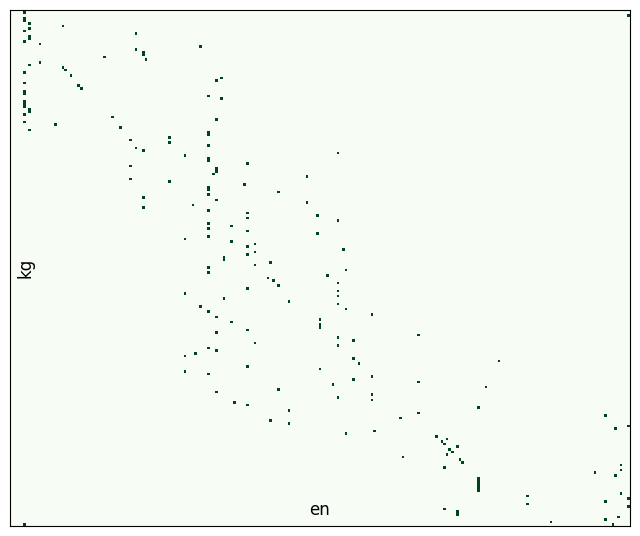

In [67]:
vis_helper.visualize_alignment_by_db(db_path, output_path="alignment_vis.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(800,800), plt_show=True)

Найдем все конфликты и посмотрим статистику

In [68]:
conflicts_to_solve, rest = resolver.get_all_conflicts(db_path, min_chain_length=2, max_conflicts_len=6, batch_id=-1)

# Check if conflicts_to_solve is empty before accessing its elements
if conflicts_to_solve:
    resolver.get_statistics(conflicts_to_solve)
    resolver.get_statistics(rest)
    resolver.show_conflict(db_path, conflicts_to_solve[0])
else:
    print("No conflicts found.")

conflicts to solve: 2
total conflicts: 4
('3:3', 1)
('4:4', 1)
('7:6', 1)
('137:140', 1)
169 Мен Кичинекей ханзада «Астероид B-612» деген бөтөкөй планетадан учуп келди деп болжойм.
170 Анткенимин жүйөөсү бар.
171 Ал астероидди 1909-жылы бир түрк астроном телескоптон бир эле жолу көрүп калган экен.


172 I have serious reason to believe that the planet from which the little prince came is the asteroid known as B- 612.
173 This asteroid has only once been seen through the telescope.
174 That was by a Turkish astronomer, in 1909.
-----------------------------------------------


Изучим конкретный конфликт

In [69]:
resolver.show_conflict(db_path, conflicts_to_solve[1])

172 Астроном өзү ачкан жаңылык тууралуу Эл аралык астрономиялык конгрессте баян этет.
173 Бирок ага эч ким ишенбейт, анткени астроном түркчө кийинип алган болот.
174 Чоң кишилер дегениң ушундай го, чиркин!
175 В-612 астероидинин ыкыбалы тоодой экен, түрк султаны өзү сурап турган элге европача кийим кийгиле, кийбесеңер өлүмгө кириптер болосуңар деп буйрук кылат.


175 On making his discovery, the astronomer had presented it to the International Astronomical Congress, in a great demonstration.
176 But he was in Turkish costume, and so nobody would believe what he said.
177 Grown-ups are like that . .
178 Fortunately, however, for the reputation of Asteroid B-612, a Turkish dictator made a law that his subjects, under pain of death, should change to European costume.
-----------------------------------------------


Разрешим все конфликты, используя описанную в статье стратегию

conflicts to solve: 2
total conflicts: 4


100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


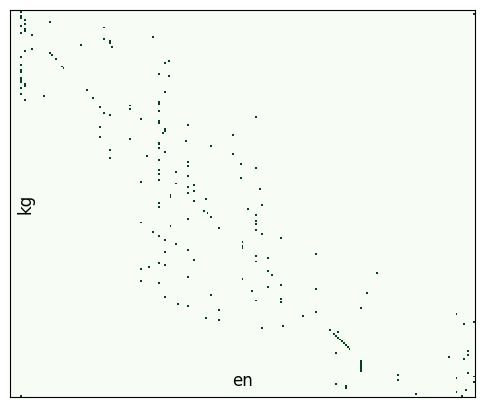

conflicts to solve: 0
total conflicts: 0


0it [00:00, ?it/s]


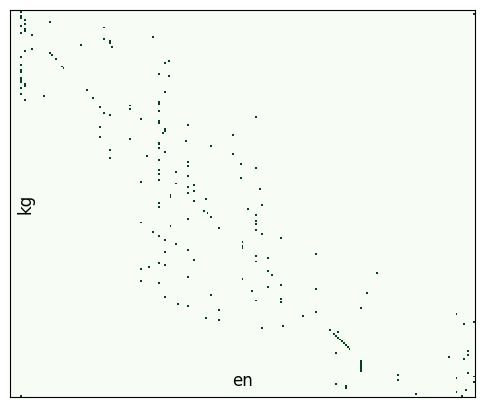

In [70]:
steps = 3
batch_id = -1 #выровнять все доступные батчи

for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path, min_chain_length=2+i, max_conflicts_len=6*(i+1), batch_id=batch_id)
    resolver.resolve_all_conflicts(db_path, conflicts, model_name, show_logs=False)
    vis_helper.visualize_alignment_by_db(db_path, output_path="img_test1.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(600,600), plt_show=True)

    if len(rest) == 0: break

# Создание книги

Достанем из выравнивания все параграфы с заголовками, используя модуль **reader**

In [71]:
output_path = "result/harper_lee.html"
paragraphs_from, paragraphs_to, meta = reader.get_paragraphs(db_path)

In [72]:
print(paragraphs_from[9])
print(paragraphs_to[9])

['Чөң кишилер мага жыланды ичинен тартканыңды да кой, тышынан тартканыңды да кой, андан көрө географияга, тарыхка, арифметикага, таза жазууга көбүрөөк көңүл бур деп кеңеш беришти.', 'Жакшы художник болуудан алты жашымда ушинтип айныбадымбы.']
["The grown-ups' response, this time, was to advise me to lay aside my drawings of boa constrictors, whether from the inside or the outside, and devote myself instead to geography, history, arithmetic, and grammar.", 'It was a picture of a boa constrictor in the act of swallowing an animal.']


Сгенерируем книгу. Шаблон пока что один.

In [73]:
reader.create_book(paragraphs_from, paragraphs_to, meta, output_path, template="simple")

Скачаем нашу книжку

In [74]:
from google.colab import files

files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Спасибо за внимание. Читайте книги!

Поддержать проект финансово можно переводом [здесь](https://www.tinkoff.ru/sl/1mDqKGICUwH).